# Bank Fraud Detection

*About this Dataset:*
- This dataset contains synthetic transaction data designed to help build and evaluate fraud detection models. The data represents realistic financial transactions, capturing important details about users, their transactions, and various risk factors. It's perfect for training machine learning models, especially for binary classification tasks like identifying fraudulent transactions.

- The dataset has a mix of numerical, categorical, and temporal data, making it ideal for testing various models, including decision trees, gradient boosting machines like XGBoost, and other machine learning algorithms.

- Key features of the dataset include transaction amounts, user details, transaction types, and fraud labels, which can be used to develop fraud detection systems, analyze transaction patterns, and detect potential anomalies in financial transactions.

### Columns

- Transaction_ID: Unique identifier for each transaction.
- User_ID: Unique identifier for the user.
- Transaction_Amount: Amount of money involved in the transaction.
- Transaction_Type: Type of transaction (e.g., Online, In-Store, ATM).
- Timestamp: Date and time of the transaction.
- Account_Balance: User's account balance before the transaction.
- Device_Type: Type of device used for the transaction (e.g., Mobile, Desktop).
- Location: Geographical location of the transaction.
- Merchant_Category: Type of merchant (e.g., Retail, Food, Travel).
- IP_Address_Flag: Indicates if the IP address was flagged as suspicious (0 or 1).
- Previous_Fraudulent_Activity: Number of previous fraudulent activities by the user.
- Daily_Transaction_Count: Number of transactions made by the user that day.
- Avg_Transaction_Amount_7d: User's average transaction amount over the past 7 days.
- Failed_Transaction_Count_7d: Number of failed transactions in the last 7 days.
- Card_Type: Type of payment card used (e.g., Credit, Debit, Prepaid).
- Card_Age: Age of the card in months.
- Transaction_Distance: Distance between the user's usual location and transaction location.
- Authentication_Method: Method used by the user to authenticate (e.g., PIN, Biometric).
- Risk_Score: Fraud risk score calculated for the user of the transaction, provided by the fictional financial institution
- Is_Weekend: Indicates whether the transaction occurred on a weekend (0 or 1).
- Fraud_Label: Target variable: 0 = Not Fraud, 1 = Fraud.

### Start with Importing libraries/modules

In the case that the lib has not been installed yet, use *pip* to install.

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To convert large numbers into human-readable format
from numerize.numerize import numerize

# For suppressing warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [114]:
# Setting the default size and dpi level of the plot
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["figure.dpi"] = 250

# Setting the default size of the plot title and axis labels
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["axes.labelsize"] = 12

# Setting the default weight of the plot title and axis labels
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams["axes.labelweight"] = 'bold'

# To show all columns
pd.set_option("display.max_columns", None)

In [115]:
# Locate the dataset here
df = pd.read_csv("dataset/synthetic_fraud_dataset.csv")
df.head()

Transaction_ID    User_ID  Transaction_Amount Transaction_Type  \
0      TXN_33553  USER_1834               39.79              POS   
1       TXN_9427  USER_7875                1.19    Bank Transfer   
2        TXN_199  USER_2734               28.96           Online   
3      TXN_12447  USER_2617              254.32   ATM Withdrawal   
4      TXN_39489  USER_2014               31.28              POS   

             Timestamp  Account_Balance Device_Type  Location  \
0  2023-08-14 19:30:00         93213.17      Laptop    Sydney   
1  2023-06-07 04:01:00         75725.25      Mobile  New York   
2  2023-06-20 15:25:00          1588.96      Tablet    Mumbai   
3  2023-12-07 00:31:00         76807.20      Tablet  New York   
4  2023-11-11 23:44:00         92354.66      Mobile    Mumbai   

  Merchant_Category  IP_Address_Flag  Previous_Fraudulent_Activity  \
0            Travel                0                             0   
1          Clothing                0                             0   
2       Restaurants                0                             0   
3          Clothing                0                             0   
4       Electronics                0                             1   

   Daily_Transaction_Count  Avg_Transaction_Amount_7d  \
0                        7                     437.63   
1                       13                     478.76   
2                       14                      50.01   
3                        8                     182.48   
4                       14                     328.69   

   Failed_Transaction_Count_7d   Card_Type  Card_Age  Transaction_Distance  \
0                            3        Amex        65                883.17   
1                            4  Mastercard       186               2203.36   
2                            4        Visa       226               1909.29   
3                            4        Visa        76               1311.86   
4                            4  Mastercard       140                966.98   

  Authentication_Method  Risk_Score  Is_Weekend  Fraud_Label  
0             Biometric      0.8494           0            0  
1              Password      0.0959           0            1  
2             Biometric      0.8400           0            1  
3                   OTP      0.7935           0            1  
4              Password      0.3819           1            1

## Data Preprocessing

#### Renaming Columns
Question, why do we need to rename columns? This makes it so that the attributes (columns) are simpler to understand. This is important when analyzing data and making predictions later on.

In [116]:
df.columns = [
    'transaction_id', 'user_id', 'transaction_amount', 'transaction_method', 'transaction_timestamp', 'account_balance', 
    'device_type', 'transaction_location', 'merchant_category', 'ip_address_flag', 'previous_fraudulent_activities', 
    'daily_transaction_count', 'avg_transaction_amount_7d', 'failed_transaction_count_7d', 'card_type', 'card_age_months', 
    'transaction_distance', 'authentication_method', 'fraud_risk_score', 'is_weekend', 'fraud_label'
]

# After renaming, we now describe the statistics of each numerical column
df.describe().T

count          mean           std       min  \
transaction_amount              50000.0     99.411012     98.687292    0.0000   
account_balance                 50000.0  50294.065981  28760.458557  500.4800   
ip_address_flag                 50000.0      0.050200      0.218360    0.0000   
previous_fraudulent_activities  50000.0      0.098400      0.297858    0.0000   
daily_transaction_count         50000.0      7.485240      4.039637    1.0000   
avg_transaction_amount_7d       50000.0    255.271924    141.382279   10.0000   
failed_transaction_count_7d     50000.0      2.003540      1.414273    0.0000   
card_age_months                 50000.0    119.999940     68.985817    1.0000   
transaction_distance            50000.0   2499.164155   1442.013834    0.2500   
fraud_risk_score                50000.0      0.501556      0.287774    0.0001   
is_weekend                      50000.0      0.299640      0.458105    0.0000   
fraud_label                     50000.0      0.321340      0.466996    0.0000   

                                       25%          50%           75%  \
transaction_amount                 28.6775     69.66000    138.852500   
account_balance                 25355.9950  50384.43000  75115.135000   
ip_address_flag                     0.0000      0.00000      0.000000   
previous_fraudulent_activities      0.0000      0.00000      0.000000   
daily_transaction_count             4.0000      7.00000     11.000000   
avg_transaction_amount_7d         132.0875    256.08500    378.032500   
failed_transaction_count_7d         1.0000      2.00000      3.000000   
card_age_months                    60.0000    120.00000    180.000000   
transaction_distance             1256.4975   2490.78500   3746.395000   
fraud_risk_score                    0.2540      0.50225      0.749525   
is_weekend                          0.0000      0.00000      1.000000   
fraud_label                         0.0000      0.00000      1.000000   

                                     max  
transaction_amount               1174.14  
account_balance                 99998.31  
ip_address_flag                     1.00  
previous_fraudulent_activities      1.00  
daily_transaction_count            14.00  
avg_transaction_amount_7d         500.00  
failed_transaction_count_7d         4.00  
card_age_months                   239.00  
transaction_distance             4999.93  
fraud_risk_score                    1.00  
is_weekend                          1.00  
fraud_label                         1.00

In [117]:
# Then, for the statistics of each categorical columns
# Also our renamed columns are here
df.describe(include='object').T

count unique                  top   freq
transaction_id         50000  50000             TXN_5311      1
user_id                50000   8963            USER_6599     16
transaction_method     50000      4                  POS  12549
transaction_timestamp  50000  47724  2023-06-04 06:35:00      4
device_type            50000      3               Tablet  16779
transaction_location   50000      5                Tokyo  10208
merchant_category      50000      5             Clothing  10033
card_type              50000      4           Mastercard  12693
authentication_method  50000      4            Biometric  12591

In [118]:
# Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   transaction_id                  50000 non-null  object 
 1   user_id                         50000 non-null  object 
 2   transaction_amount              50000 non-null  float64
 3   transaction_method              50000 non-null  object 
 4   transaction_timestamp           50000 non-null  object 
 5   account_balance                 50000 non-null  float64
 6   device_type                     50000 non-null  object 
 7   transaction_location            50000 non-null  object 
 8   merchant_category               50000 non-null  object 
 9   ip_address_flag                 50000 non-null  int64  
 10  previous_fraudulent_activities  50000 non-null  int64  
 11  daily_transaction_count         50000 non-null  int64  
 12  avg_transaction_amount_7d       

In [119]:
# Check the number of null values in each column
df.isnull().sum()

transaction_id                    0
user_id                           0
transaction_amount                0
transaction_method                0
transaction_timestamp             0
account_balance                   0
device_type                       0
transaction_location              0
merchant_category                 0
ip_address_flag                   0
previous_fraudulent_activities    0
daily_transaction_count           0
avg_transaction_amount_7d         0
failed_transaction_count_7d       0
card_type                         0
card_age_months                   0
transaction_distance              0
authentication_method             0
fraud_risk_score                  0
is_weekend                        0
fraud_label                       0
dtype: int64

In [120]:
# Check the number of duplicate rows
df.duplicated().sum()

np.int64(0)

As we can see, there are no null values and duplicated columns, which indicates a good sign that the dataset is somehow ideal. 

Given that, we now want a function for annotating bars.

Parameters:
- ax: The axis object of the plot.
- decimal: Whether to show decimals in the annotation.
- type: The type of the plot.

#### Datetime Transformations

In [121]:
df['transaction_timestamp'] = pd.to_datetime(df['transaction_timestamp'])
df.head()

transaction_id    user_id  transaction_amount transaction_method  \
0      TXN_33553  USER_1834               39.79                POS   
1       TXN_9427  USER_7875                1.19      Bank Transfer   
2        TXN_199  USER_2734               28.96             Online   
3      TXN_12447  USER_2617              254.32     ATM Withdrawal   
4      TXN_39489  USER_2014               31.28                POS   

  transaction_timestamp  account_balance device_type transaction_location  \
0   2023-08-14 19:30:00         93213.17      Laptop               Sydney   
1   2023-06-07 04:01:00         75725.25      Mobile             New York   
2   2023-06-20 15:25:00          1588.96      Tablet               Mumbai   
3   2023-12-07 00:31:00         76807.20      Tablet             New York   
4   2023-11-11 23:44:00         92354.66      Mobile               Mumbai   

  merchant_category  ip_address_flag  previous_fraudulent_activities  \
0            Travel                0                               0   
1          Clothing                0                               0   
2       Restaurants                0                               0   
3          Clothing                0                               0   
4       Electronics                0                               1   

   daily_transaction_count  avg_transaction_amount_7d  \
0                        7                     437.63   
1                       13                     478.76   
2                       14                      50.01   
3                        8                     182.48   
4                       14                     328.69   

   failed_transaction_count_7d   card_type  card_age_months  \
0                            3        Amex               65   
1                            4  Mastercard              186   
2                            4        Visa              226   
3                            4        Visa               76   
4                            4  Mastercard              140   

   transaction_distance authentication_method  fraud_risk_score  is_weekend  \
0                883.17             Biometric            0.8494           0   
1               2203.36              Password            0.0959           0   
2               1909.29             Biometric            0.8400           0   
3               1311.86                   OTP            0.7935           0   
4                966.98              Password            0.3819           1   

   fraud_label  
0            0  
1            1  
2            1  
3            1  
4            1

In [122]:
# Adding a new column to show the day of the week when each transaction was made
df['day_of_week'] = df['transaction_timestamp'].dt.day_name()
df.head()

transaction_id    user_id  transaction_amount transaction_method  \
0      TXN_33553  USER_1834               39.79                POS   
1       TXN_9427  USER_7875                1.19      Bank Transfer   
2        TXN_199  USER_2734               28.96             Online   
3      TXN_12447  USER_2617              254.32     ATM Withdrawal   
4      TXN_39489  USER_2014               31.28                POS   

  transaction_timestamp  account_balance device_type transaction_location  \
0   2023-08-14 19:30:00         93213.17      Laptop               Sydney   
1   2023-06-07 04:01:00         75725.25      Mobile             New York   
2   2023-06-20 15:25:00          1588.96      Tablet               Mumbai   
3   2023-12-07 00:31:00         76807.20      Tablet             New York   
4   2023-11-11 23:44:00         92354.66      Mobile               Mumbai   

  merchant_category  ip_address_flag  previous_fraudulent_activities  \
0            Travel                0                               0   
1          Clothing                0                               0   
2       Restaurants                0                               0   
3          Clothing                0                               0   
4       Electronics                0                               1   

   daily_transaction_count  avg_transaction_amount_7d  \
0                        7                     437.63   
1                       13                     478.76   
2                       14                      50.01   
3                        8                     182.48   
4                       14                     328.69   

   failed_transaction_count_7d   card_type  card_age_months  \
0                            3        Amex               65   
1                            4  Mastercard              186   
2                            4        Visa              226   
3                            4        Visa               76   
4                            4  Mastercard              140   

   transaction_distance authentication_method  fraud_risk_score  is_weekend  \
0                883.17             Biometric            0.8494           0   
1               2203.36              Password            0.0959           0   
2               1909.29             Biometric            0.8400           0   
3               1311.86                   OTP            0.7935           0   
4                966.98              Password            0.3819           1   

   fraud_label day_of_week  
0            0      Monday  
1            1   Wednesday  
2            1     Tuesday  
3            1    Thursday  
4            1    Saturday

In [123]:
# Adding a new column to show the minute, hour, month, and date of each transaction
df['transaction_min'] = df['transaction_timestamp'].dt.minute
df['transaction_hour'] = df['transaction_timestamp'].dt.hour
df['transaction_month'] = df['transaction_timestamp'].dt.month
df['transaction_date'] = df['transaction_timestamp'].dt.day
df.head()

transaction_id    user_id  transaction_amount transaction_method  \
0      TXN_33553  USER_1834               39.79                POS   
1       TXN_9427  USER_7875                1.19      Bank Transfer   
2        TXN_199  USER_2734               28.96             Online   
3      TXN_12447  USER_2617              254.32     ATM Withdrawal   
4      TXN_39489  USER_2014               31.28                POS   

  transaction_timestamp  account_balance device_type transaction_location  \
0   2023-08-14 19:30:00         93213.17      Laptop               Sydney   
1   2023-06-07 04:01:00         75725.25      Mobile             New York   
2   2023-06-20 15:25:00          1588.96      Tablet               Mumbai   
3   2023-12-07 00:31:00         76807.20      Tablet             New York   
4   2023-11-11 23:44:00         92354.66      Mobile               Mumbai   

  merchant_category  ip_address_flag  previous_fraudulent_activities  \
0            Travel                0                               0   
1          Clothing                0                               0   
2       Restaurants                0                               0   
3          Clothing                0                               0   
4       Electronics                0                               1   

   daily_transaction_count  avg_transaction_amount_7d  \
0                        7                     437.63   
1                       13                     478.76   
2                       14                      50.01   
3                        8                     182.48   
4                       14                     328.69   

   failed_transaction_count_7d   card_type  card_age_months  \
0                            3        Amex               65   
1                            4  Mastercard              186   
2                            4        Visa              226   
3                            4        Visa               76   
4                            4  Mastercard              140   

   transaction_distance authentication_method  fraud_risk_score  is_weekend  \
0                883.17             Biometric            0.8494           0   
1               2203.36              Password            0.0959           0   
2               1909.29             Biometric            0.8400           0   
3               1311.86                   OTP            0.7935           0   
4                966.98              Password            0.3819           1   

   fraud_label day_of_week  transaction_min  transaction_hour  \
0            0      Monday               30                19   
1            1   Wednesday                1                 4   
2            1     Tuesday               25                15   
3            1    Thursday               31                 0   
4            1    Saturday               44                23   

   transaction_month  transaction_date  
0                  8                14  
1                  6                 7  
2                  6                20  
3                 12                 7  
4                 11                11

In [124]:
# dropping transaction_timestamp since necessary datetime attributes have already been derived
df = df.drop("transaction_timestamp", axis = 1)
df.head()

transaction_id    user_id  transaction_amount transaction_method  \
0      TXN_33553  USER_1834               39.79                POS   
1       TXN_9427  USER_7875                1.19      Bank Transfer   
2        TXN_199  USER_2734               28.96             Online   
3      TXN_12447  USER_2617              254.32     ATM Withdrawal   
4      TXN_39489  USER_2014               31.28                POS   

   account_balance device_type transaction_location merchant_category  \
0         93213.17      Laptop               Sydney            Travel   
1         75725.25      Mobile             New York          Clothing   
2          1588.96      Tablet               Mumbai       Restaurants   
3         76807.20      Tablet             New York          Clothing   
4         92354.66      Mobile               Mumbai       Electronics   

   ip_address_flag  previous_fraudulent_activities  daily_transaction_count  \
0                0                               0                        7   
1                0                               0                       13   
2                0                               0                       14   
3                0                               0                        8   
4                0                               1                       14   

   avg_transaction_amount_7d  failed_transaction_count_7d   card_type  \
0                     437.63                            3        Amex   
1                     478.76                            4  Mastercard   
2                      50.01                            4        Visa   
3                     182.48                            4        Visa   
4                     328.69                            4  Mastercard   

   card_age_months  transaction_distance authentication_method  \
0               65                883.17             Biometric   
1              186               2203.36              Password   
2              226               1909.29             Biometric   
3               76               1311.86                   OTP   
4              140                966.98              Password   

   fraud_risk_score  is_weekend  fraud_label day_of_week  transaction_min  \
0            0.8494           0            0      Monday               30   
1            0.0959           0            1   Wednesday                1   
2            0.8400           0            1     Tuesday               25   
3            0.7935           0            1    Thursday               31   
4            0.3819           1            1    Saturday               44   

   transaction_hour  transaction_month  transaction_date  
0                19                  8                14  
1                 4                  6                 7  
2                15                  6                20  
3                 0                 12                 7  
4                23                 11                11

#### Transaction Amount to Balance Ratio Transformations

In [125]:
# Now, our next goal is to see the distribution of High vs Low-Value transactions by fraud flag. To do that, we must start by calculating a ratio between transaction amound and account balance.
df["transaction_amount_to_balance_ratio"] = df["transaction_amount"] / df["account_balance"]
df.head()

transaction_id    user_id  transaction_amount transaction_method  \
0      TXN_33553  USER_1834               39.79                POS   
1       TXN_9427  USER_7875                1.19      Bank Transfer   
2        TXN_199  USER_2734               28.96             Online   
3      TXN_12447  USER_2617              254.32     ATM Withdrawal   
4      TXN_39489  USER_2014               31.28                POS   

   account_balance device_type transaction_location merchant_category  \
0         93213.17      Laptop               Sydney            Travel   
1         75725.25      Mobile             New York          Clothing   
2          1588.96      Tablet               Mumbai       Restaurants   
3         76807.20      Tablet             New York          Clothing   
4         92354.66      Mobile               Mumbai       Electronics   

   ip_address_flag  previous_fraudulent_activities  daily_transaction_count  \
0                0                               0                        7   
1                0                               0                       13   
2                0                               0                       14   
3                0                               0                        8   
4                0                               1                       14   

   avg_transaction_amount_7d  failed_transaction_count_7d   card_type  \
0                     437.63                            3        Amex   
1                     478.76                            4  Mastercard   
2                      50.01                            4        Visa   
3                     182.48                            4        Visa   
4                     328.69                            4  Mastercard   

   card_age_months  transaction_distance authentication_method  \
0               65                883.17             Biometric   
1              186               2203.36              Password   
2              226               1909.29             Biometric   
3               76               1311.86                   OTP   
4              140                966.98              Password   

   fraud_risk_score  is_weekend  fraud_label day_of_week  transaction_min  \
0            0.8494           0            0      Monday               30   
1            0.0959           0            1   Wednesday                1   
2            0.8400           0            1     Tuesday               25   
3            0.7935           0            1    Thursday               31   
4            0.3819           1            1    Saturday               44   

   transaction_hour  transaction_month  transaction_date  \
0                19                  8                14   
1                 4                  6                 7   
2                15                  6                20   
3                 0                 12                 7   
4                23                 11                11   

   transaction_amount_to_balance_ratio  
0                             0.000427  
1                             0.000016  
2                             0.018226  
3                             0.003311  
4                             0.000339

In [126]:
# Create a new column to classify transactions as high-value or not based on 75th Quantile value
threshold = df['transaction_amount'].quantile(q=0.75)
df['is_high_value_transaction'] = df['transaction_amount'] > threshold
df.head()

transaction_id    user_id  transaction_amount transaction_method  \
0      TXN_33553  USER_1834               39.79                POS   
1       TXN_9427  USER_7875                1.19      Bank Transfer   
2        TXN_199  USER_2734               28.96             Online   
3      TXN_12447  USER_2617              254.32     ATM Withdrawal   
4      TXN_39489  USER_2014               31.28                POS   

   account_balance device_type transaction_location merchant_category  \
0         93213.17      Laptop               Sydney            Travel   
1         75725.25      Mobile             New York          Clothing   
2          1588.96      Tablet               Mumbai       Restaurants   
3         76807.20      Tablet             New York          Clothing   
4         92354.66      Mobile               Mumbai       Electronics   

   ip_address_flag  previous_fraudulent_activities  daily_transaction_count  \
0                0                               0                        7   
1                0                               0                       13   
2                0                               0                       14   
3                0                               0                        8   
4                0                               1                       14   

   avg_transaction_amount_7d  failed_transaction_count_7d   card_type  \
0                     437.63                            3        Amex   
1                     478.76                            4  Mastercard   
2                      50.01                            4        Visa   
3                     182.48                            4        Visa   
4                     328.69                            4  Mastercard   

   card_age_months  transaction_distance authentication_method  \
0               65                883.17             Biometric   
1              186               2203.36              Password   
2              226               1909.29             Biometric   
3               76               1311.86                   OTP   
4              140                966.98              Password   

   fraud_risk_score  is_weekend  fraud_label day_of_week  transaction_min  \
0            0.8494           0            0      Monday               30   
1            0.0959           0            1   Wednesday                1   
2            0.8400           0            1     Tuesday               25   
3            0.7935           0            1    Thursday               31   
4            0.3819           1            1    Saturday               44   

   transaction_hour  transaction_month  transaction_date  \
0                19                  8                14   
1                 4                  6                 7   
2                15                  6                20   
3                 0                 12                 7   
4                23                 11                11   

   transaction_amount_to_balance_ratio  is_high_value_transaction  
0                             0.000427                      False  
1                             0.000016                      False  
2                             0.018226                      False  
3                             0.003311                       True  
4                             0.000339                      False

#### Card Age transformations

In [127]:
# Creating age categories for card age column
df['card_age_years'] = pd.cut(df['card_age_months'], bins=[0, 12, 60, 120, 250], labels=['0-1', '1-5', '5-10', '10+'])
df.head()

transaction_id    user_id  transaction_amount transaction_method  \
0      TXN_33553  USER_1834               39.79                POS   
1       TXN_9427  USER_7875                1.19      Bank Transfer   
2        TXN_199  USER_2734               28.96             Online   
3      TXN_12447  USER_2617              254.32     ATM Withdrawal   
4      TXN_39489  USER_2014               31.28                POS   

   account_balance device_type transaction_location merchant_category  \
0         93213.17      Laptop               Sydney            Travel   
1         75725.25      Mobile             New York          Clothing   
2          1588.96      Tablet               Mumbai       Restaurants   
3         76807.20      Tablet             New York          Clothing   
4         92354.66      Mobile               Mumbai       Electronics   

   ip_address_flag  previous_fraudulent_activities  daily_transaction_count  \
0                0                               0                        7   
1                0                               0                       13   
2                0                               0                       14   
3                0                               0                        8   
4                0                               1                       14   

   avg_transaction_amount_7d  failed_transaction_count_7d   card_type  \
0                     437.63                            3        Amex   
1                     478.76                            4  Mastercard   
2                      50.01                            4        Visa   
3                     182.48                            4        Visa   
4                     328.69                            4  Mastercard   

   card_age_months  transaction_distance authentication_method  \
0               65                883.17             Biometric   
1              186               2203.36              Password   
2              226               1909.29             Biometric   
3               76               1311.86                   OTP   
4              140                966.98              Password   

   fraud_risk_score  is_weekend  fraud_label day_of_week  transaction_min  \
0            0.8494           0            0      Monday               30   
1            0.0959           0            1   Wednesday                1   
2            0.8400           0            1     Tuesday               25   
3            0.7935           0            1    Thursday               31   
4            0.3819           1            1    Saturday               44   

   transaction_hour  transaction_month  transaction_date  \
0                19                  8                14   
1                 4                  6                 7   
2                15                  6                20   
3                 0                 12                 7   
4                23                 11                11   

   transaction_amount_to_balance_ratio  is_high_value_transaction  \
0                             0.000427                      False   
1                             0.000016                      False   
2                             0.018226                      False   
3                             0.003311                       True   
4                             0.000339                      False   

  card_age_years  
0           5-10  
1            10+  
2            10+  
3           5-10  
4            10+

#### Saving processed dataset

In [128]:
# final check before saving data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   transaction_id                       50000 non-null  object  
 1   user_id                              50000 non-null  object  
 2   transaction_amount                   50000 non-null  float64 
 3   transaction_method                   50000 non-null  object  
 4   account_balance                      50000 non-null  float64 
 5   device_type                          50000 non-null  object  
 6   transaction_location                 50000 non-null  object  
 7   merchant_category                    50000 non-null  object  
 8   ip_address_flag                      50000 non-null  int64   
 9   previous_fraudulent_activities       50000 non-null  int64   
 10  daily_transaction_count              50000 non-null  int64   
 11  avg_transaction

In [129]:
# saving processes dataset
df.to_csv('dataset/synthetic_fraud_dataset_processed.csv', index=False)

## Exploratory Data Analysis

In [130]:
def annotate_bars(ax, decimal=True, type = None):

    # Loop through each bar
    for bar in ax.patches:
        height = bar.get_height()

        # Check if the height is greater than or equal to 1000 for numerization
        if height >= 1000:
            
            value = numerize(height)
            
            if not decimal:
                value = f"{round(float(value[:-1]))}{value[-1]}"
            else:
                value = f"{round(float(value[:-1]), 1)}{value[-1]}"

        elif 0 < height < 1000:
            
            # For smaller values
            if not decimal:
                value = round(height)
            else:
                value = round(height, 1)


            if type == "percent":
                value = f"{value}%"

        if height > 0:
            ax.annotate(
                value,
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontweight='bold'
            )

After creating a function to annotate bars, let us now move on to:

What we want to do here is to check the number of fraudulent transactions compared to genuine ones. We would also be annotating this using the *annotate_bars* function we created earlier.

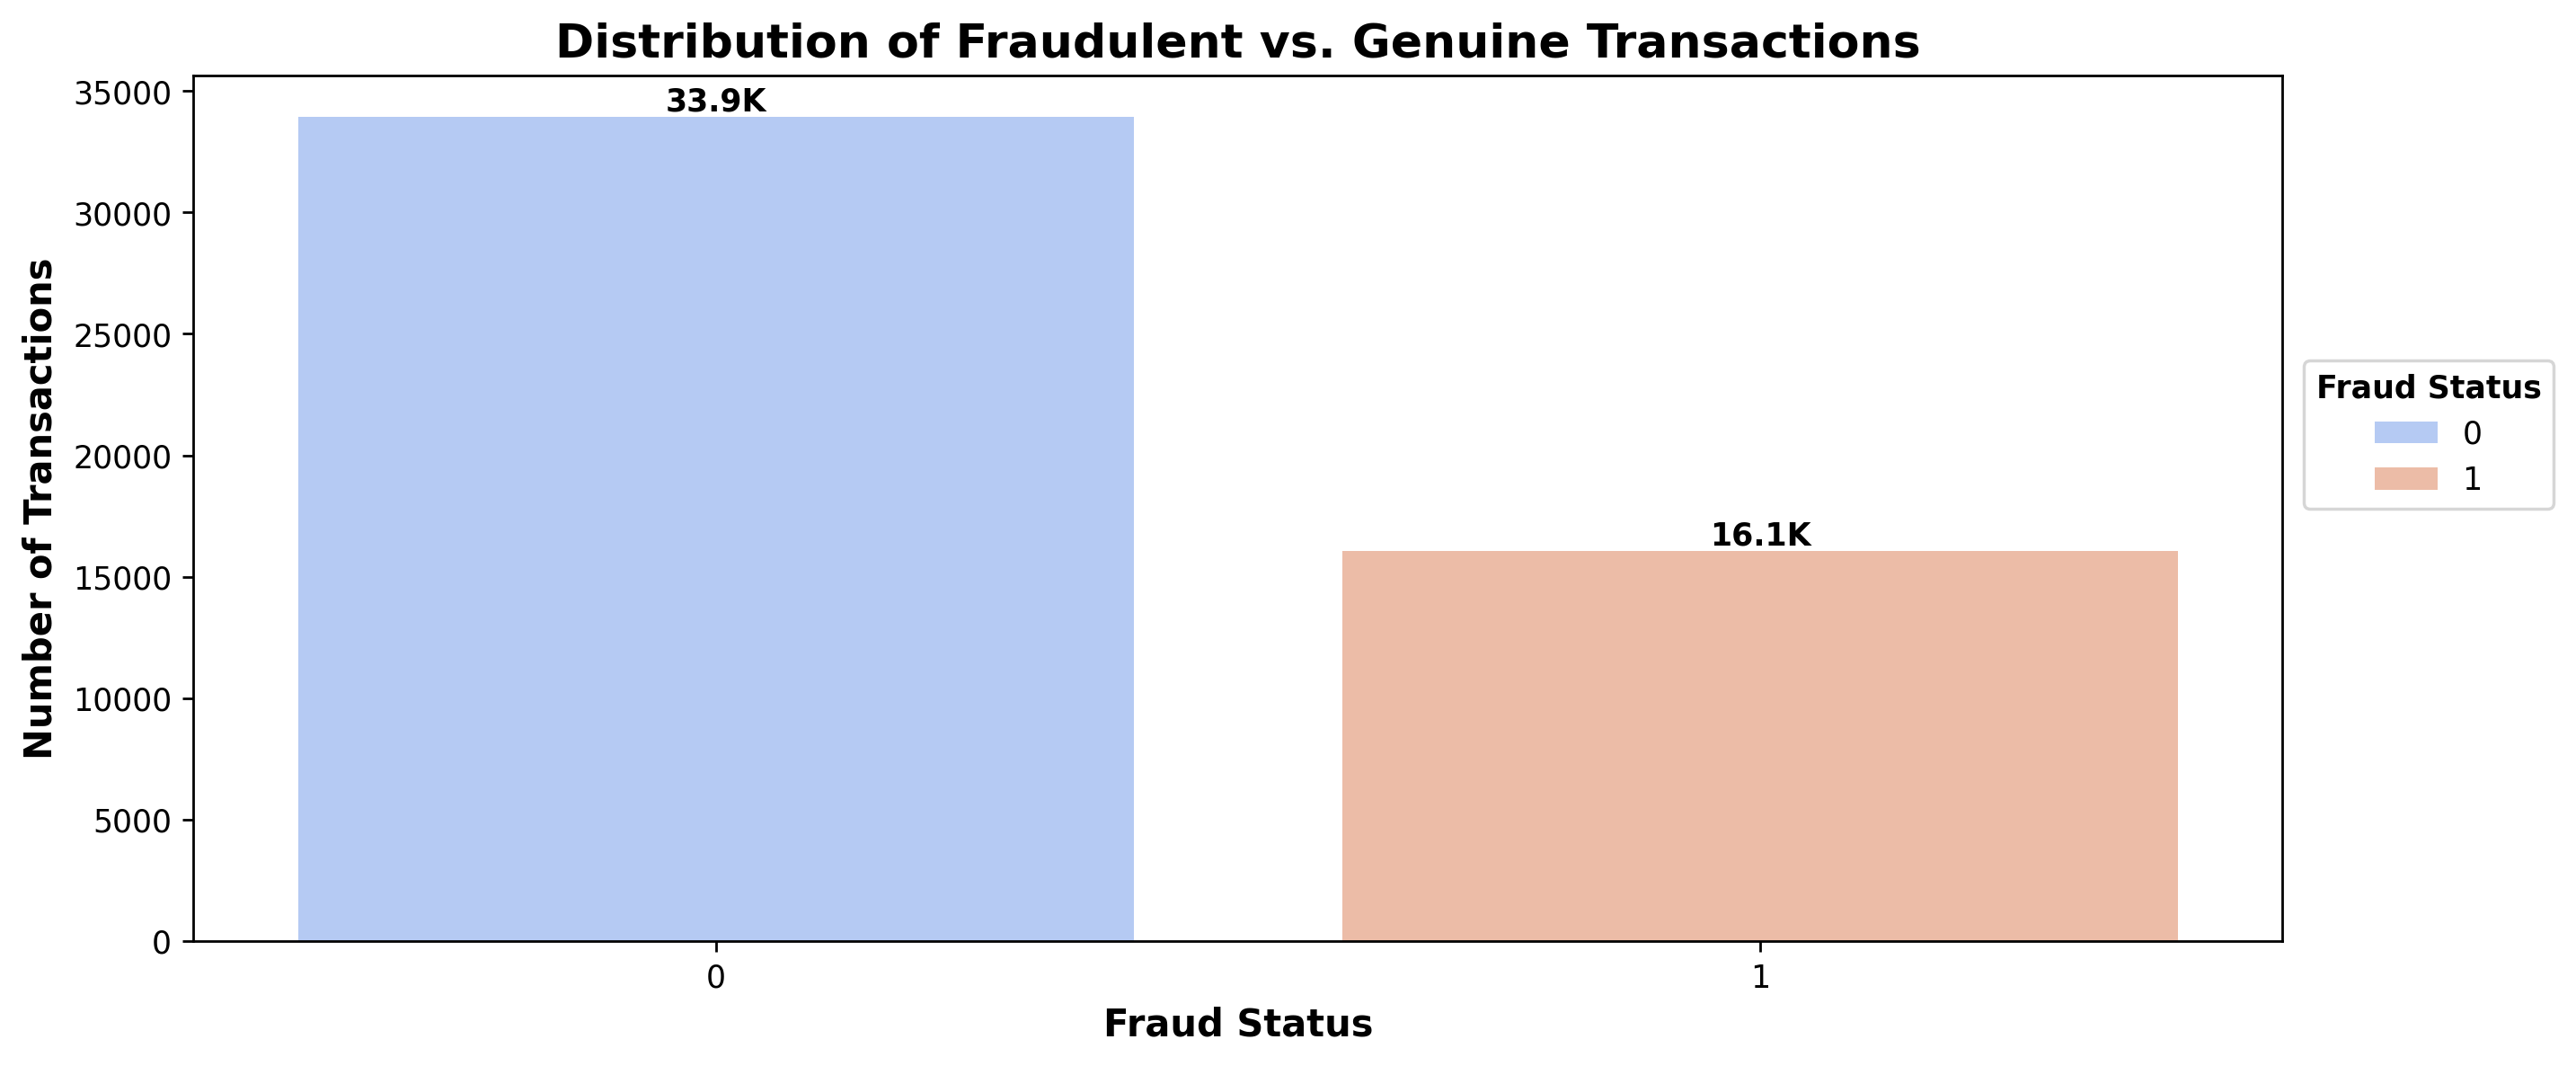

In [131]:
ax = sns.countplot(
    data = df,
    x = "fraud_label",
    hue = "fraud_label",
    palette = 'coolwarm',
    dodge = False
)

annotate_bars(ax)

# Adding title and labels to the plot
plt.title("Distribution of Fraudulent vs. Genuine Transactions")
plt.xlabel("Fraud Status")
plt.ylabel("Number of Transactions")

plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5))

([<matplotlib.axis.XTick at 0x188eebf2710>,
 [Text(0, 0, '0'),
  Text(100, 0, '100'),
  Text(200, 0, '200'),
  Text(300, 0, '300'),
  Text(400, 0, '400'),
  Text(500, 0, '500'),
  Text(600, 0, '600'),
  Text(700, 0, '700'),
  Text(800, 0, '800'),
  Text(900, 0, '900'),
  Text(1000, 0, '1000'),
  Text(1100, 0, '1100')])

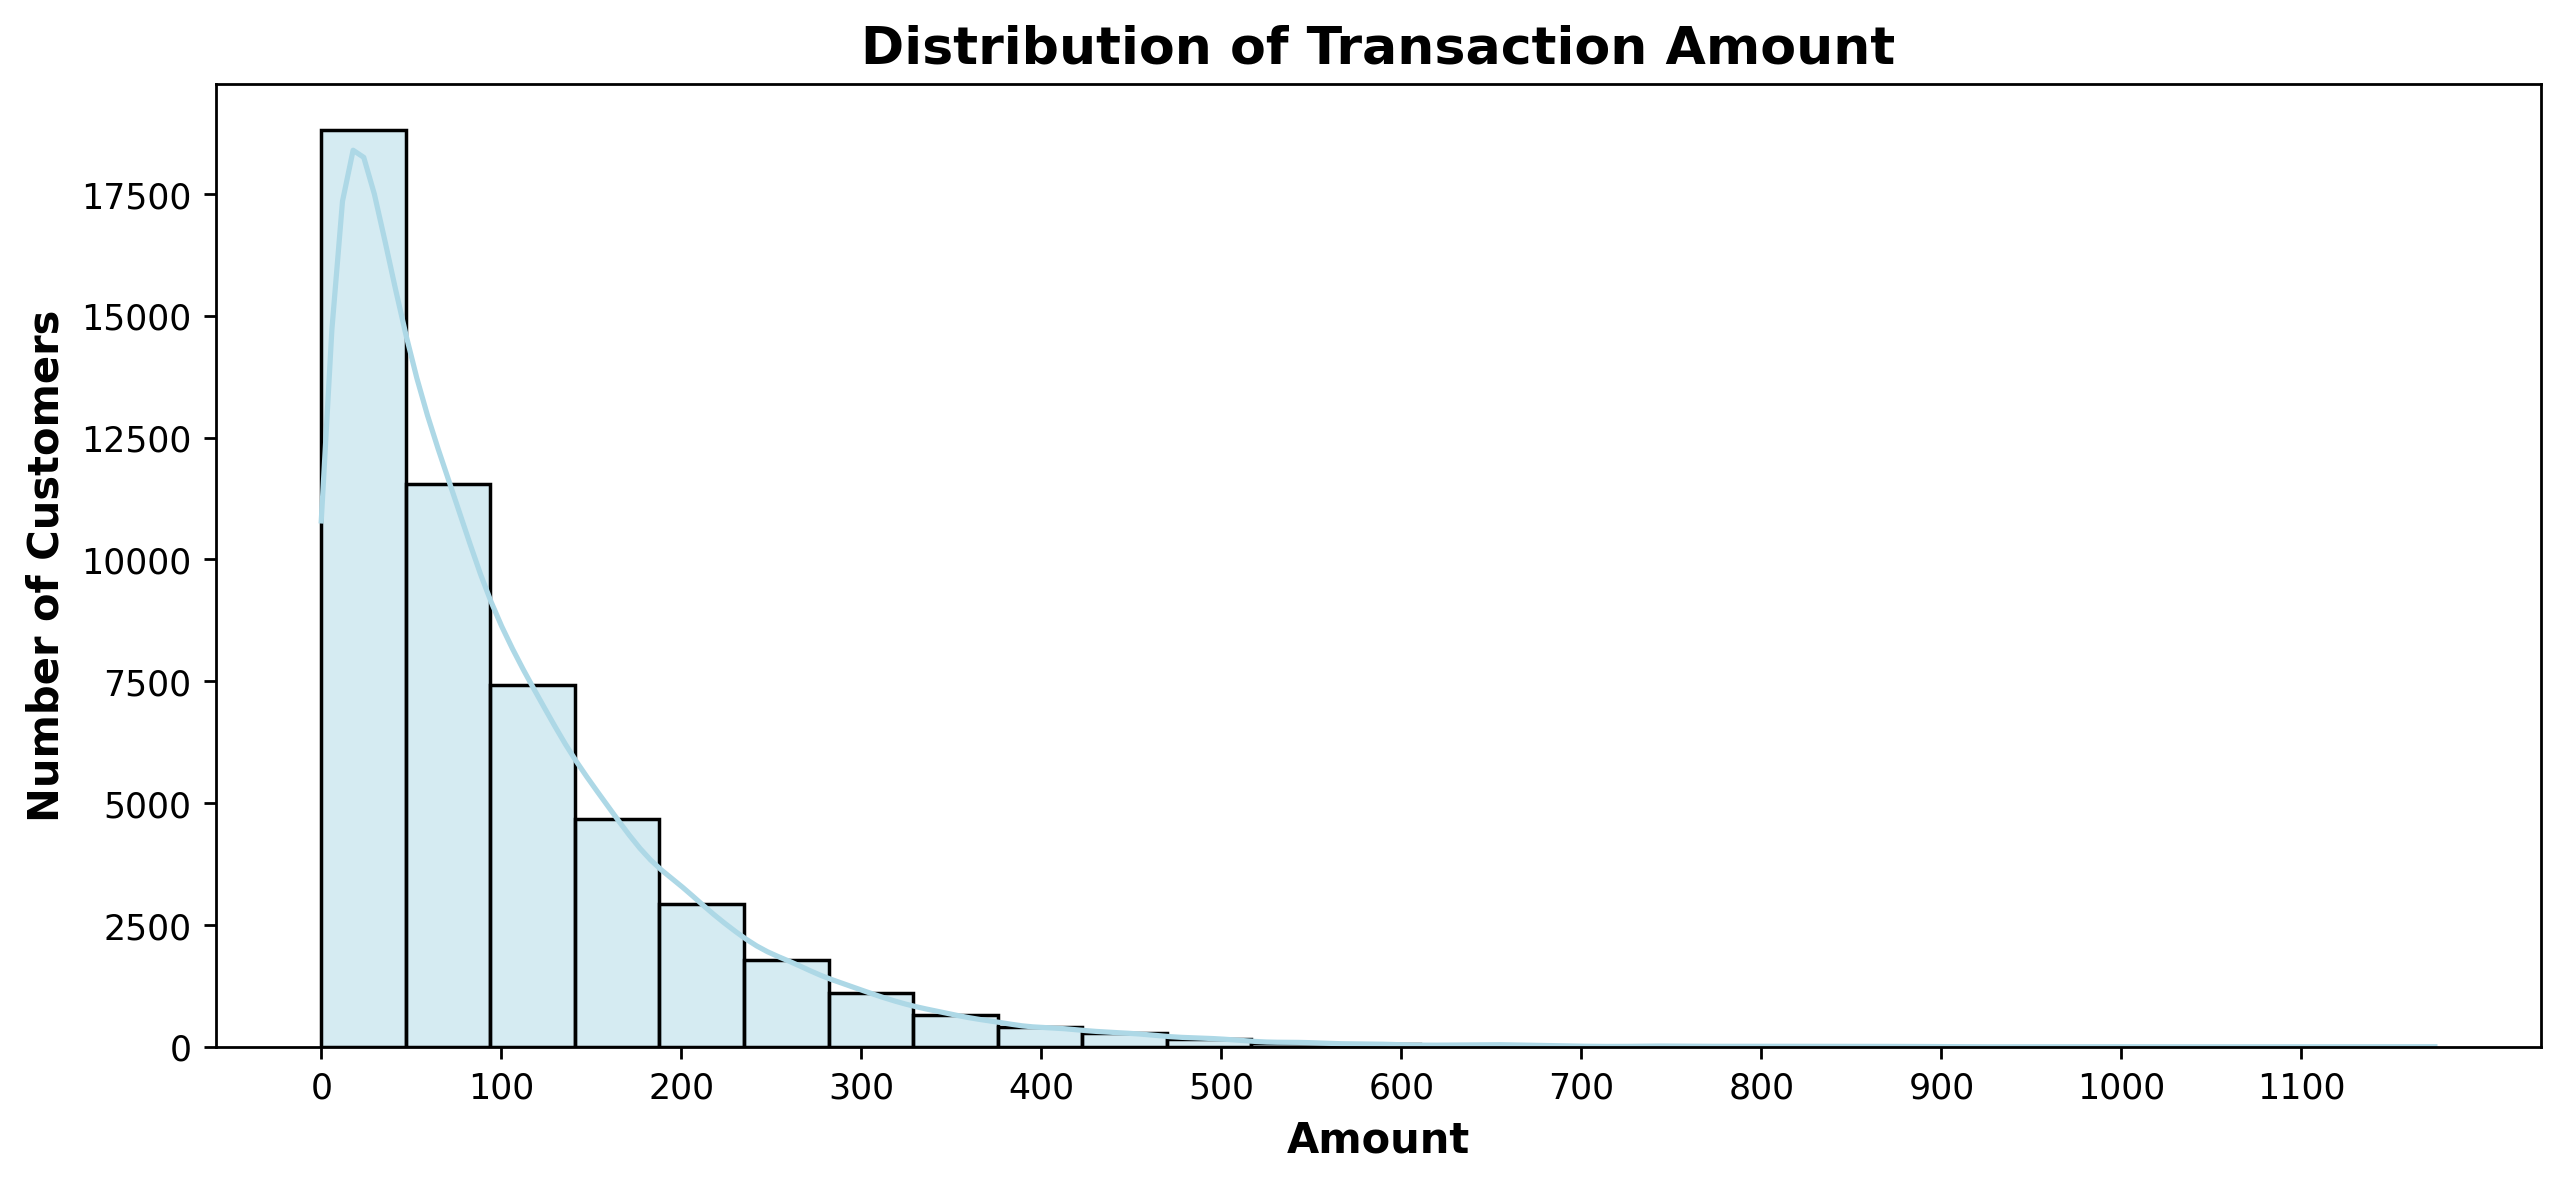

In [132]:
# Now, we want to check the distribution of transaction amount
sns.histplot(
    data = df,
    x = "transaction_amount",
    bins = 25,
    kde = True,
    color = "lightblue"
)

plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount")
plt.ylabel("Number of Customers")

min_value = int(df['transaction_amount'].min())
max_value = int(df['transaction_amount'].max())
plt.xticks(range(min_value, max_value, 100))

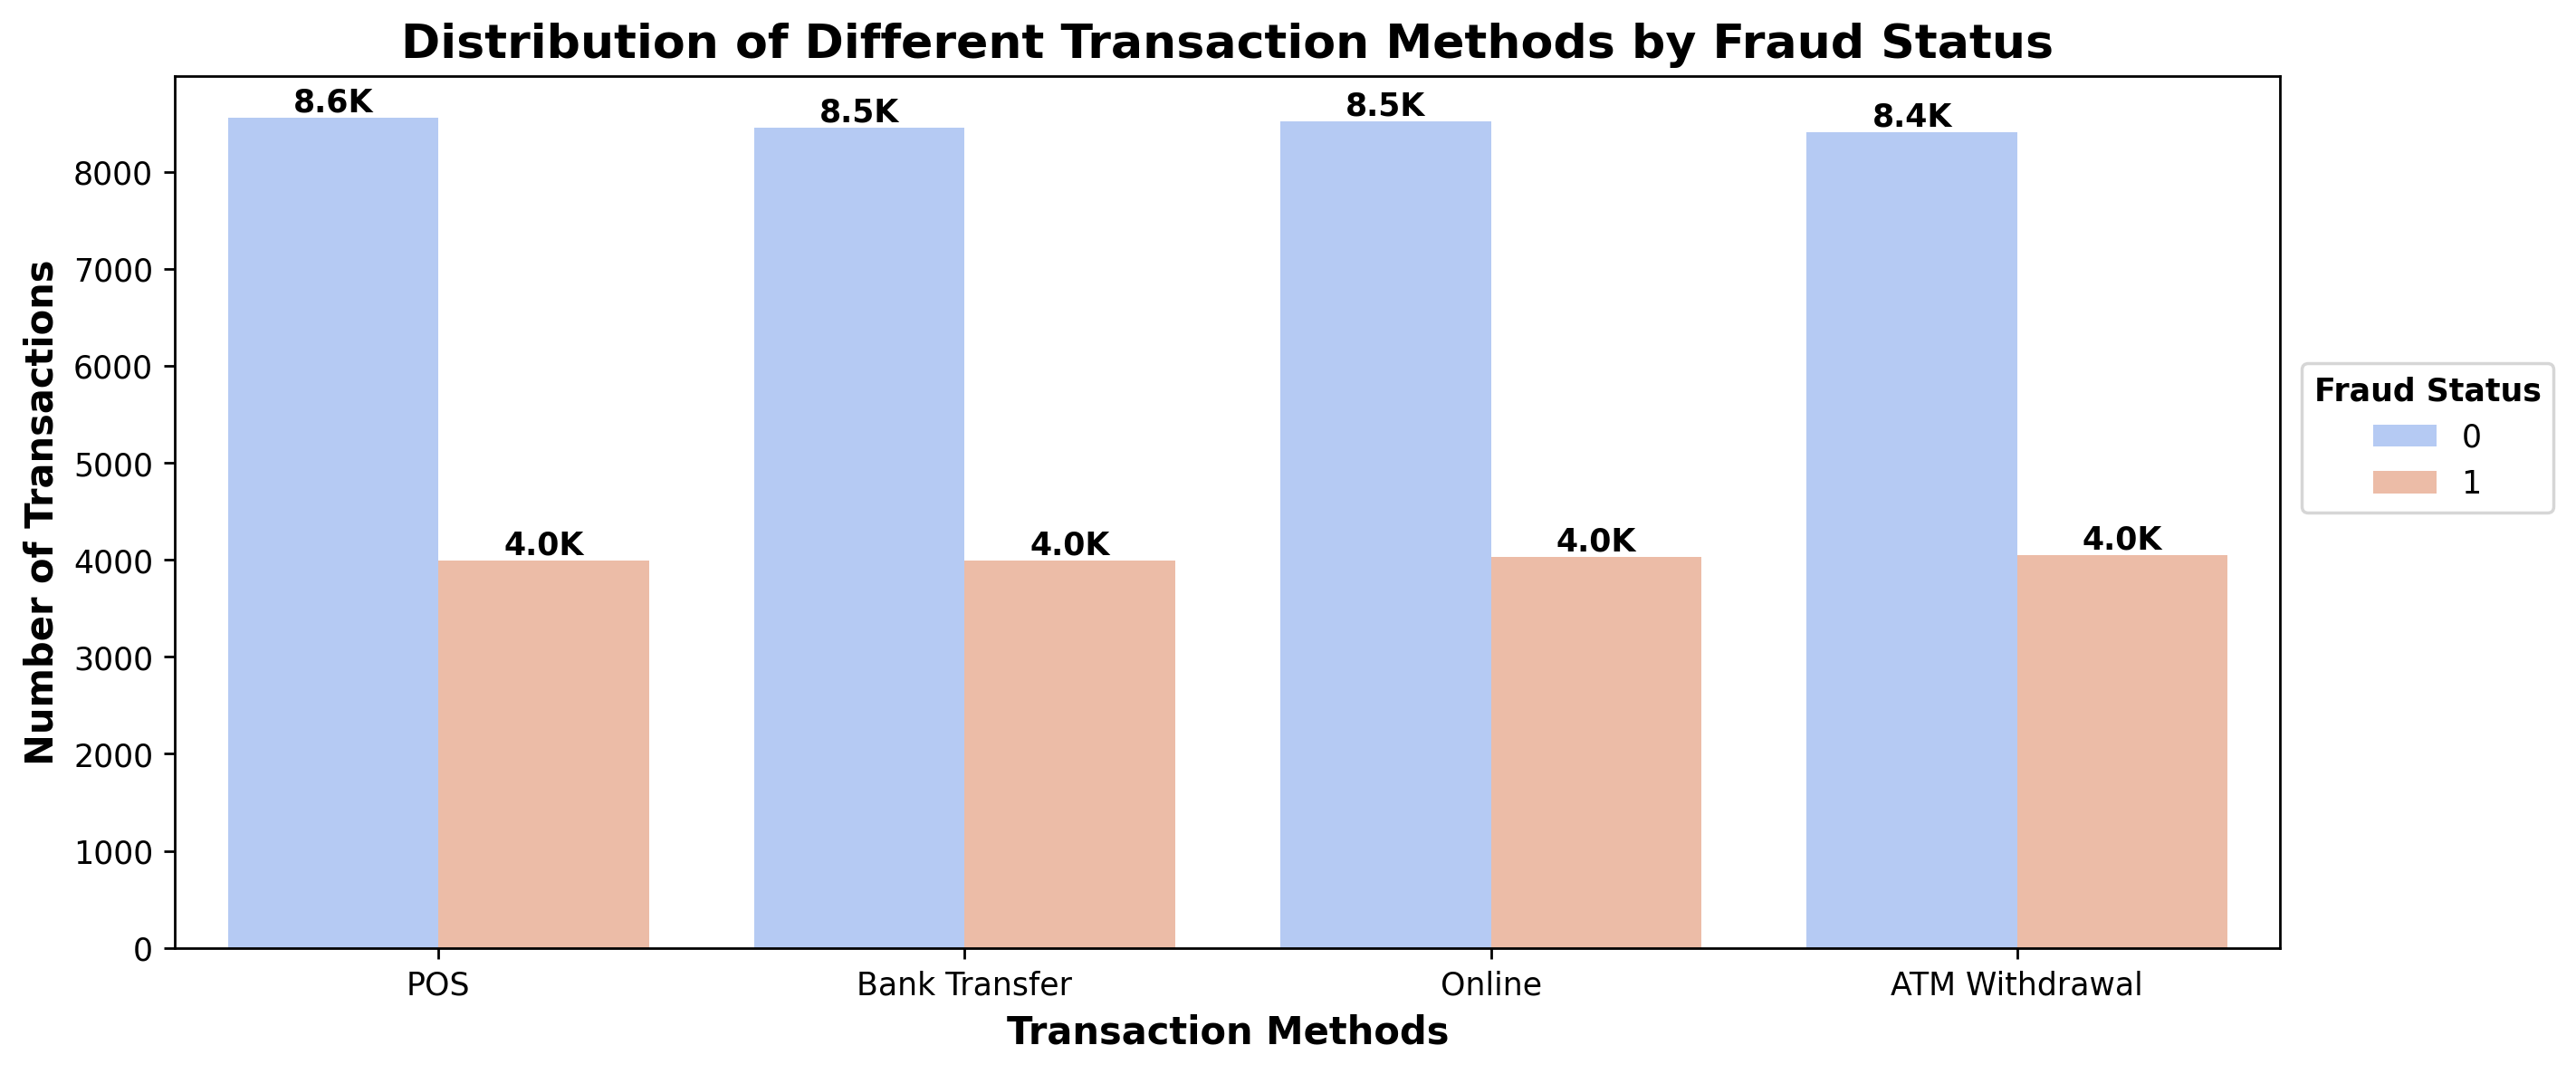

In [133]:
# Then, check the distribution of different transaction methods by fraud status
ax = sns.countplot(
    data = df,
    x = "transaction_method",
    hue = "fraud_label",
    palette = 'coolwarm'
)

annotate_bars(ax)

plt.title("Distribution of Different Transaction Methods by Fraud Status")
plt.xlabel("Transaction Methods")
plt.ylabel("Number of Transactions")

plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5))

([<matplotlib.axis.XTick at 0x1890299d950>,
 [Text(0, 0, '0'),
  Text(10000, 0, '10000'),
  Text(20000, 0, '20000'),
  Text(30000, 0, '30000'),
  Text(40000, 0, '40000'),
  Text(50000, 0, '50000'),
  Text(60000, 0, '60000'),
  Text(70000, 0, '70000'),
  Text(80000, 0, '80000'),
  Text(90000, 0, '90000')])

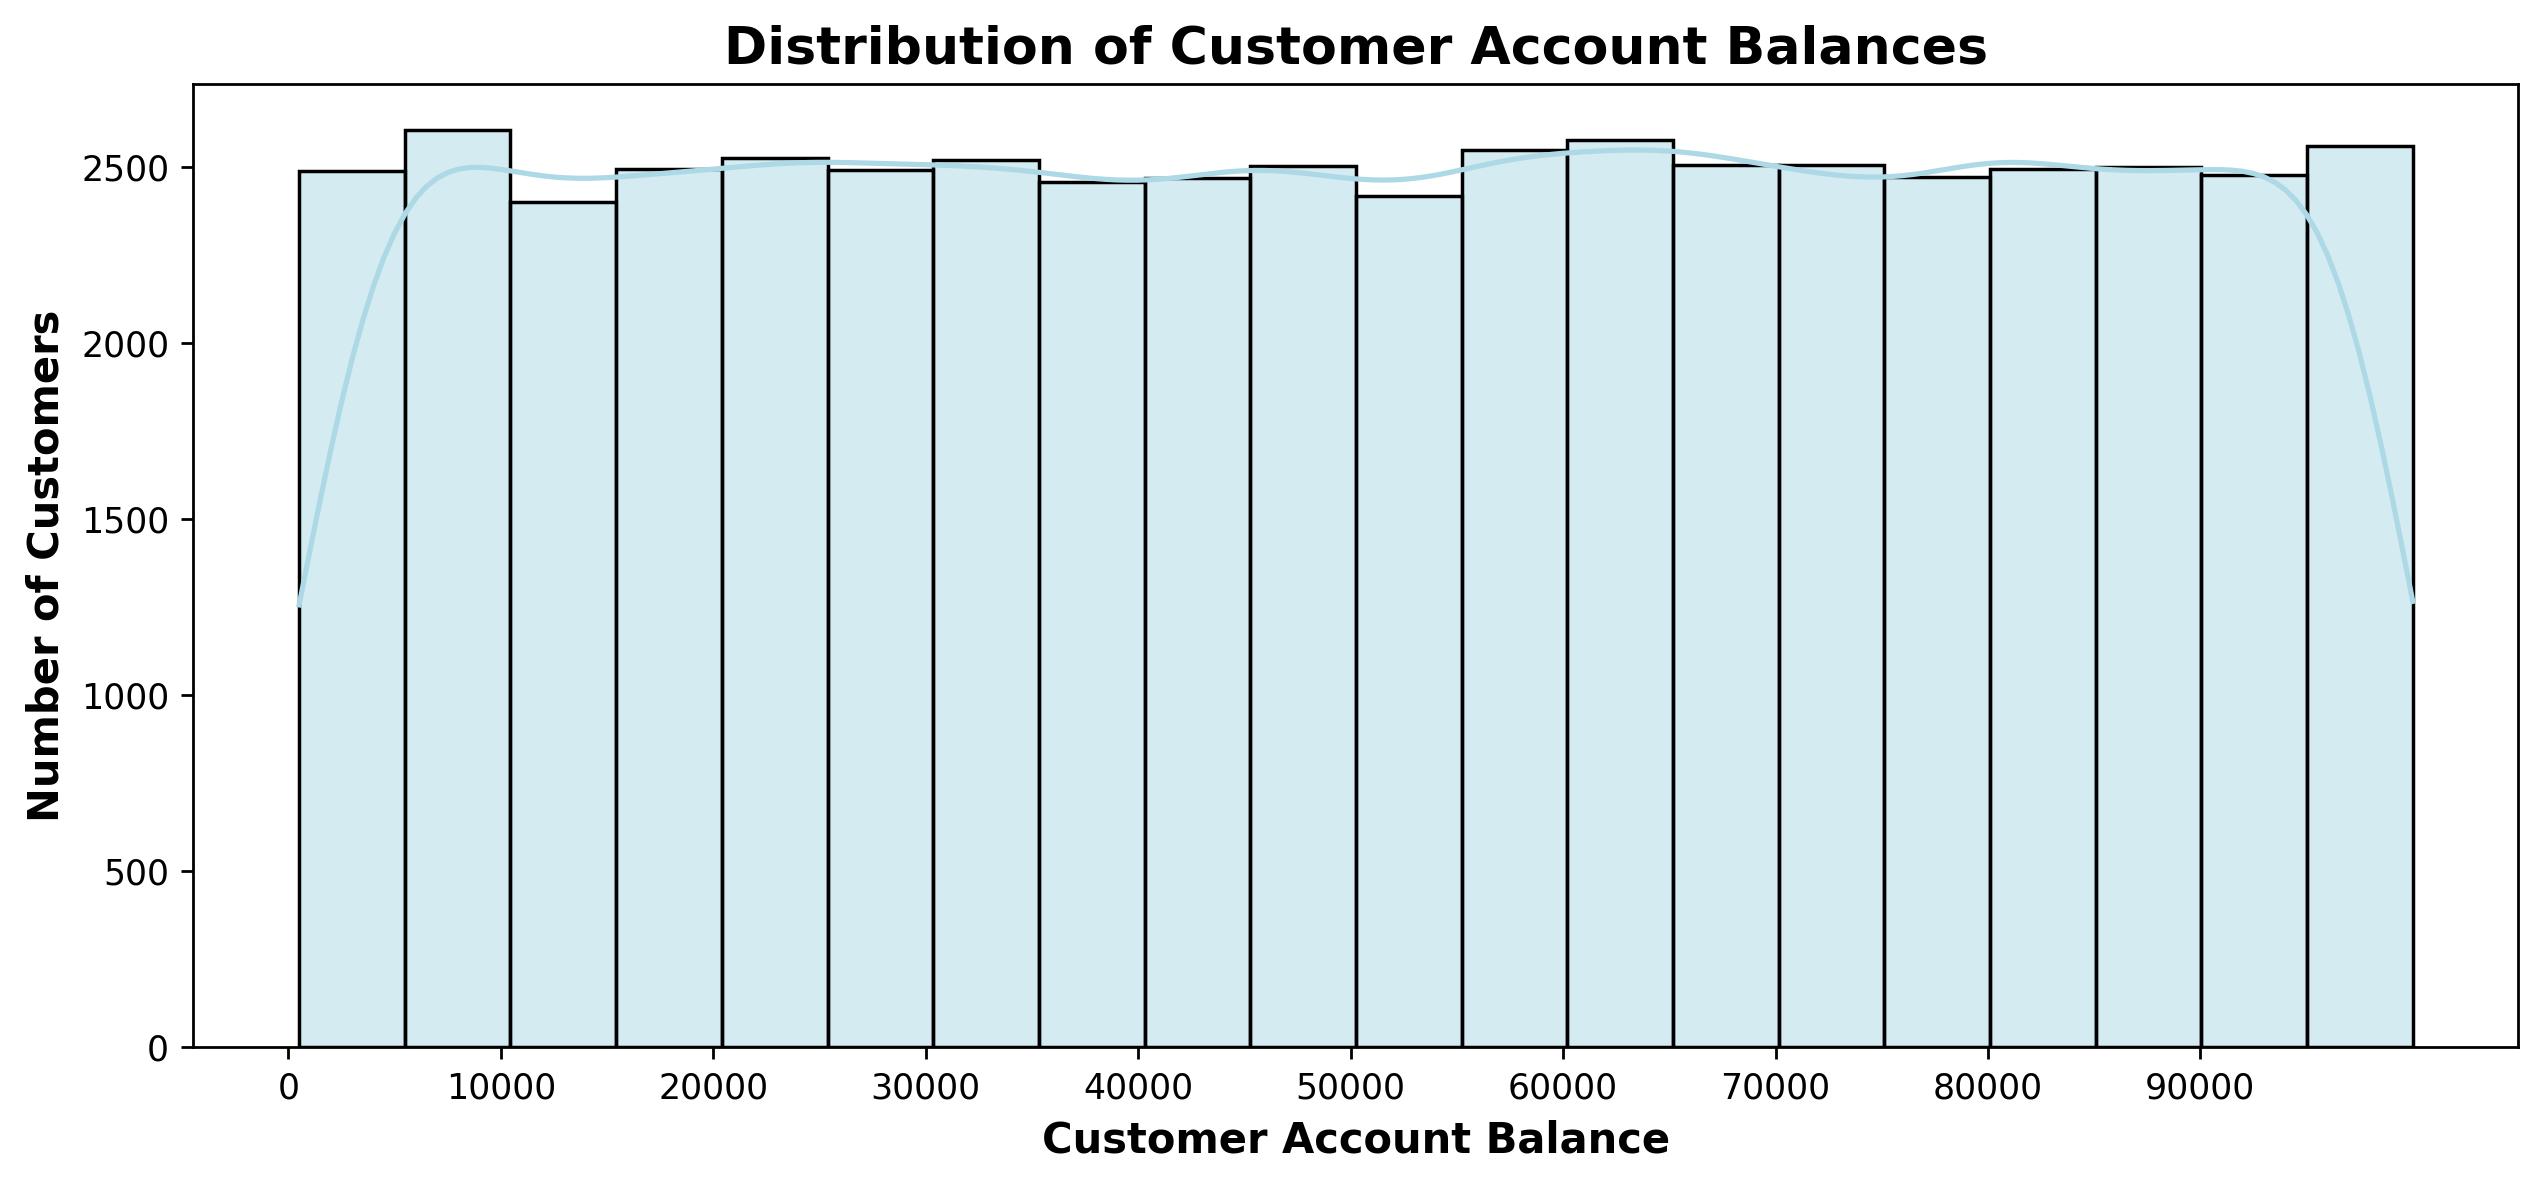

In [134]:
# Check the distribution of account balances of customers
sns.histplot(
    data = df,
    x = "account_balance",
    bins = 20,
    kde = True,
    color = "lightblue"
)

plt.title("Distribution of Customer Account Balances")
plt.xlabel("Customer Account Balance")
plt.ylabel("Number of Customers")

min_value = int(df['account_balance'].min())
max_value = int(df['account_balance'].max())
plt.xticks(range(0, max_value, 10000))

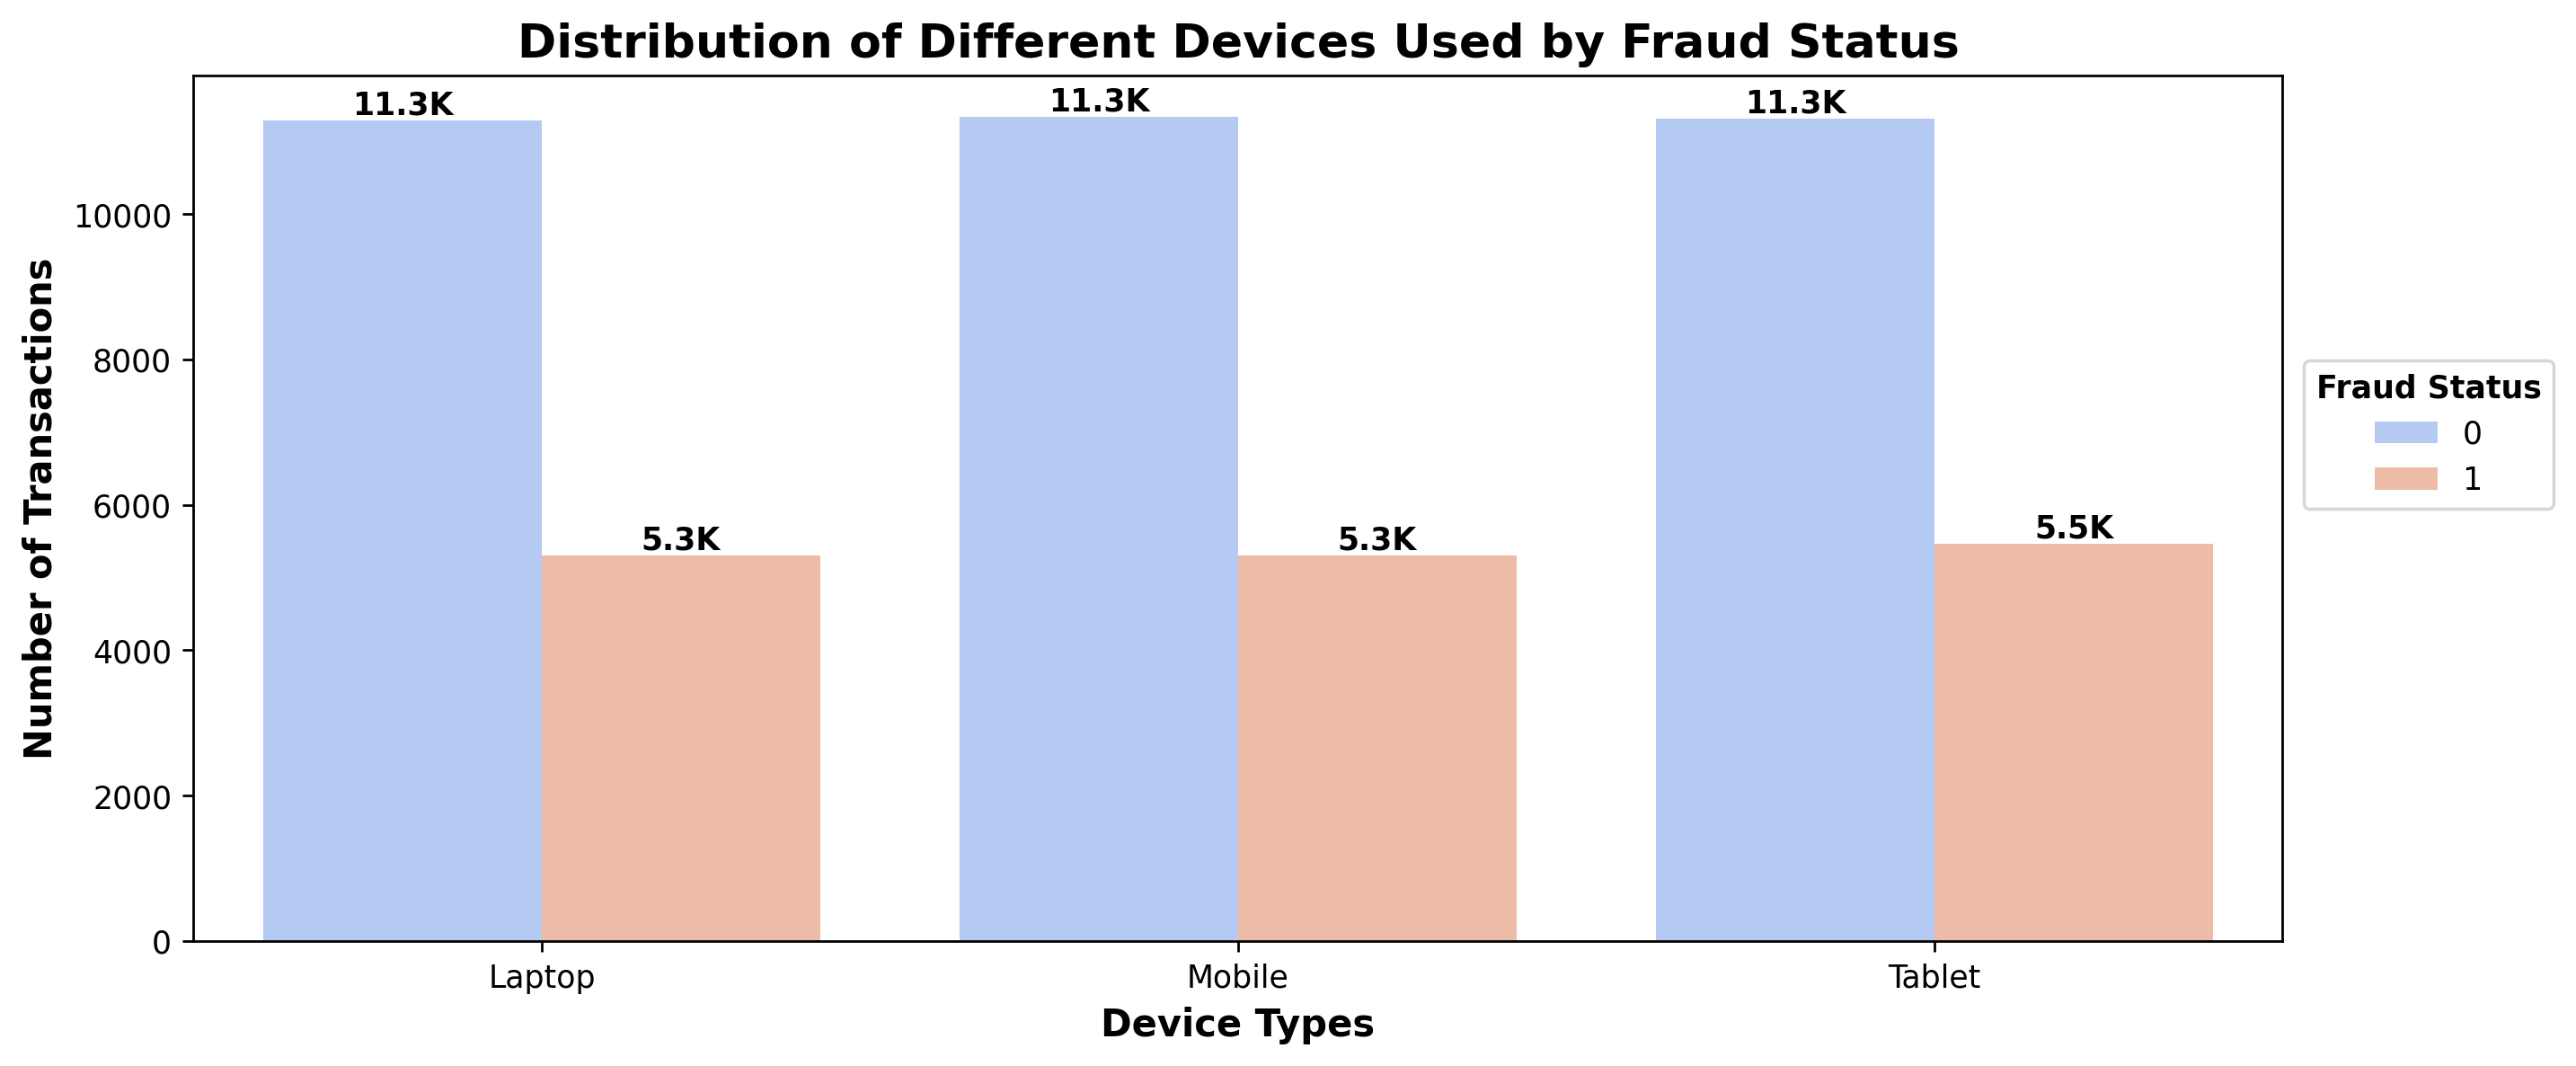

In [135]:
# Check the distribution of device types by fraud status
ax = sns.countplot(
    data = df,
    x = "device_type",
    hue = "fraud_label",
    palette = 'coolwarm'
)

annotate_bars(ax)

plt.title("Distribution of Different Devices Used by Fraud Status")
plt.xlabel("Device Types")
plt.ylabel("Number of Transactions")

plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5))

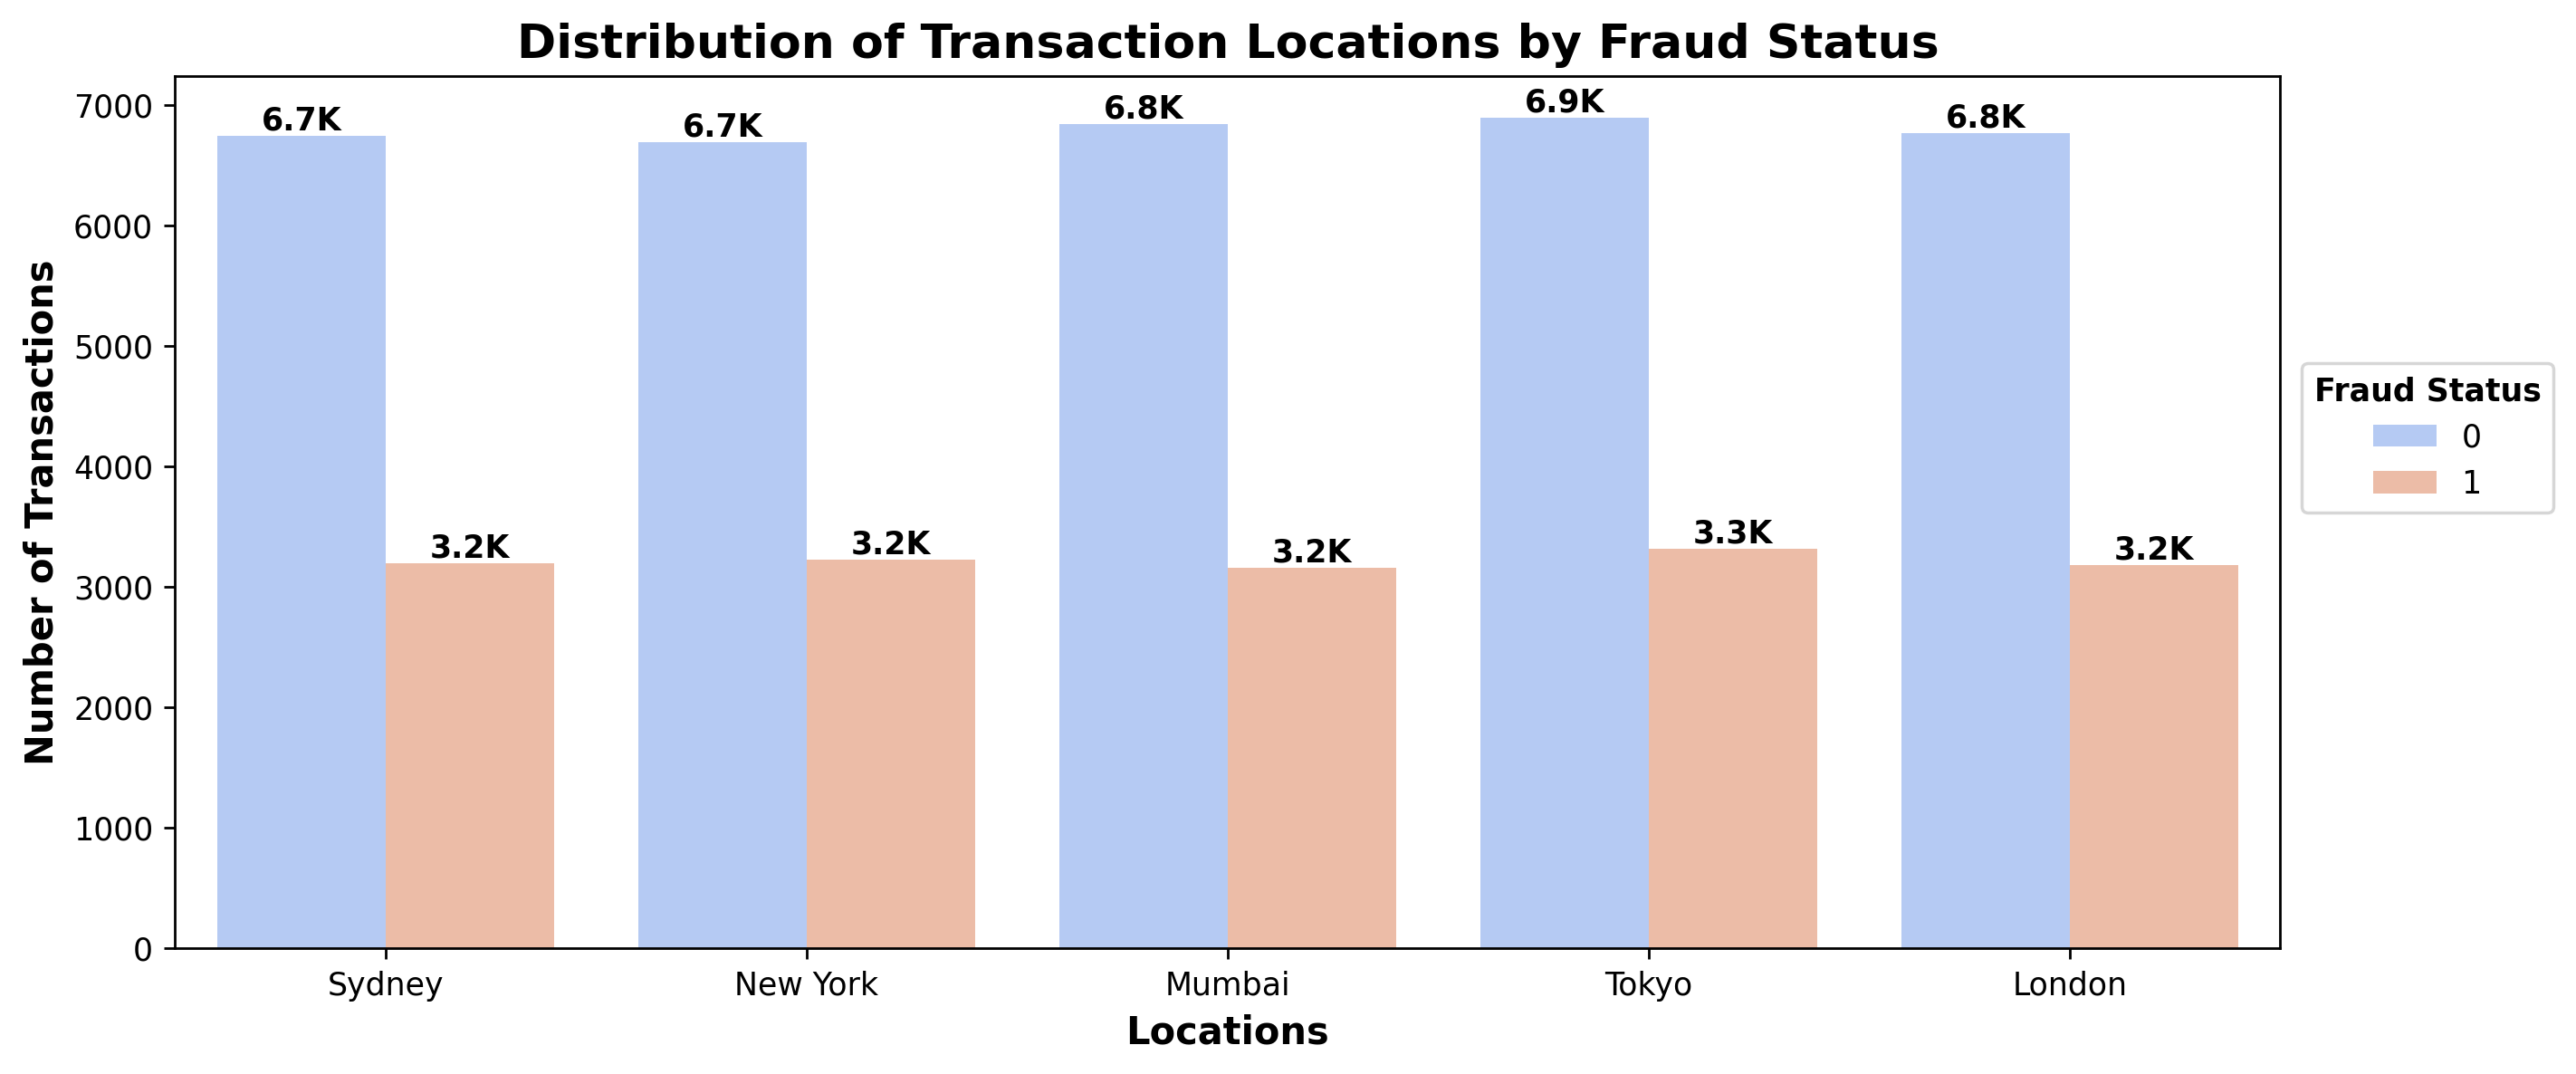

In [136]:
# Check the distribution of transaction locations by fraud status
ax = sns.countplot(
    data = df,
    x = "transaction_location",
    hue = "fraud_label",
    palette = 'coolwarm'
)

annotate_bars(ax)

plt.title("Distribution of Transaction Locations by Fraud Status")
plt.xlabel("Locations")
plt.ylabel("Number of Transactions")

plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5))

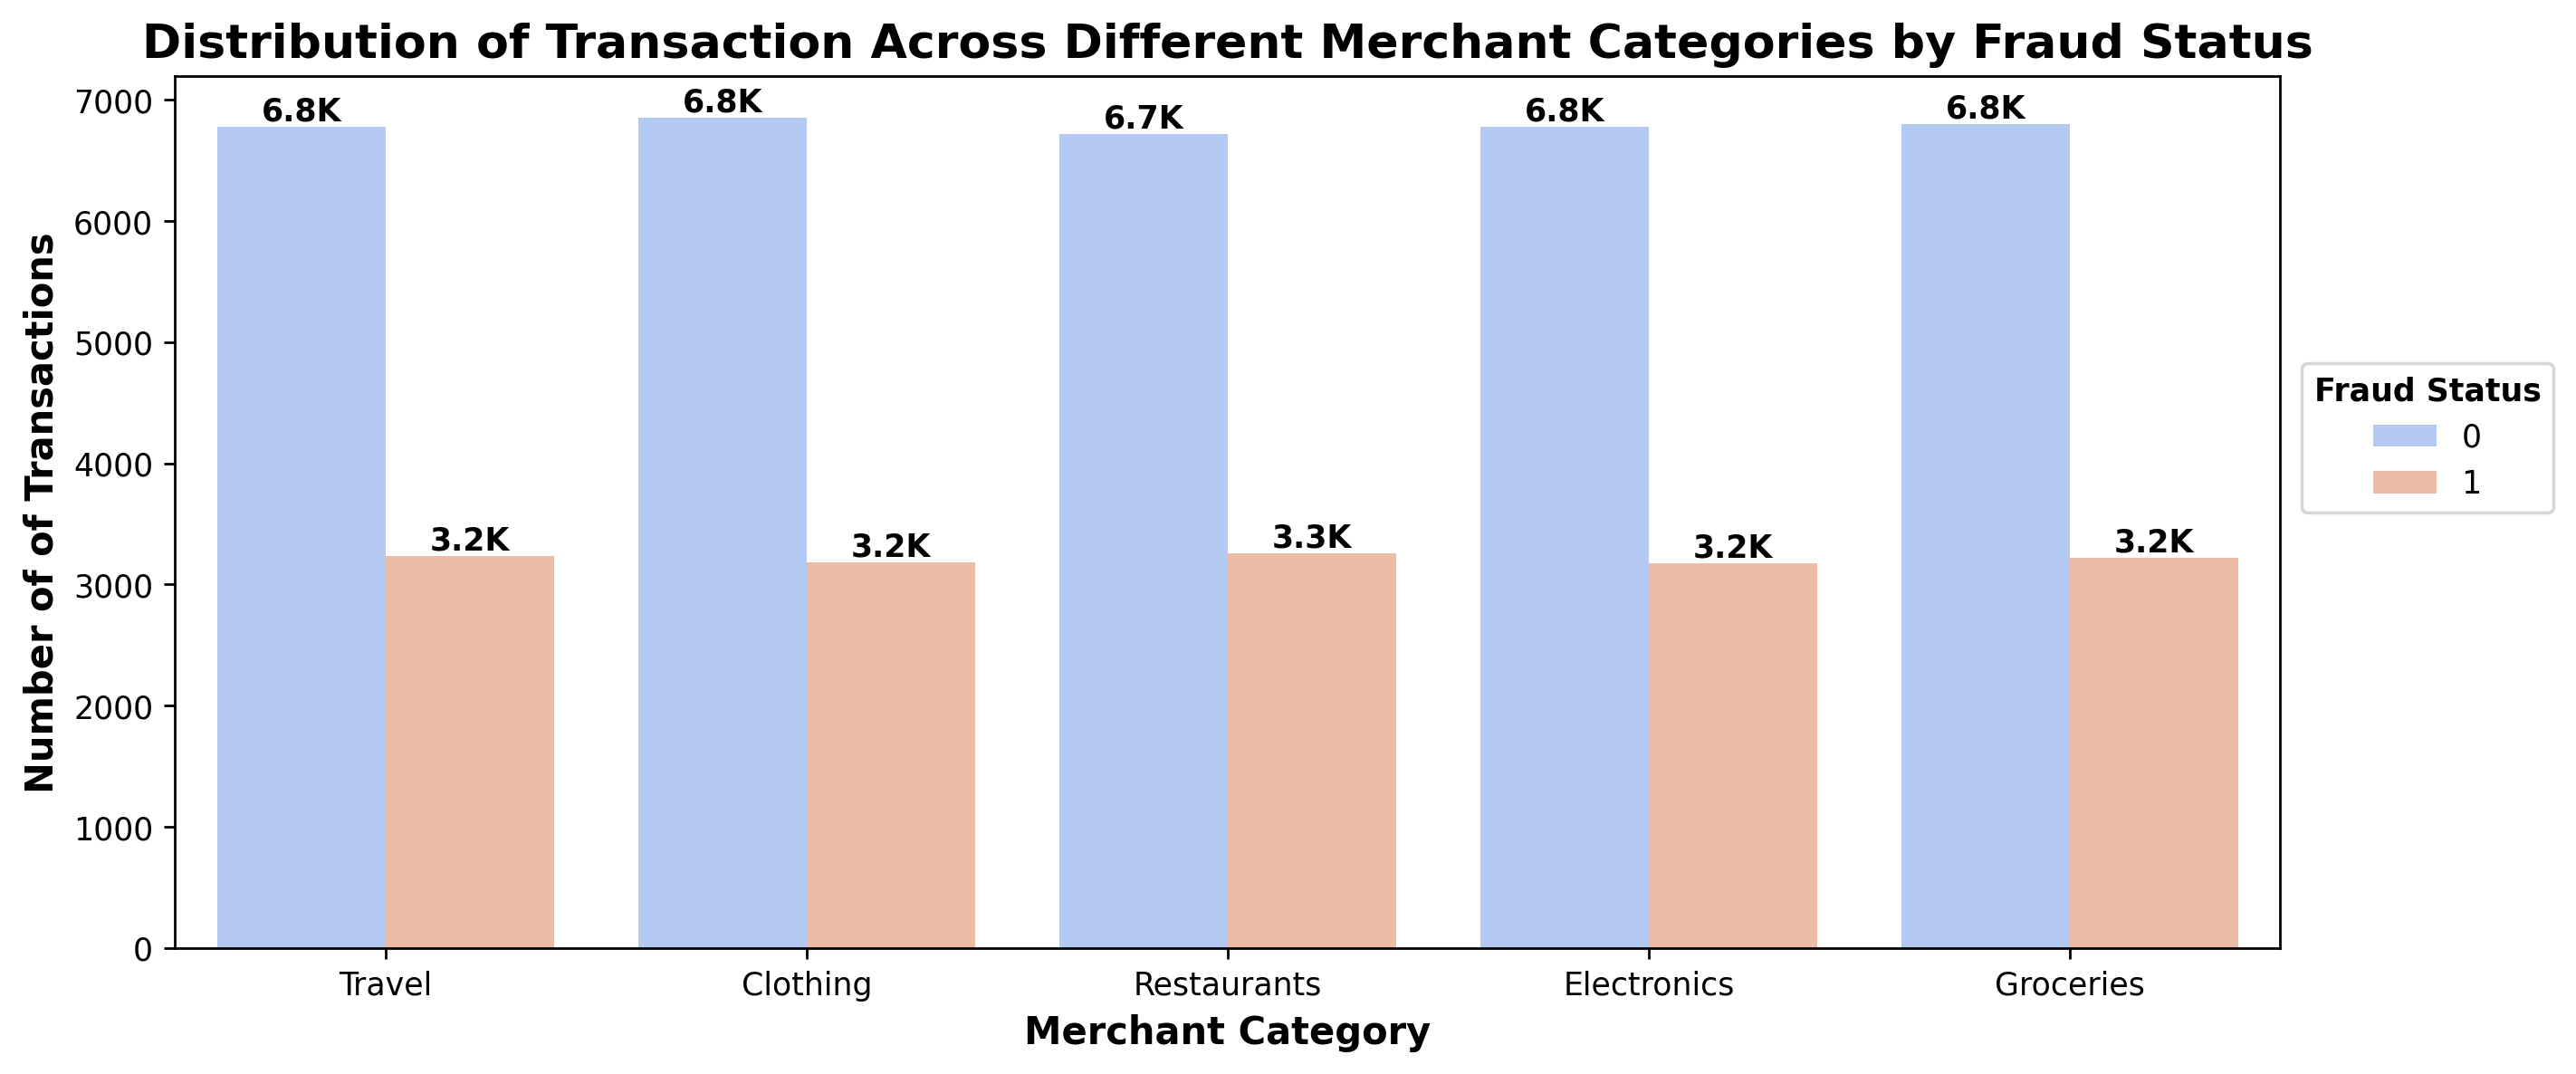

In [137]:
# Check the distribution of transactions across different merchant categories by fraud status
ax = sns.countplot(
    data = df,
    x = "merchant_category",
    hue = "fraud_label",
    palette = 'coolwarm'
)

annotate_bars(ax)

plt.title("Distribution of Transaction Across Different Merchant Categories by Fraud Status")
plt.xlabel("Merchant Category")
plt.ylabel("Number of of Transactions")

plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5))

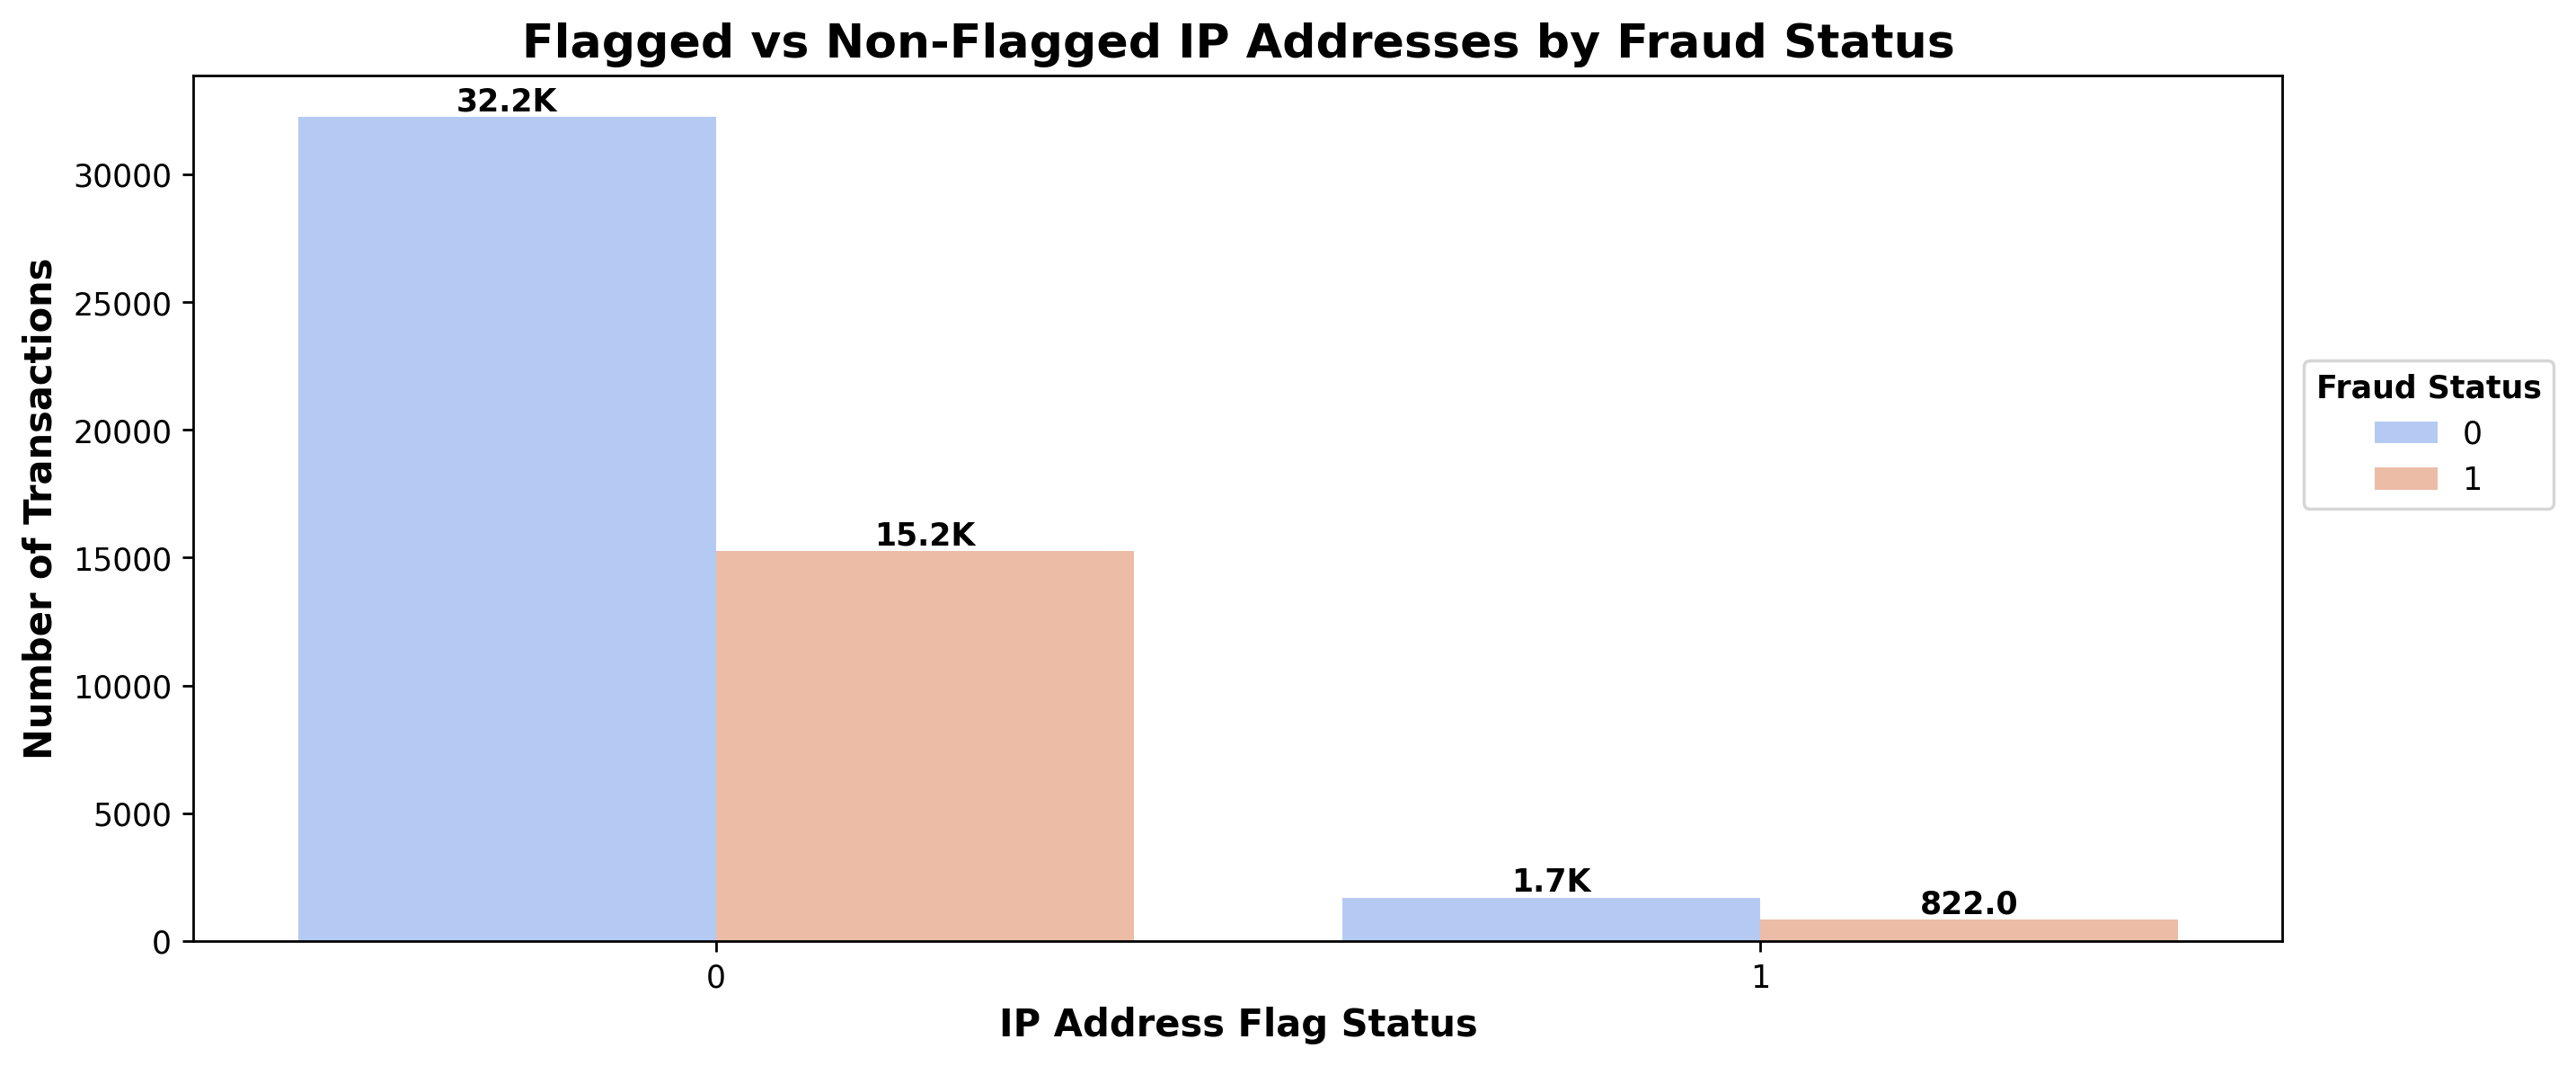

In [138]:
# Check the number of IP addresses are flagged in the dataset by fraud status
ax = sns.countplot(
    data = df,
    x = "ip_address_flag",
    hue = "fraud_label",
    palette = 'coolwarm'
)

annotate_bars(ax)

plt.title("Flagged vs Non-Flagged IP Addresses by Fraud Status")
plt.xlabel("IP Address Flag Status")
plt.ylabel("Number of Transactions")

plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5))

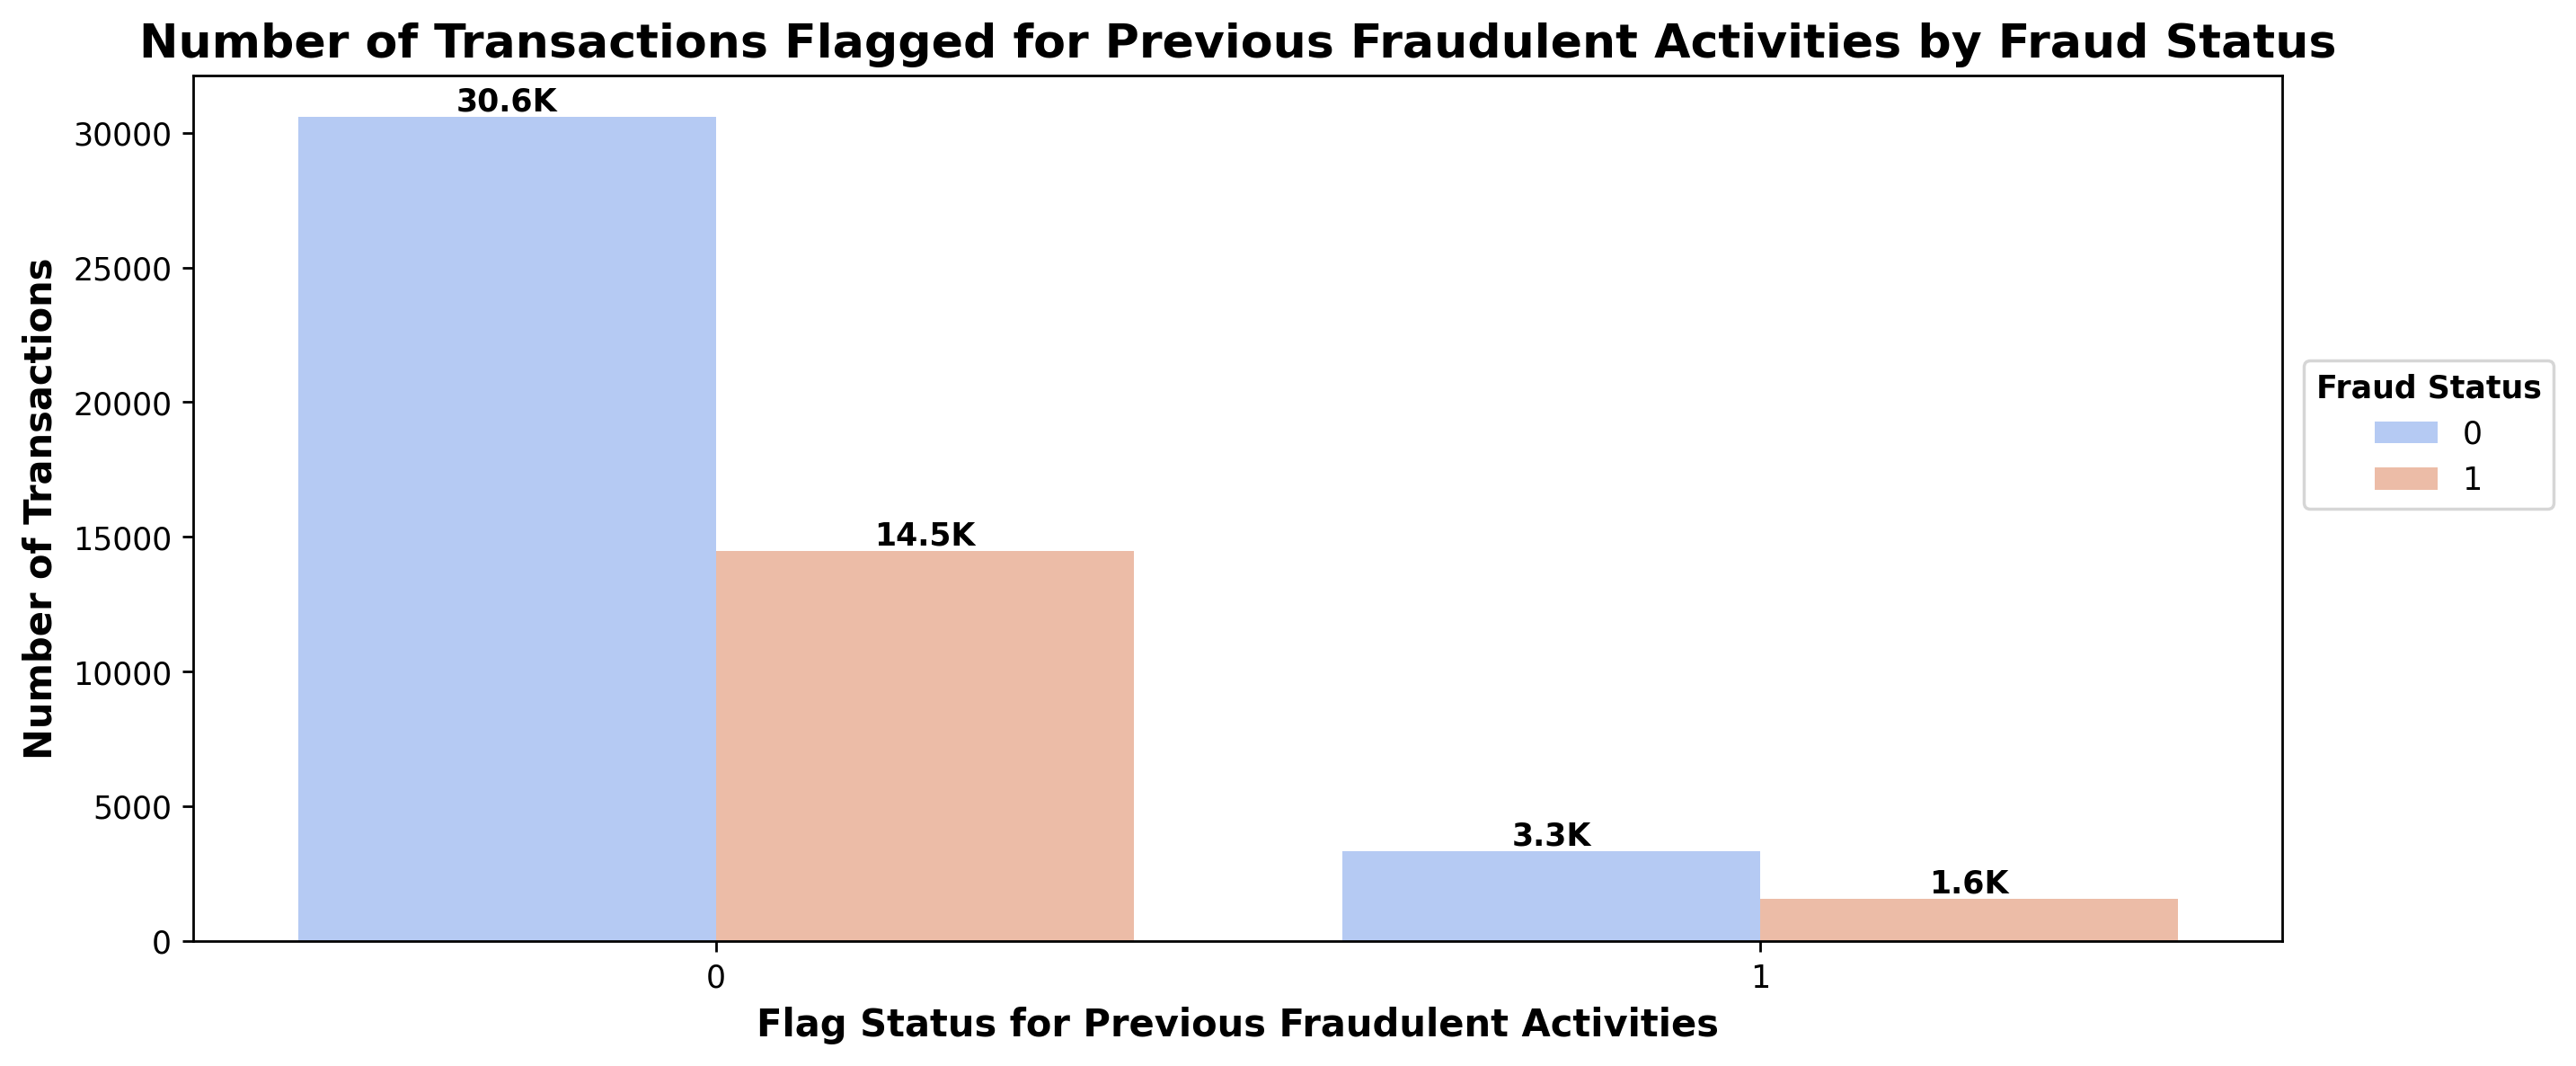

In [139]:
# Check the number of transactions flagged for previous fraudulent activities in the dataset by fraud status
ax = sns.countplot(
    data = df,
    x = "previous_fraudulent_activities",
    hue = "fraud_label",
    palette = 'coolwarm'
)

annotate_bars(ax)

plt.title("Number of Transactions Flagged for Previous Fraudulent Activities by Fraud Status")
plt.xlabel("Flag Status for Previous Fraudulent Activities")
plt.ylabel("Number of Transactions")

plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5))

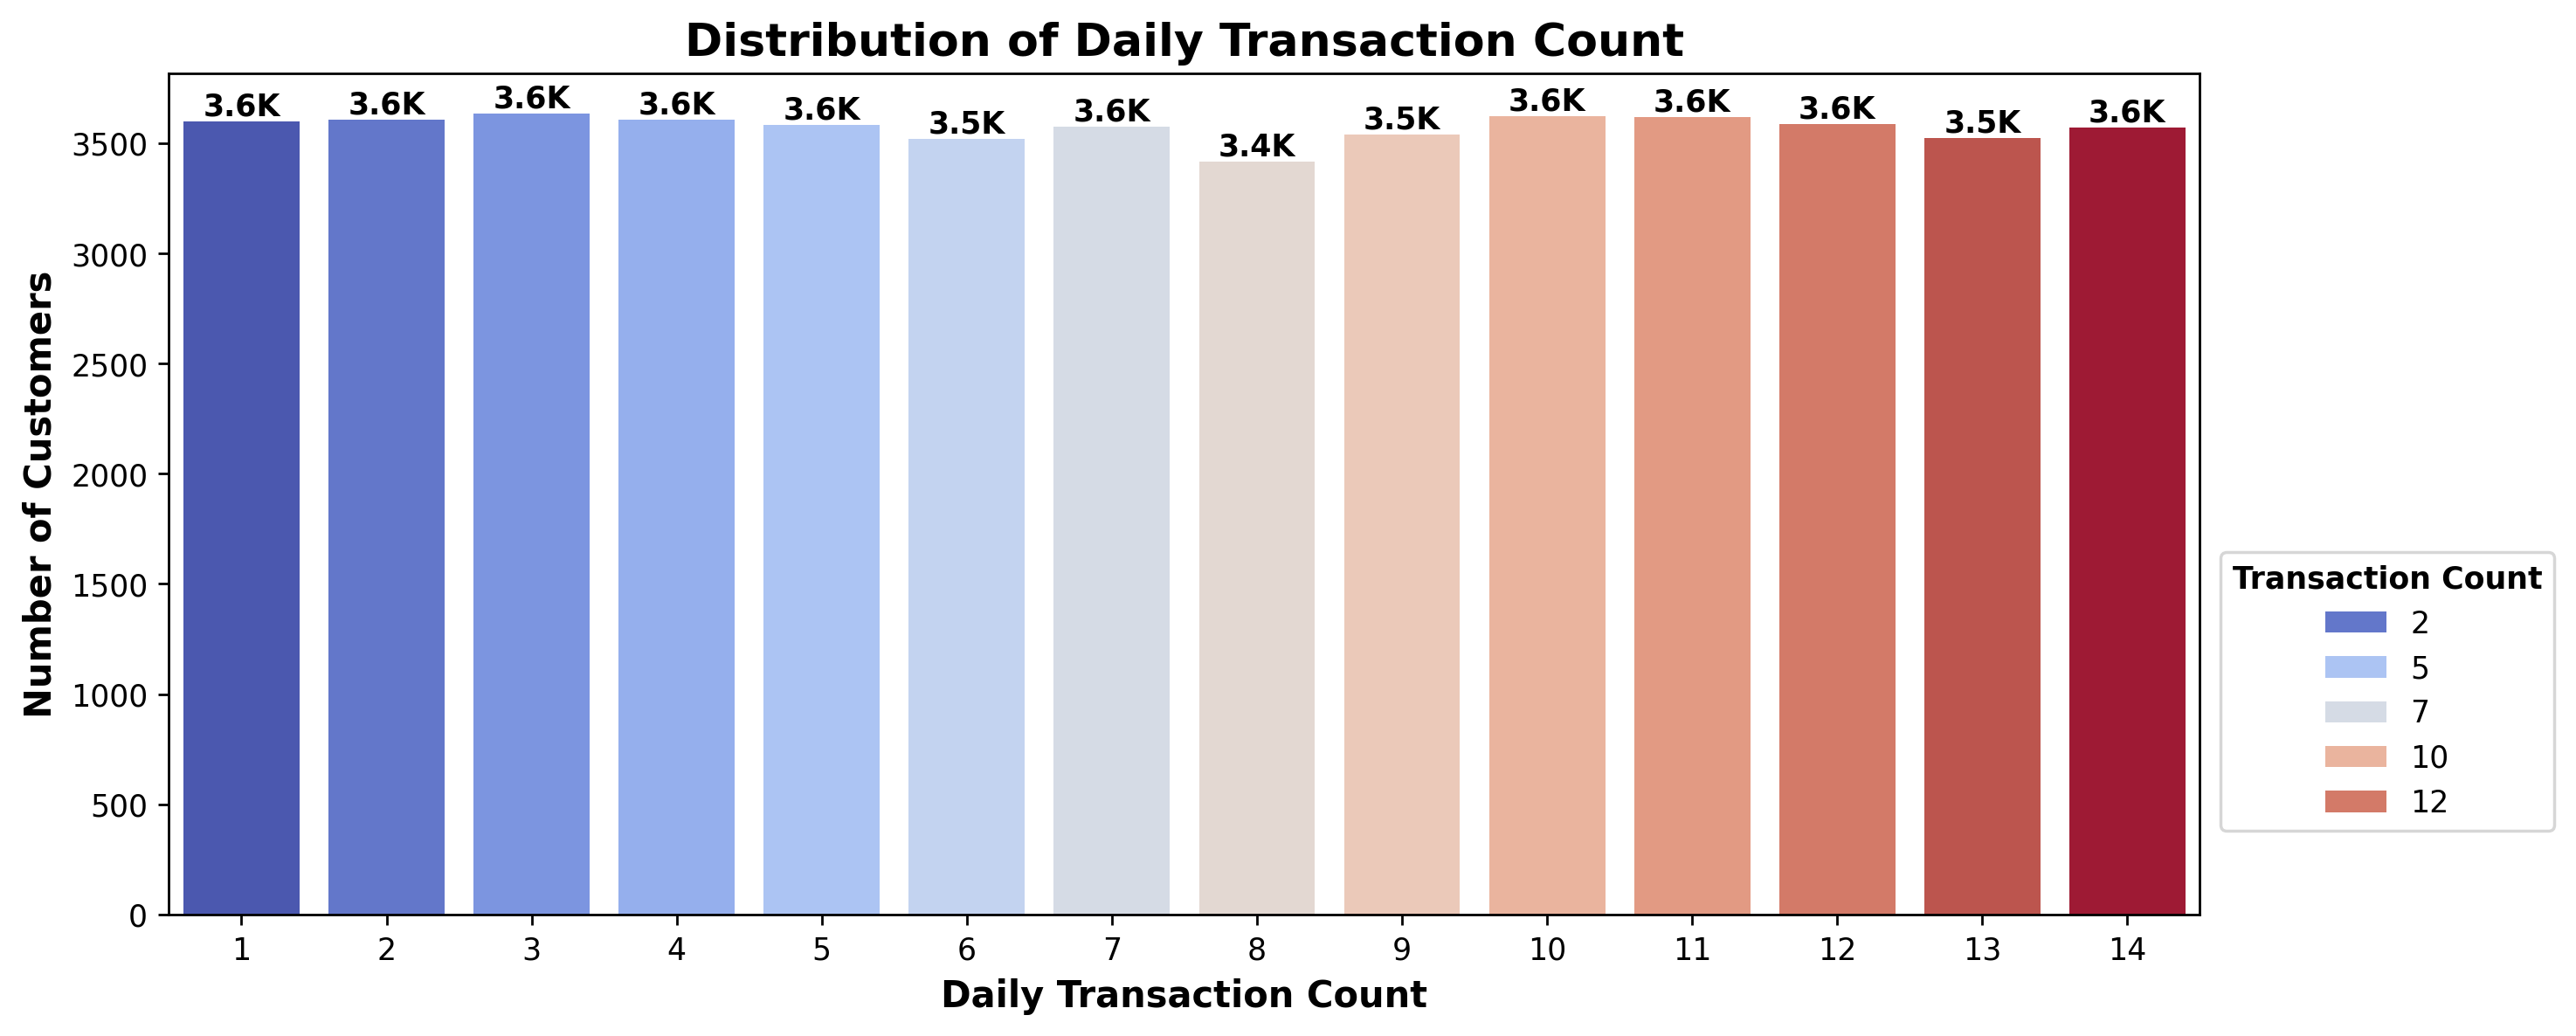

In [140]:
# Check the distribution of daily transaction counts
ax = sns.countplot(
    data = df,
    x = "daily_transaction_count",
    hue = "daily_transaction_count",
    palette = "coolwarm",
    dodge = False
)

annotate_bars(ax)

plt.title("Distribution of Daily Transaction Count")
plt.xlabel("Daily Transaction Count")
plt.ylabel("Number of Customers")

plt.legend(title = "Transaction Count", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.1))

([<matplotlib.axis.XTick at 0x18902b44690>,
 [Text(10, 0, '10'),
  Text(60, 0, '60'),
  Text(110, 0, '110'),
  Text(160, 0, '160'),
  Text(210, 0, '210'),
  Text(260, 0, '260'),
  Text(310, 0, '310'),
  Text(360, 0, '360'),
  Text(410, 0, '410'),
  Text(460, 0, '460')])

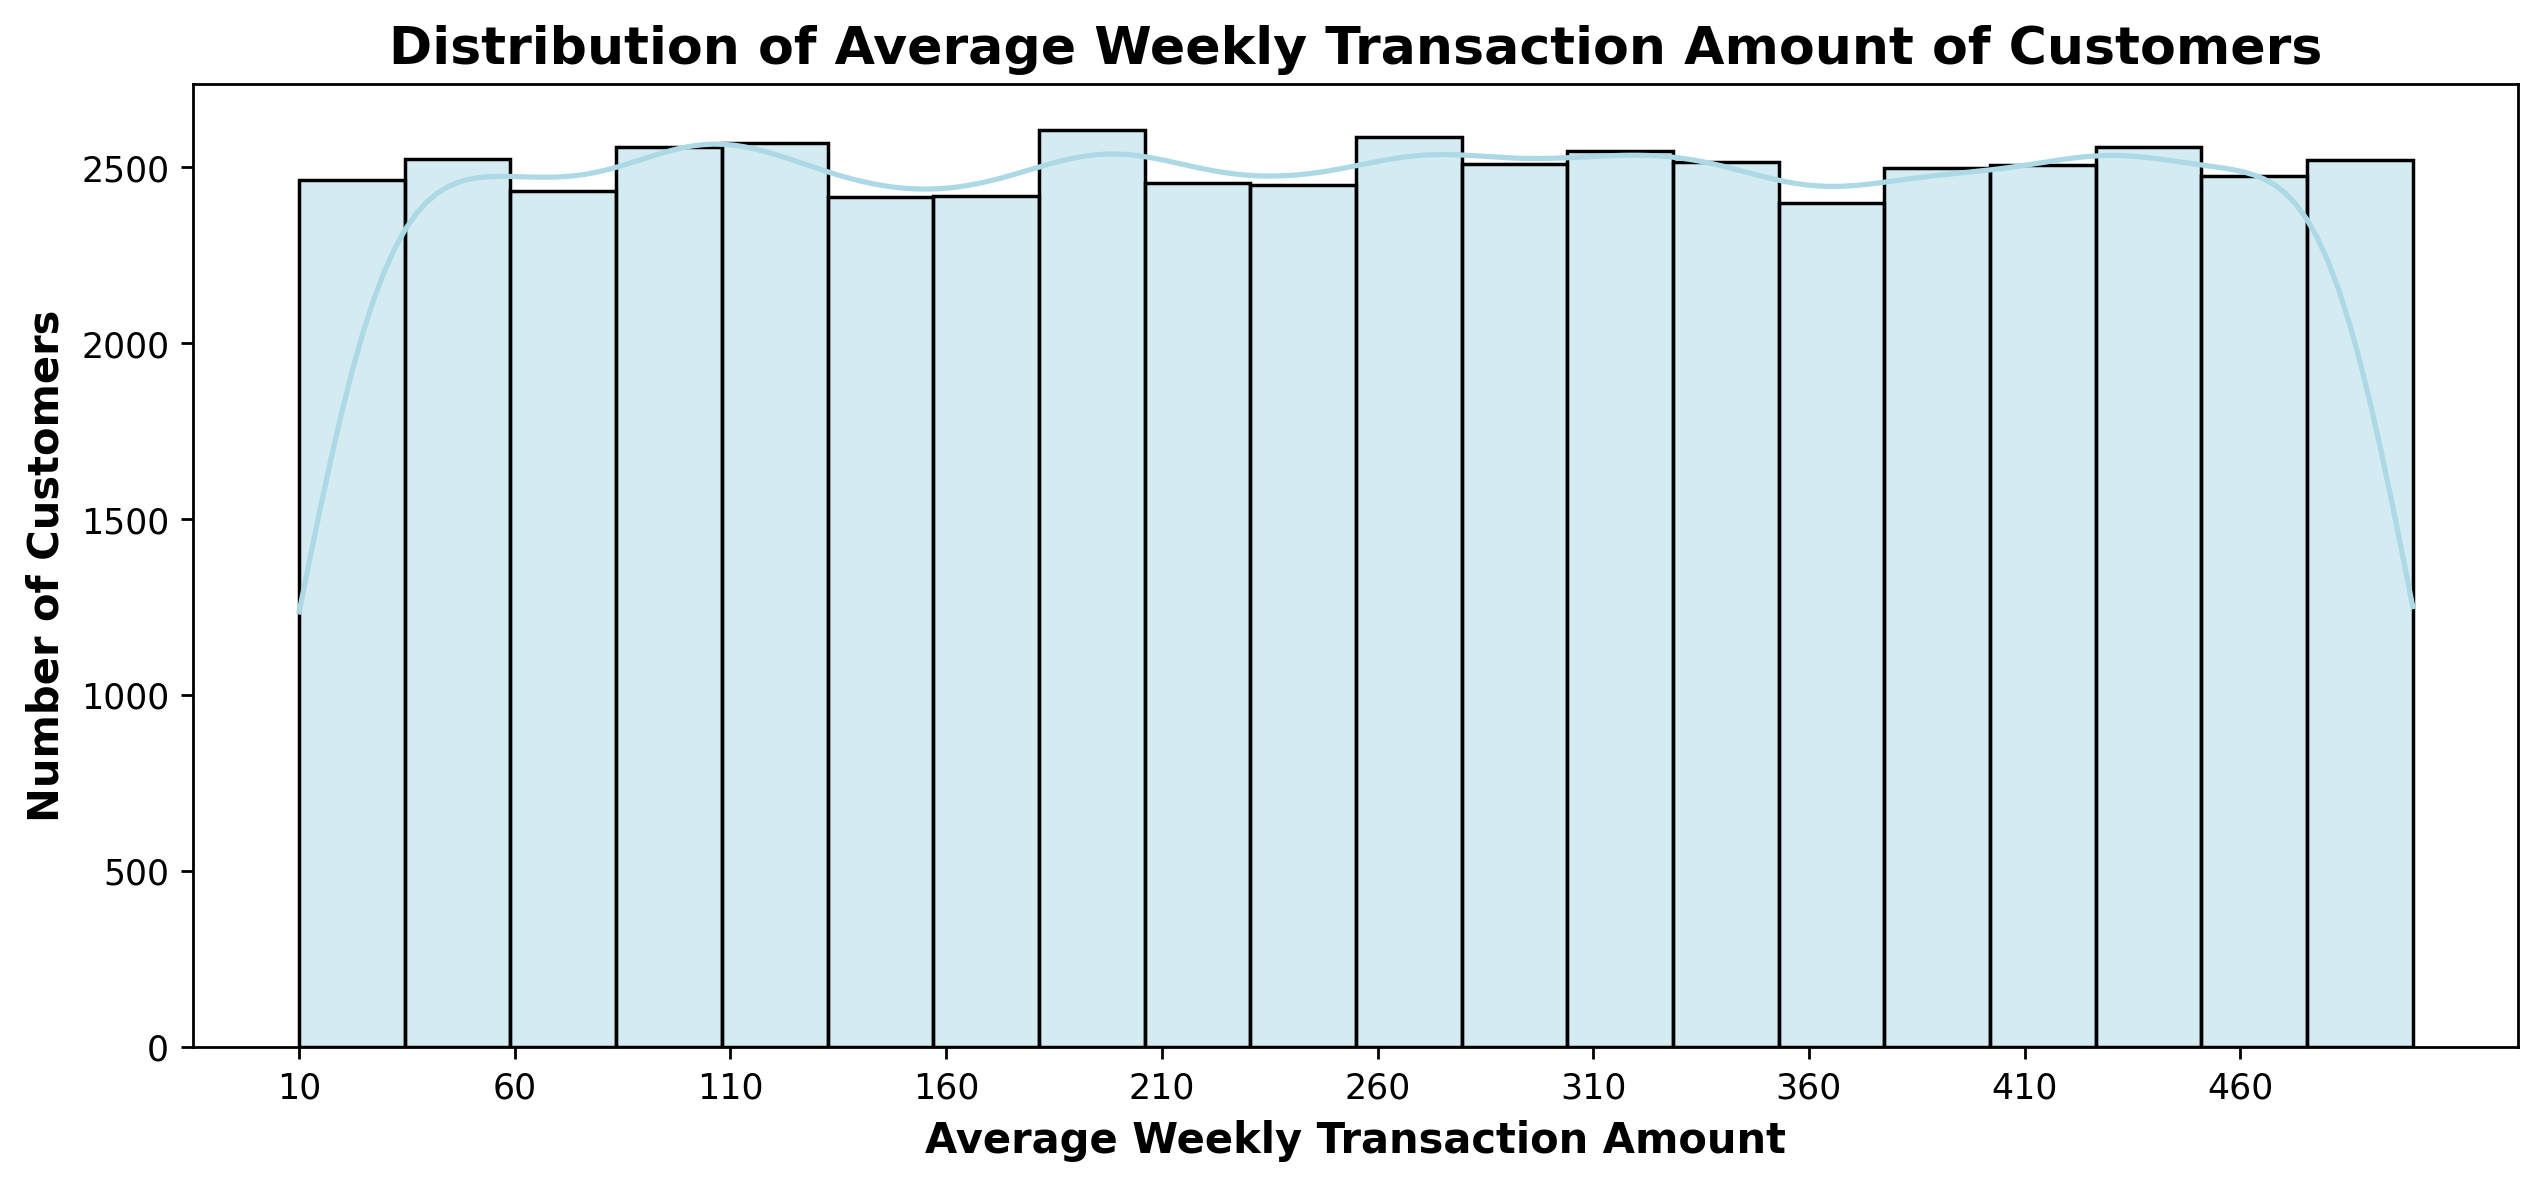

In [141]:
# Check the distribution of the average weekly transaction amount for customers
sns.histplot(
    data = df,
    x = "avg_transaction_amount_7d",
    bins = 20,
    kde = True,
    color = "lightblue"
)

plt.title("Distribution of Average Weekly Transaction Amount of Customers")
plt.xlabel("Average Weekly Transaction Amount")
plt.ylabel("Number of Customers")

min_value = int(df['avg_transaction_amount_7d'].min())
max_value = int(df['avg_transaction_amount_7d'].max())
plt.xticks(range(min_value, max_value, 50))

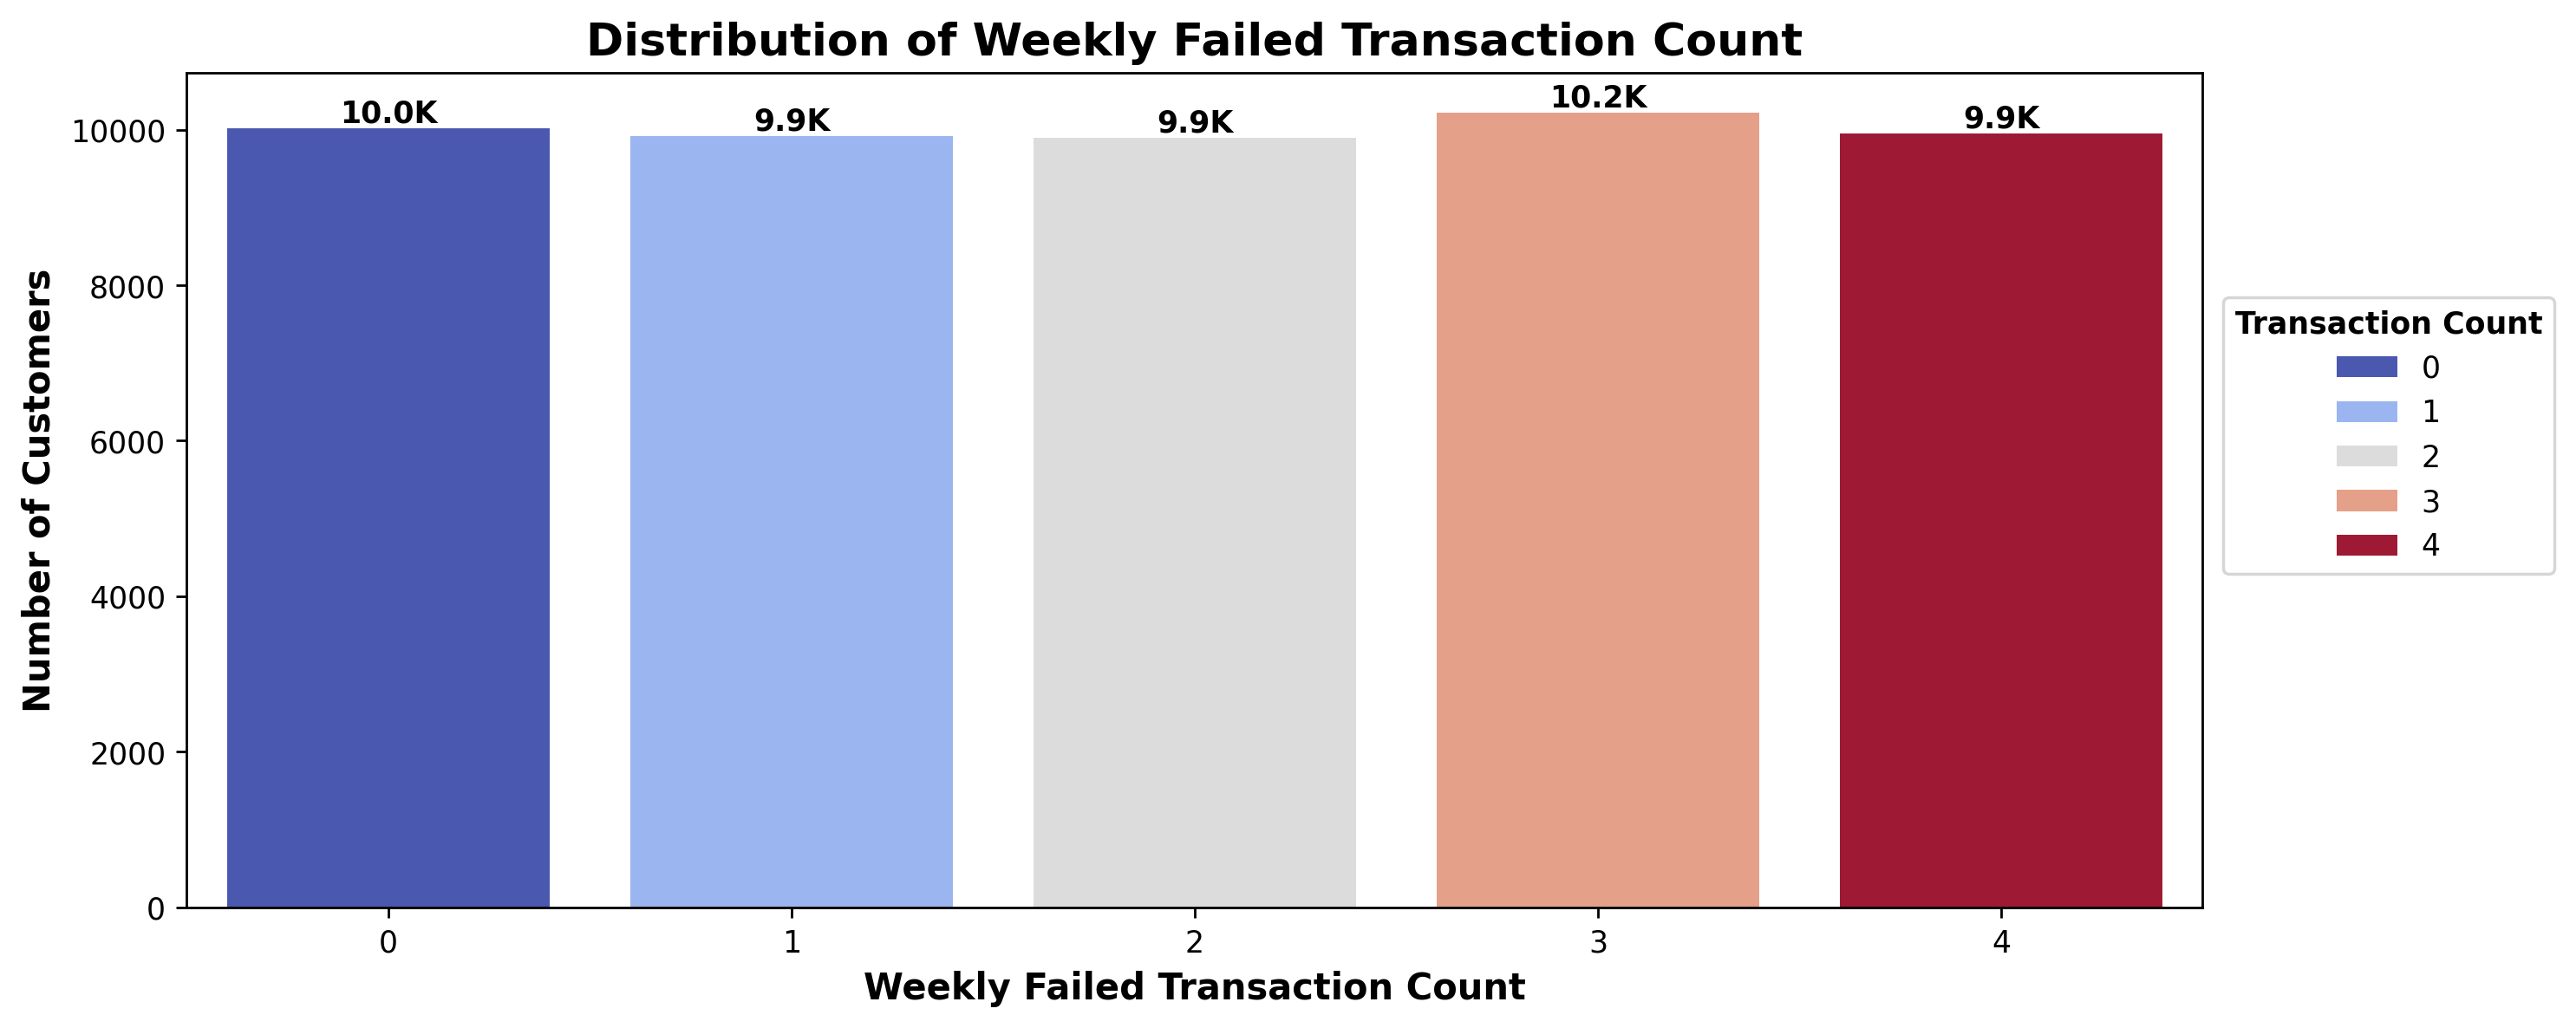

In [142]:
# Check the distribution of weekly failed transaction counts
ax = sns.countplot(
    data = df,
    x = "failed_transaction_count_7d",
    hue = "failed_transaction_count_7d",
    palette = "coolwarm",
    dodge = False
)

annotate_bars(ax)

plt.title("Distribution of Weekly Failed Transaction Count")
plt.xlabel("Weekly Failed Transaction Count")
plt.ylabel("Number of Customers")

plt.legend(title = "Transaction Count", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.4))

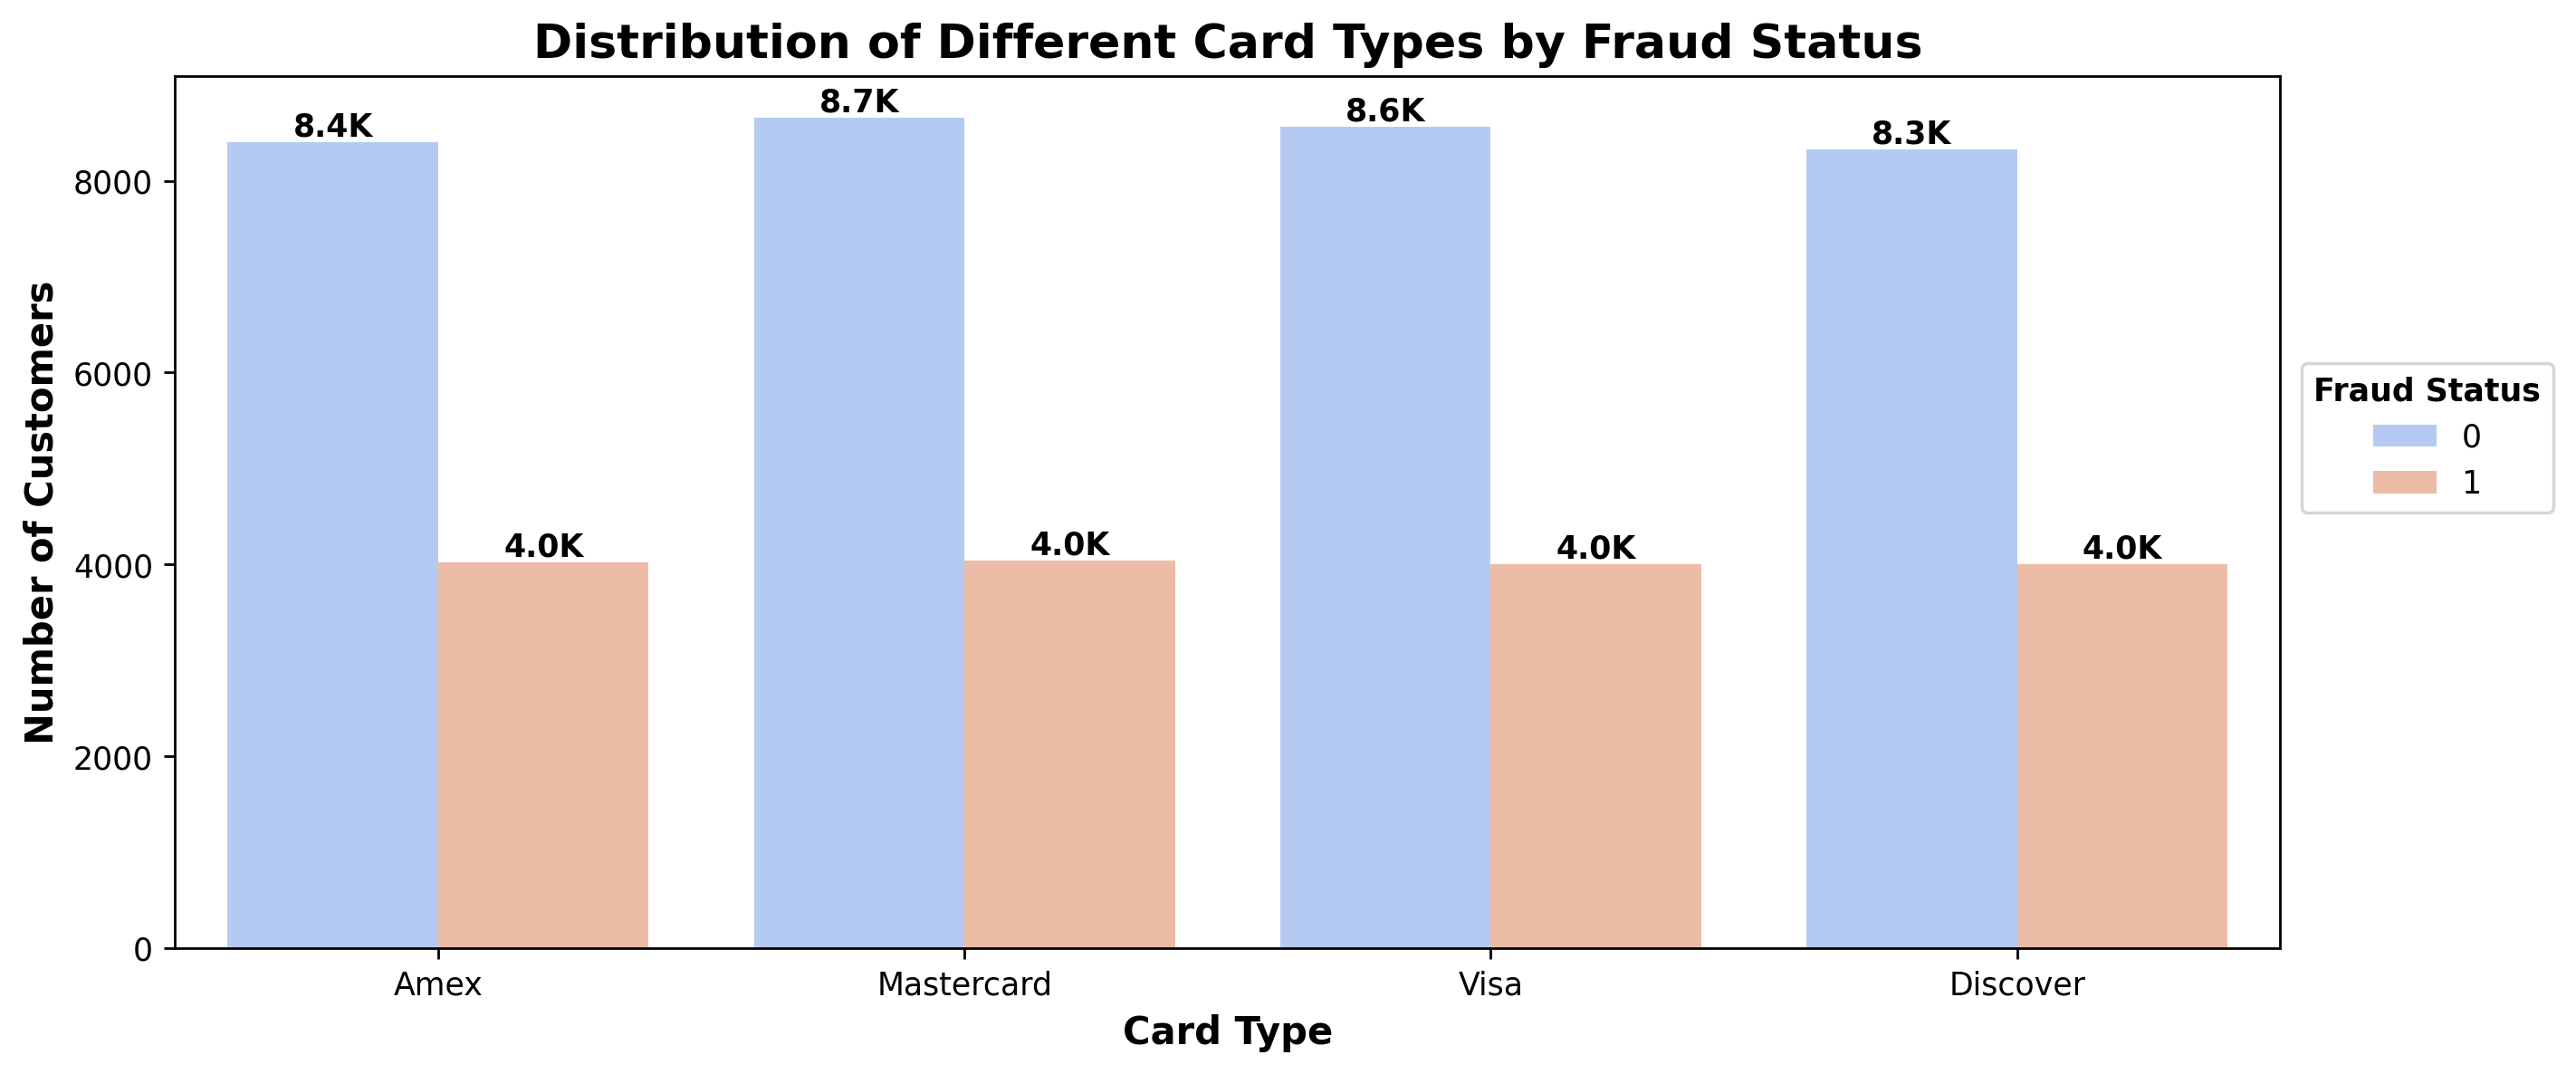

In [143]:
# Check the distribution of different card types by fraud status
ax = sns.countplot(
    data = df,
    x = "card_type",
    hue = "fraud_label",
    palette = 'coolwarm'
)

annotate_bars(ax)

plt.title("Distribution of Different Card Types by Fraud Status")
plt.xlabel("Card Type")
plt.ylabel("Number of Customers")

plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5))

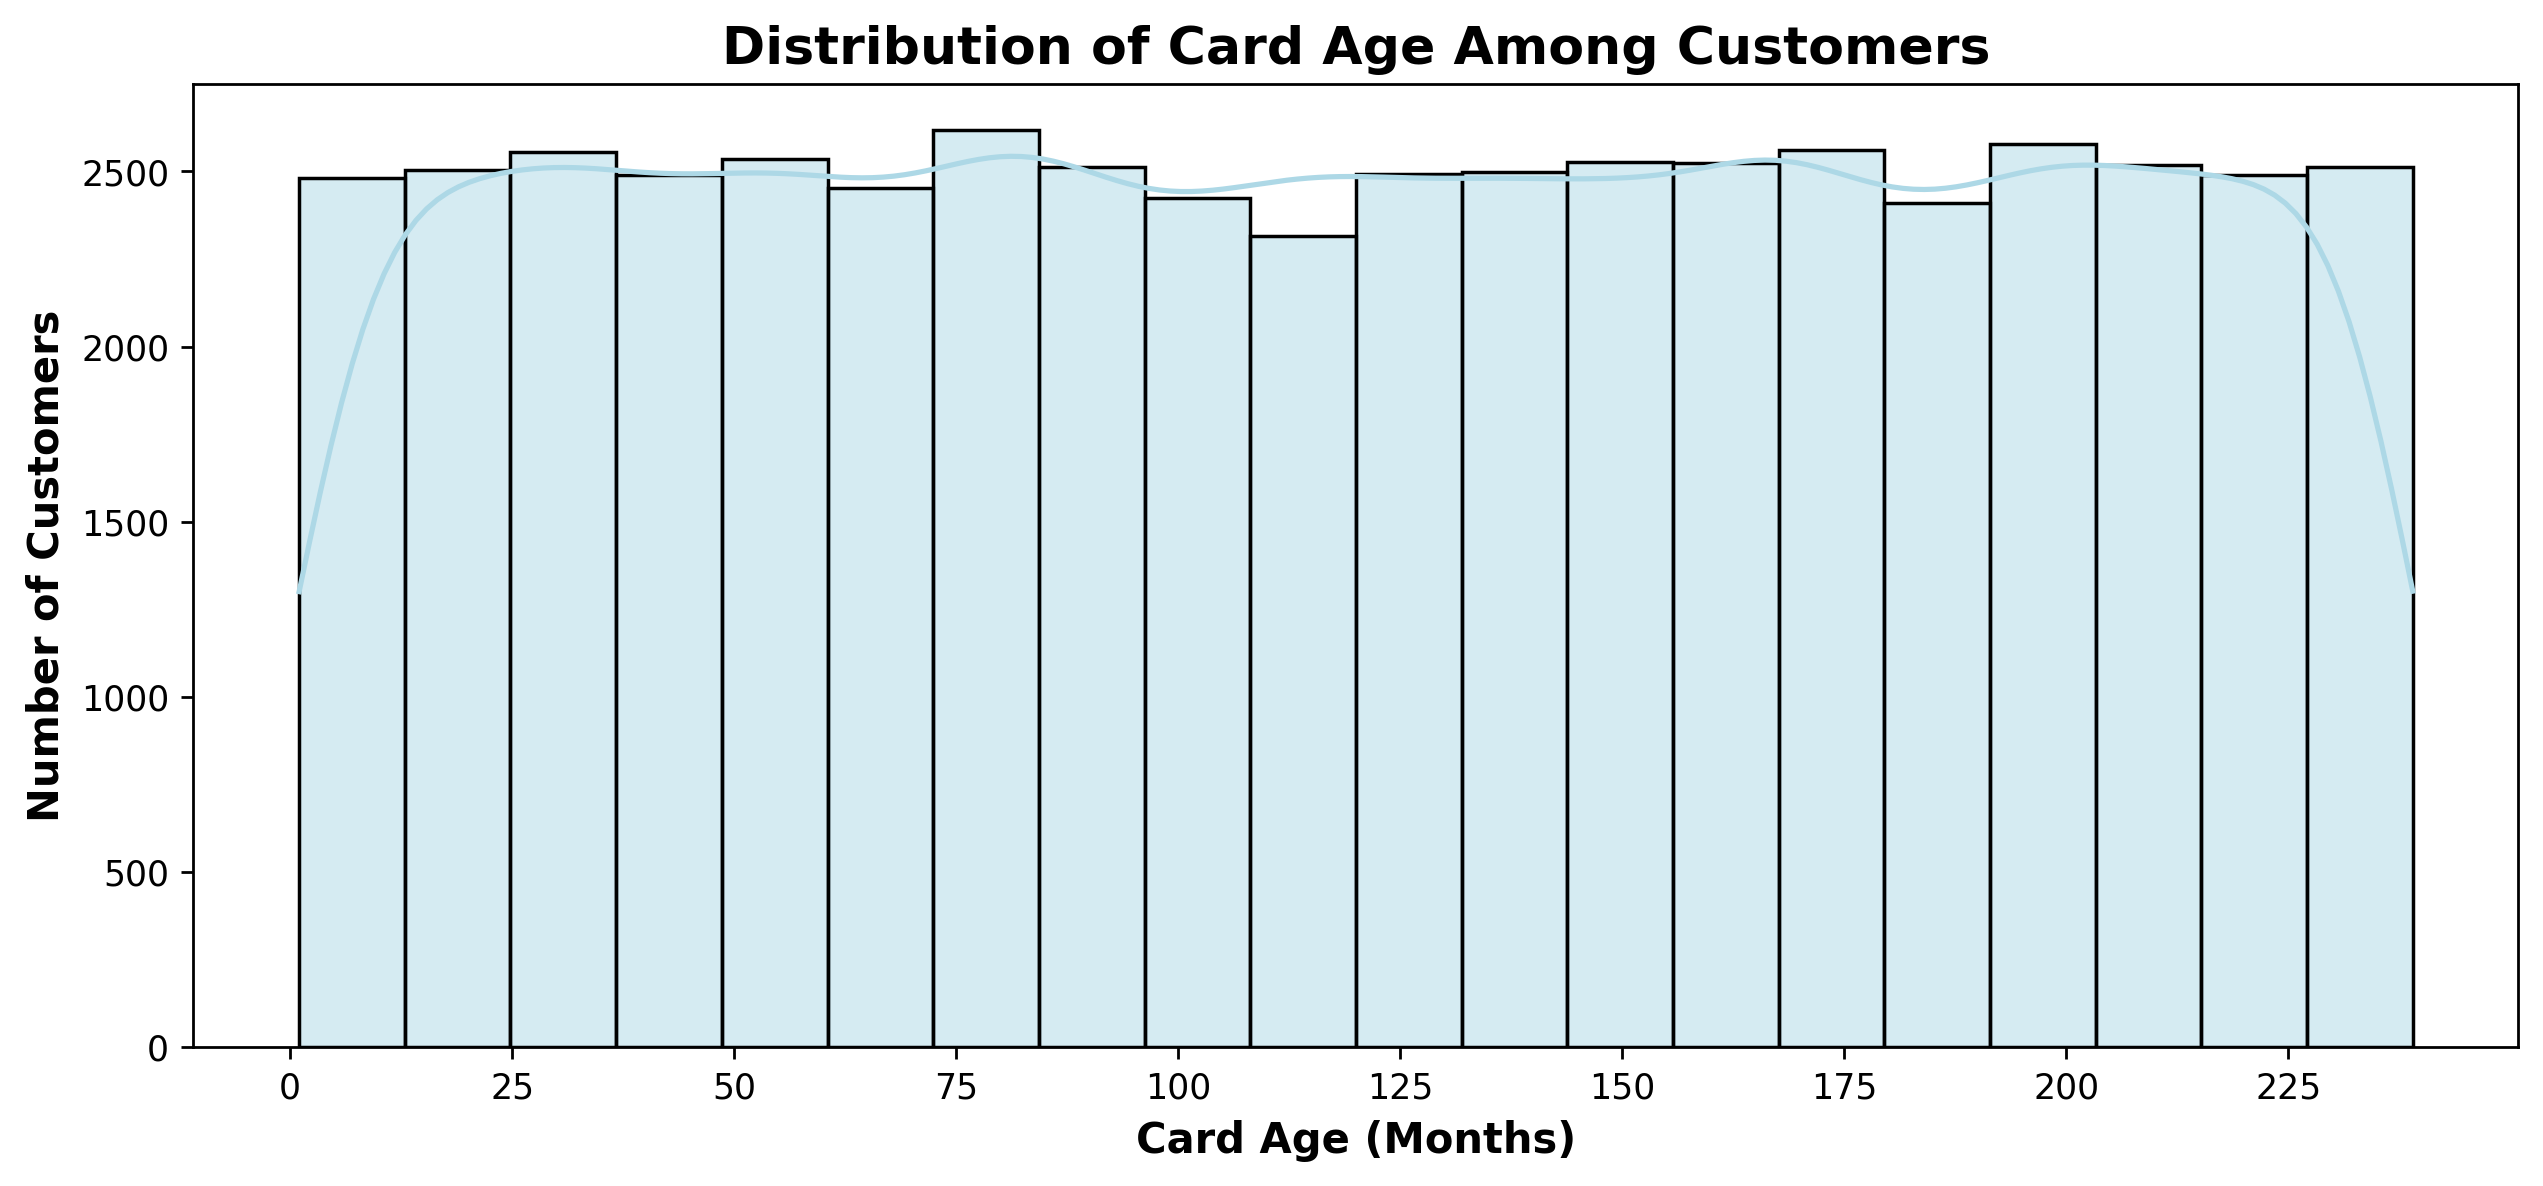

In [144]:
# Check the distribution of card age among customers
sns.histplot(
    data = df,
    x = "card_age_months",
    bins = 20,
    kde = True,
    color = "lightblue"
)

plt.title("Distribution of Card Age Among Customers")
plt.xlabel("Card Age (Months)")
plt.ylabel("Number of Customers")

min_value = int(df['card_age_months'].min())
max_value = int(df['card_age_months'].max())
plt.xticks(range(0, max_value, 25));

([<matplotlib.axis.XTick at 0x188ea41f110>,
 [Text(0, 0, '0'),
  Text(500, 0, '500'),
  Text(1000, 0, '1000'),
  Text(1500, 0, '1500'),
  Text(2000, 0, '2000'),
  Text(2500, 0, '2500'),
  Text(3000, 0, '3000'),
  Text(3500, 0, '3500'),
  Text(4000, 0, '4000'),
  Text(4500, 0, '4500')])

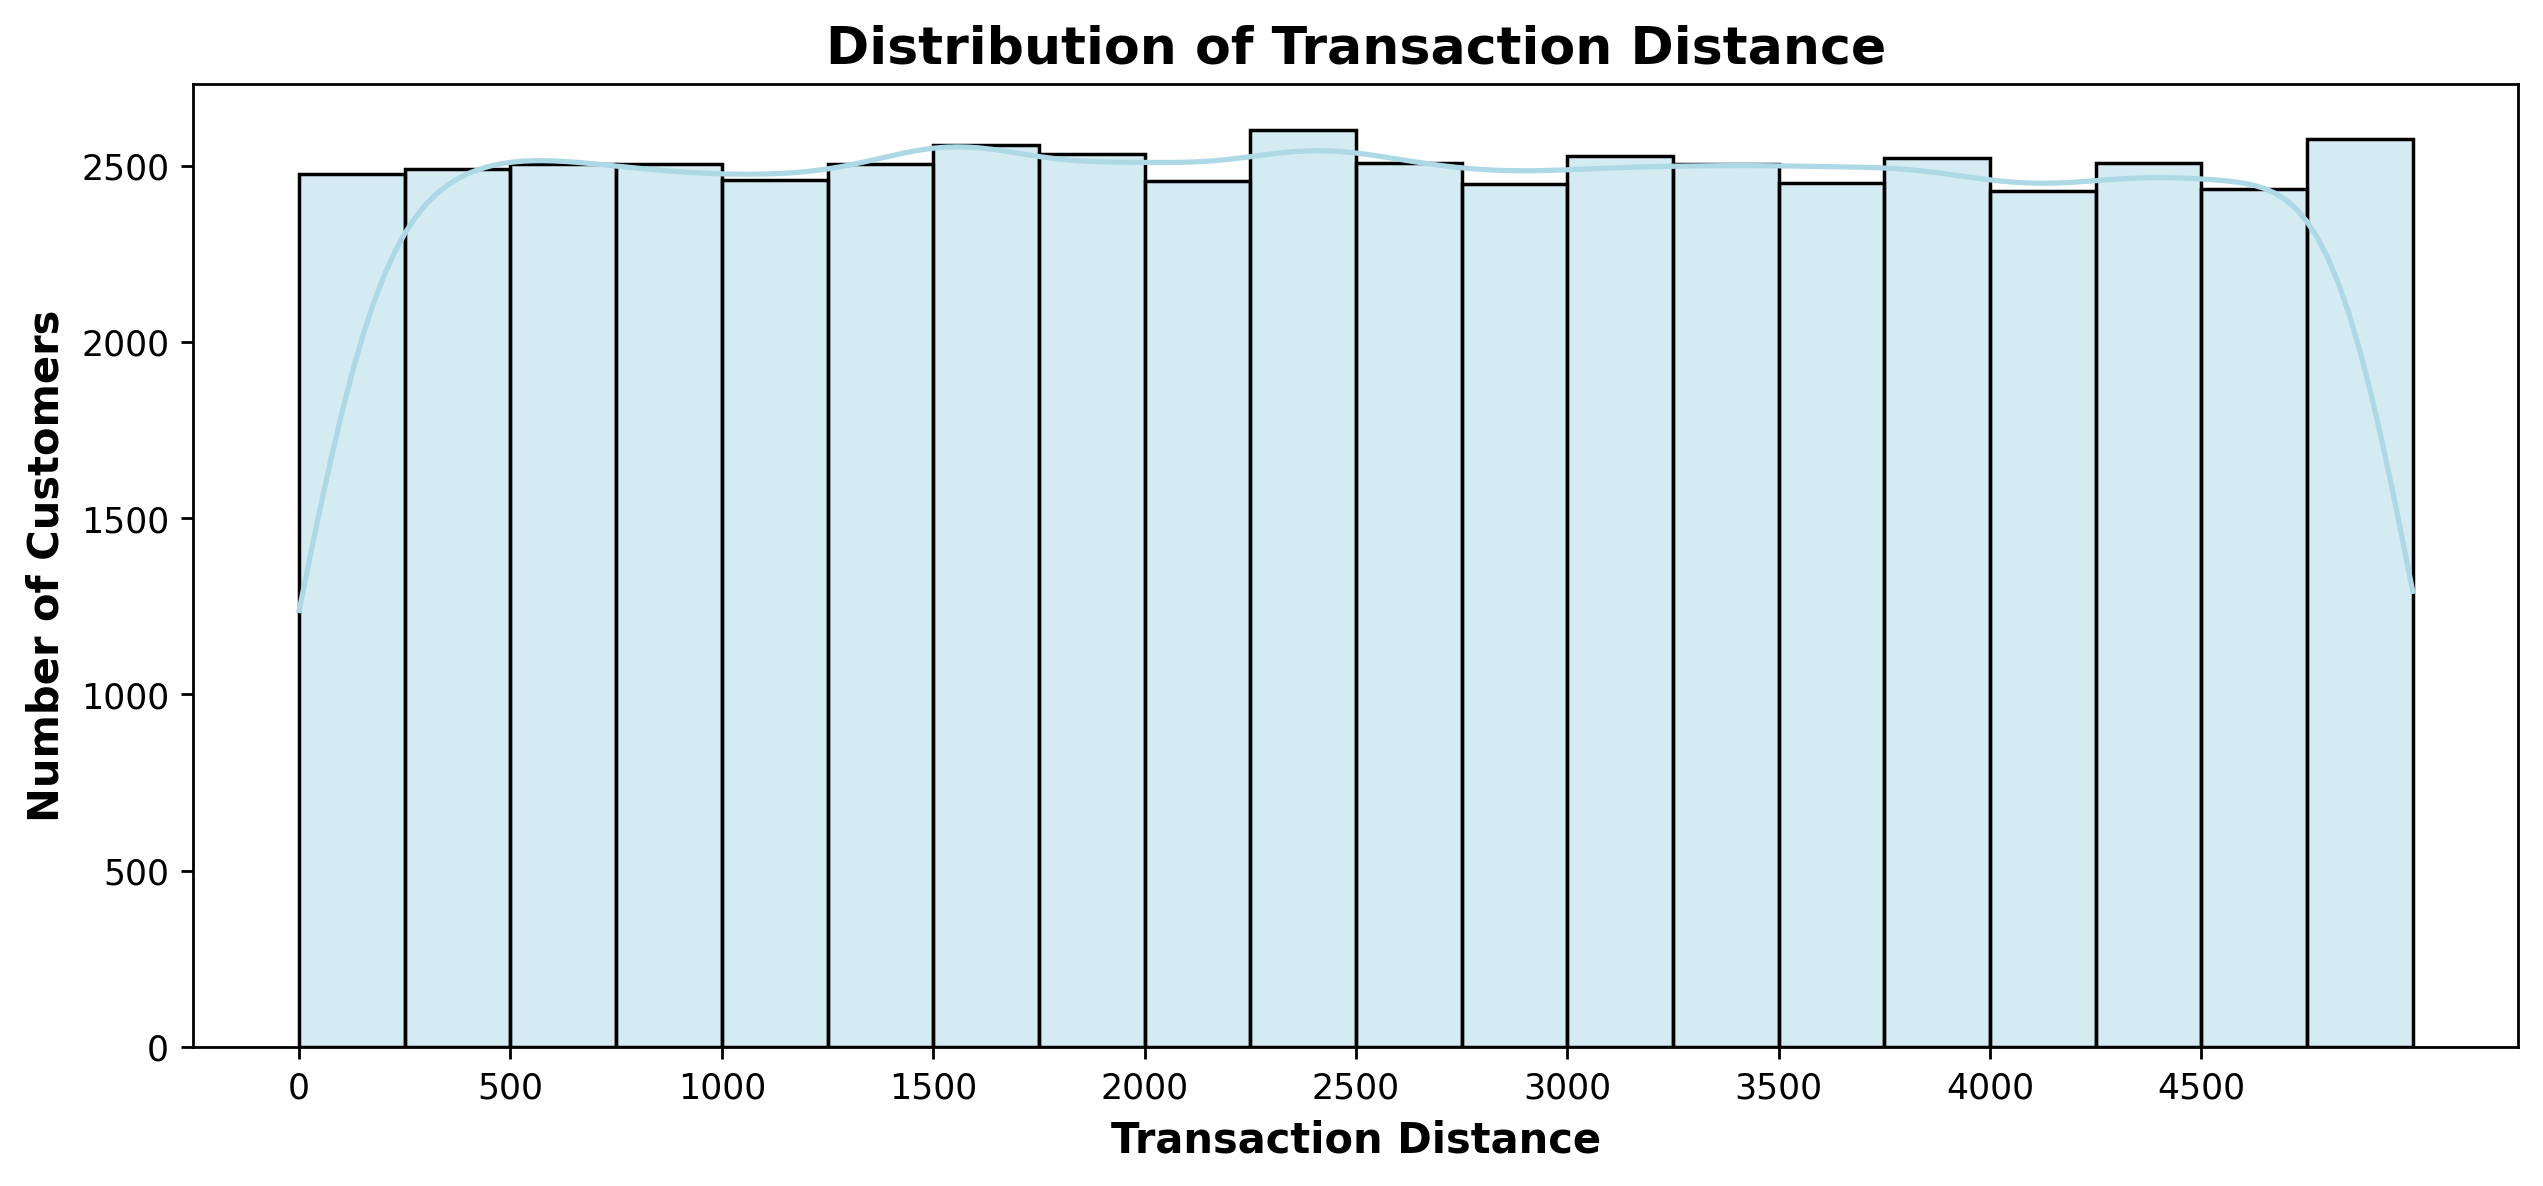

In [145]:
# Check the distribution of transaction distance
sns.histplot(
    data = df,
    x = "transaction_distance",
    bins = 20,
    kde = True,
    color = "lightblue"
)

plt.title("Distribution of Transaction Distance")
plt.xlabel("Transaction Distance")
plt.ylabel("Number of Customers")

min_value = int(df['transaction_distance'].min())
max_value = int(df['transaction_distance'].max())
plt.xticks(range(min_value, max_value, 500))

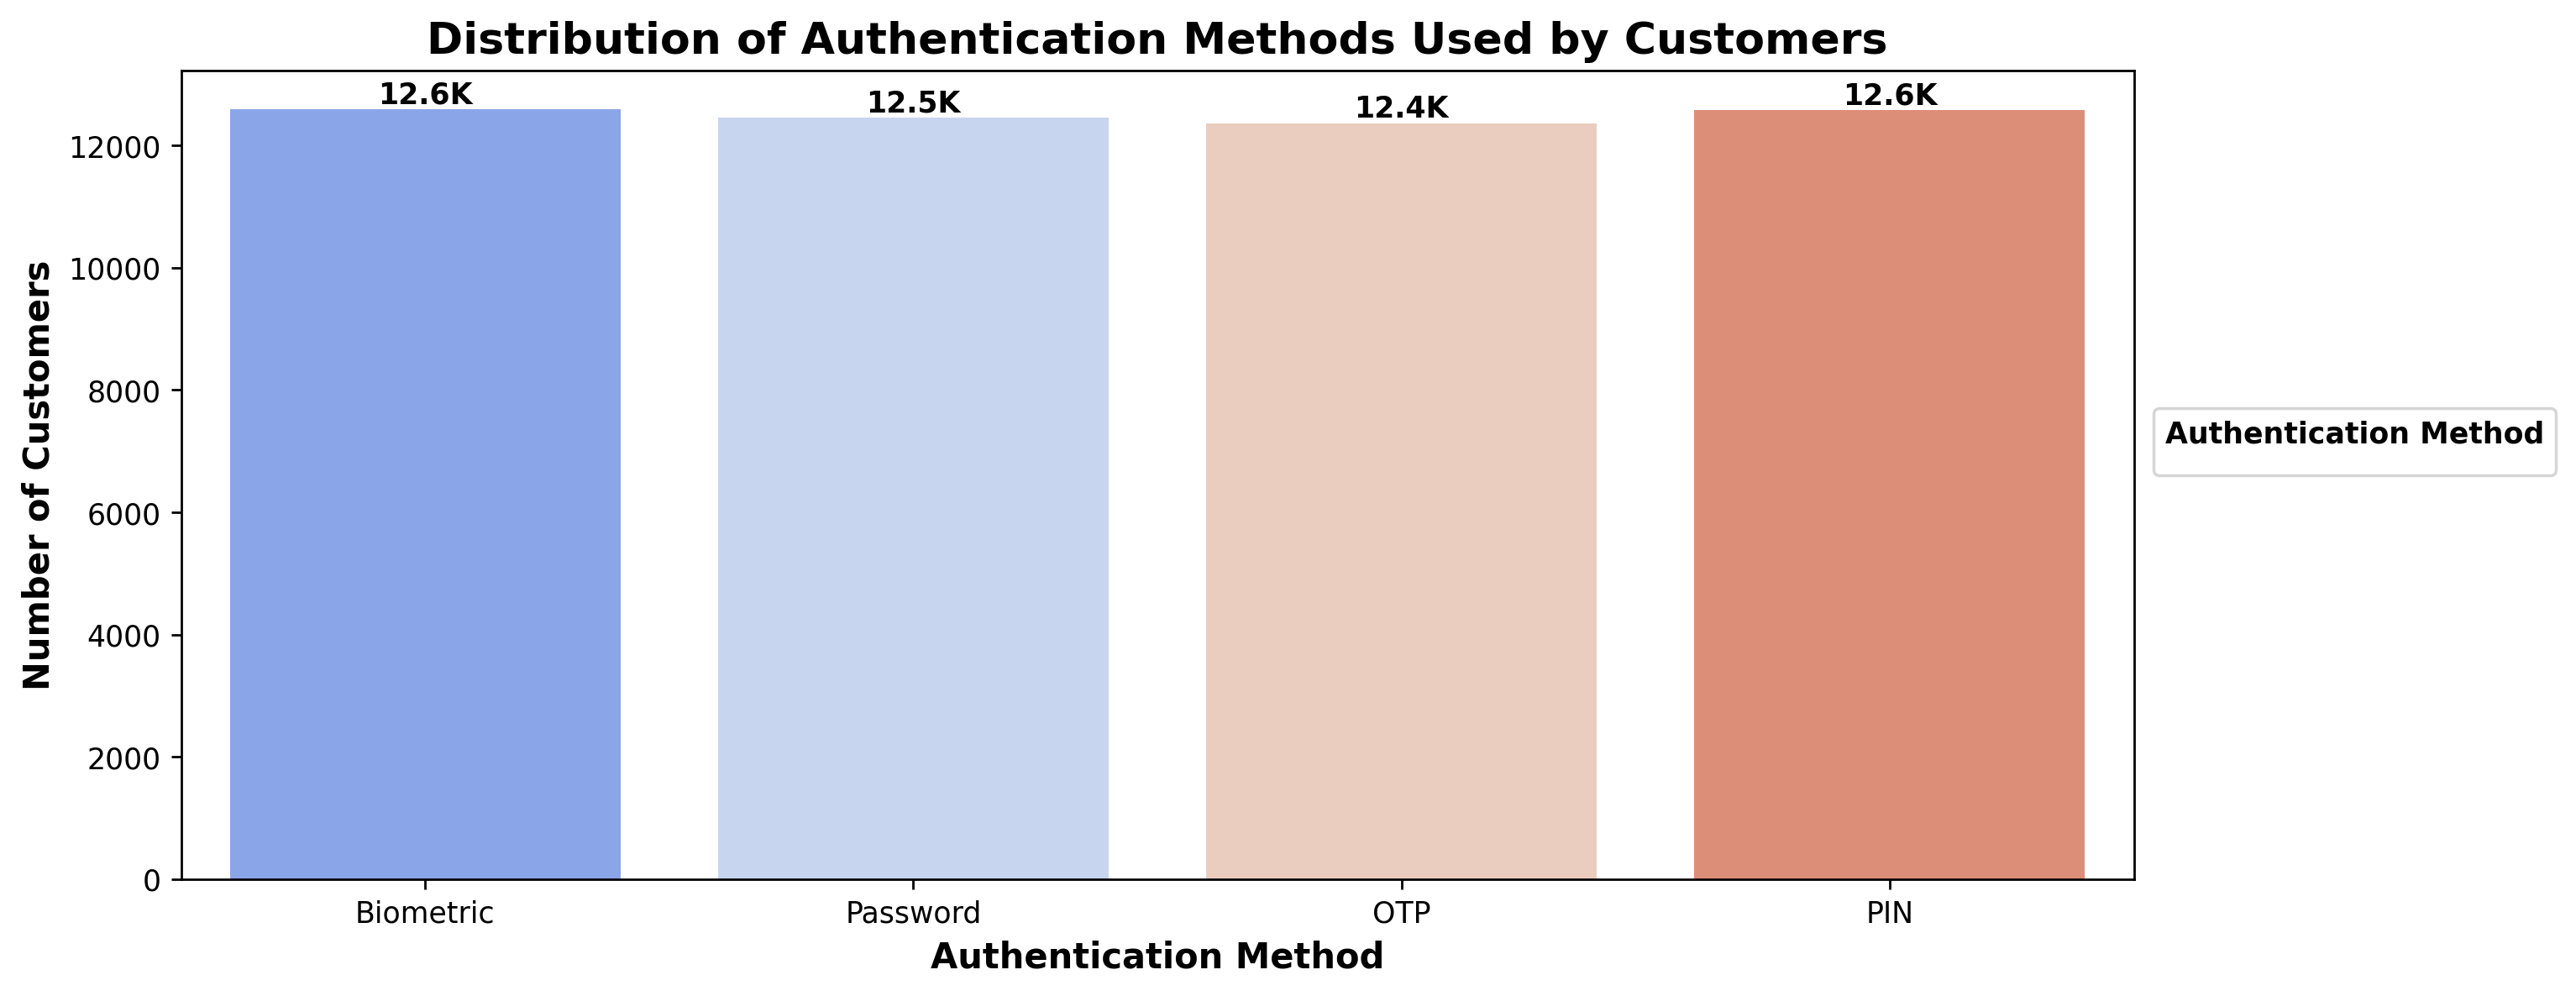

In [146]:
# Check the distribution of authentication methods used by customers for money transfers
ax = sns.countplot(
    data = df,
    x = "authentication_method",
    hue = "authentication_method",
    palette = 'coolwarm',
    dodge = False
)

annotate_bars(ax)

plt.title("Distribution of Authentication Methods Used by Customers")
plt.xlabel("Authentication Method")
plt.ylabel("Number of Customers")

plt.legend(title = "Authentication Method", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5))

Text(0, 0.5, 'Number of Customers')

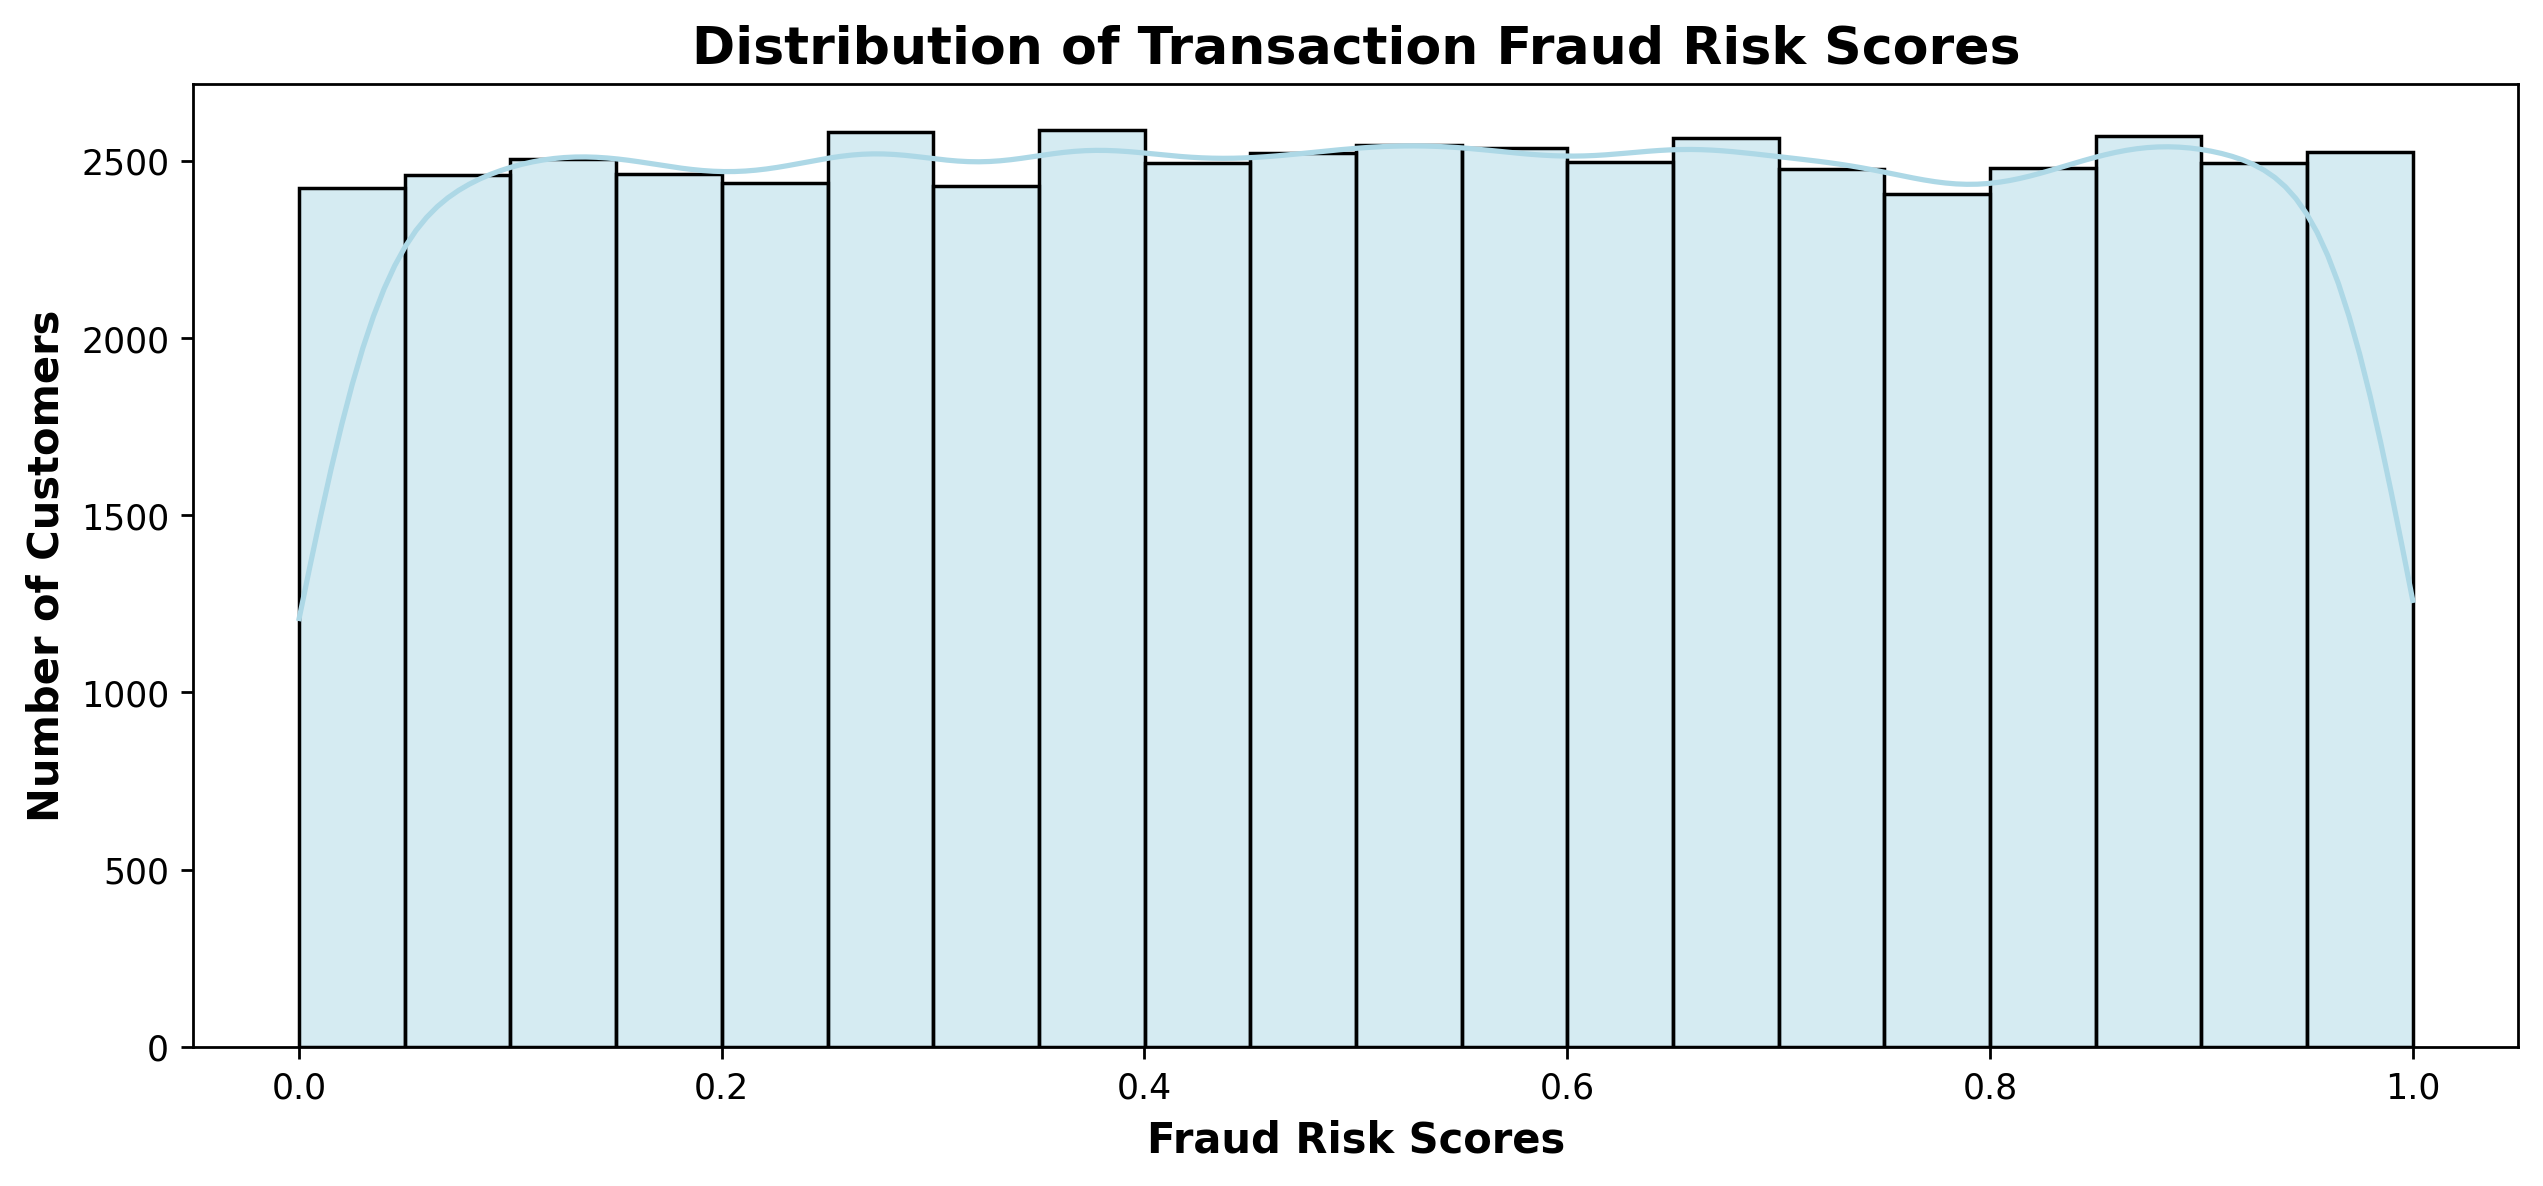

In [147]:
# Check the distribution of transaction fraud risk scores
sns.histplot(
    data = df,
    x = "fraud_risk_score",
    bins = 20,
    kde = True,
    color = "lightblue"
)

plt.title("Distribution of Transaction Fraud Risk Scores")
plt.xlabel("Fraud Risk Scores")
plt.ylabel("Number of Customers")

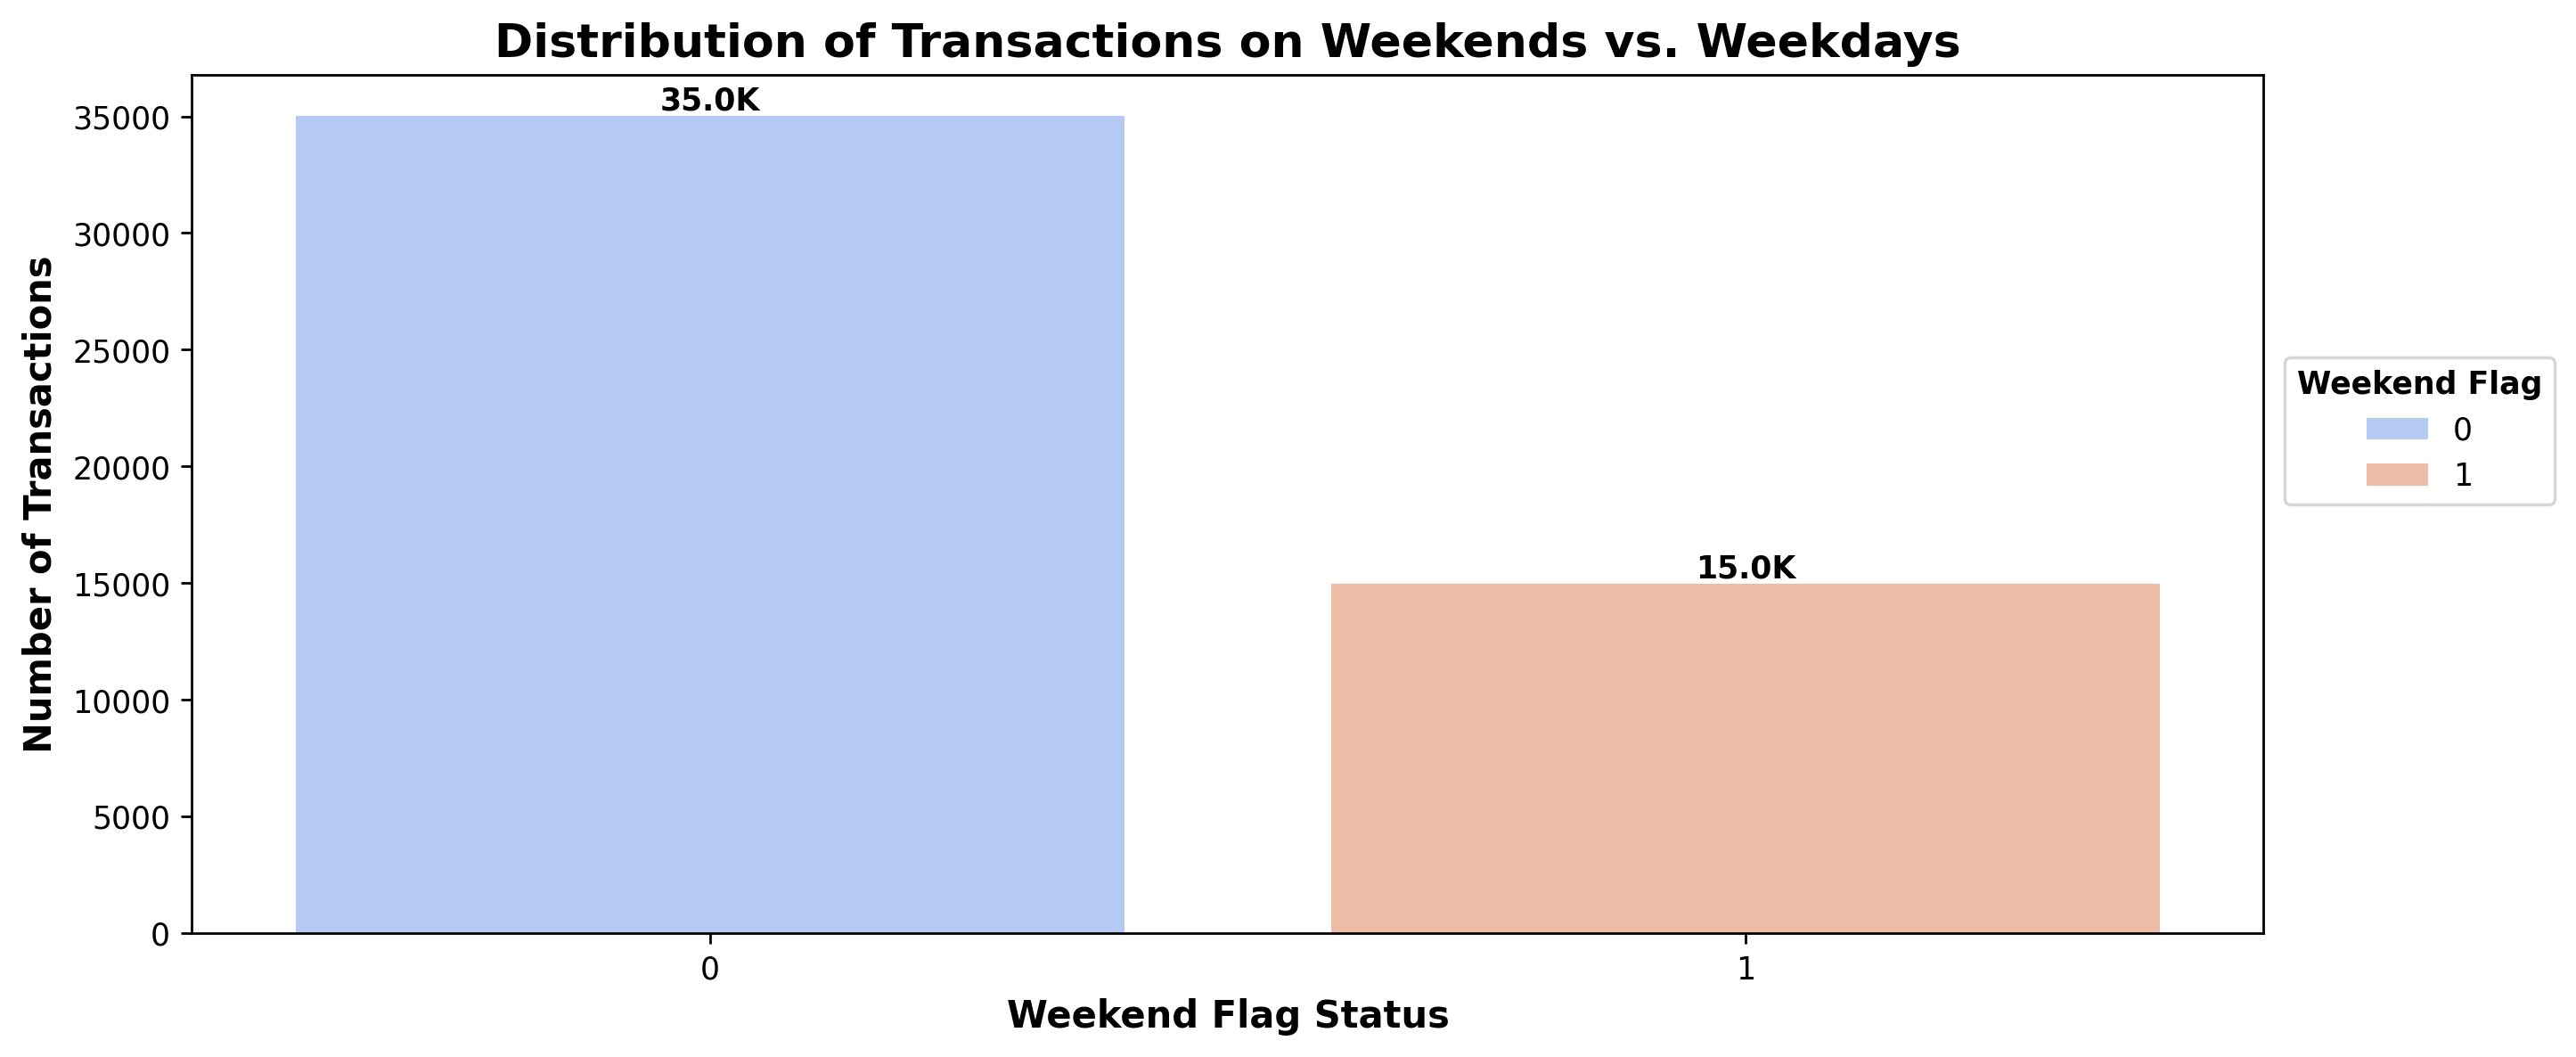

In [148]:
# Check the number of transactions made on weekends compared to weekdays
ax = sns.countplot(
    data = df,
    x = "is_weekend",
    hue = "is_weekend",
    palette = 'coolwarm',
    dodge = False
)

annotate_bars(ax)

plt.title("Distribution of Transactions on Weekends vs. Weekdays")
plt.xlabel("Weekend Flag Status")
plt.ylabel("Number of Transactions")

plt.legend(title = "Weekend Flag", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5))

Given that we have added *specificity* to the transactions, let us proceed to checking the distribution of these transactions made on different days of the week.

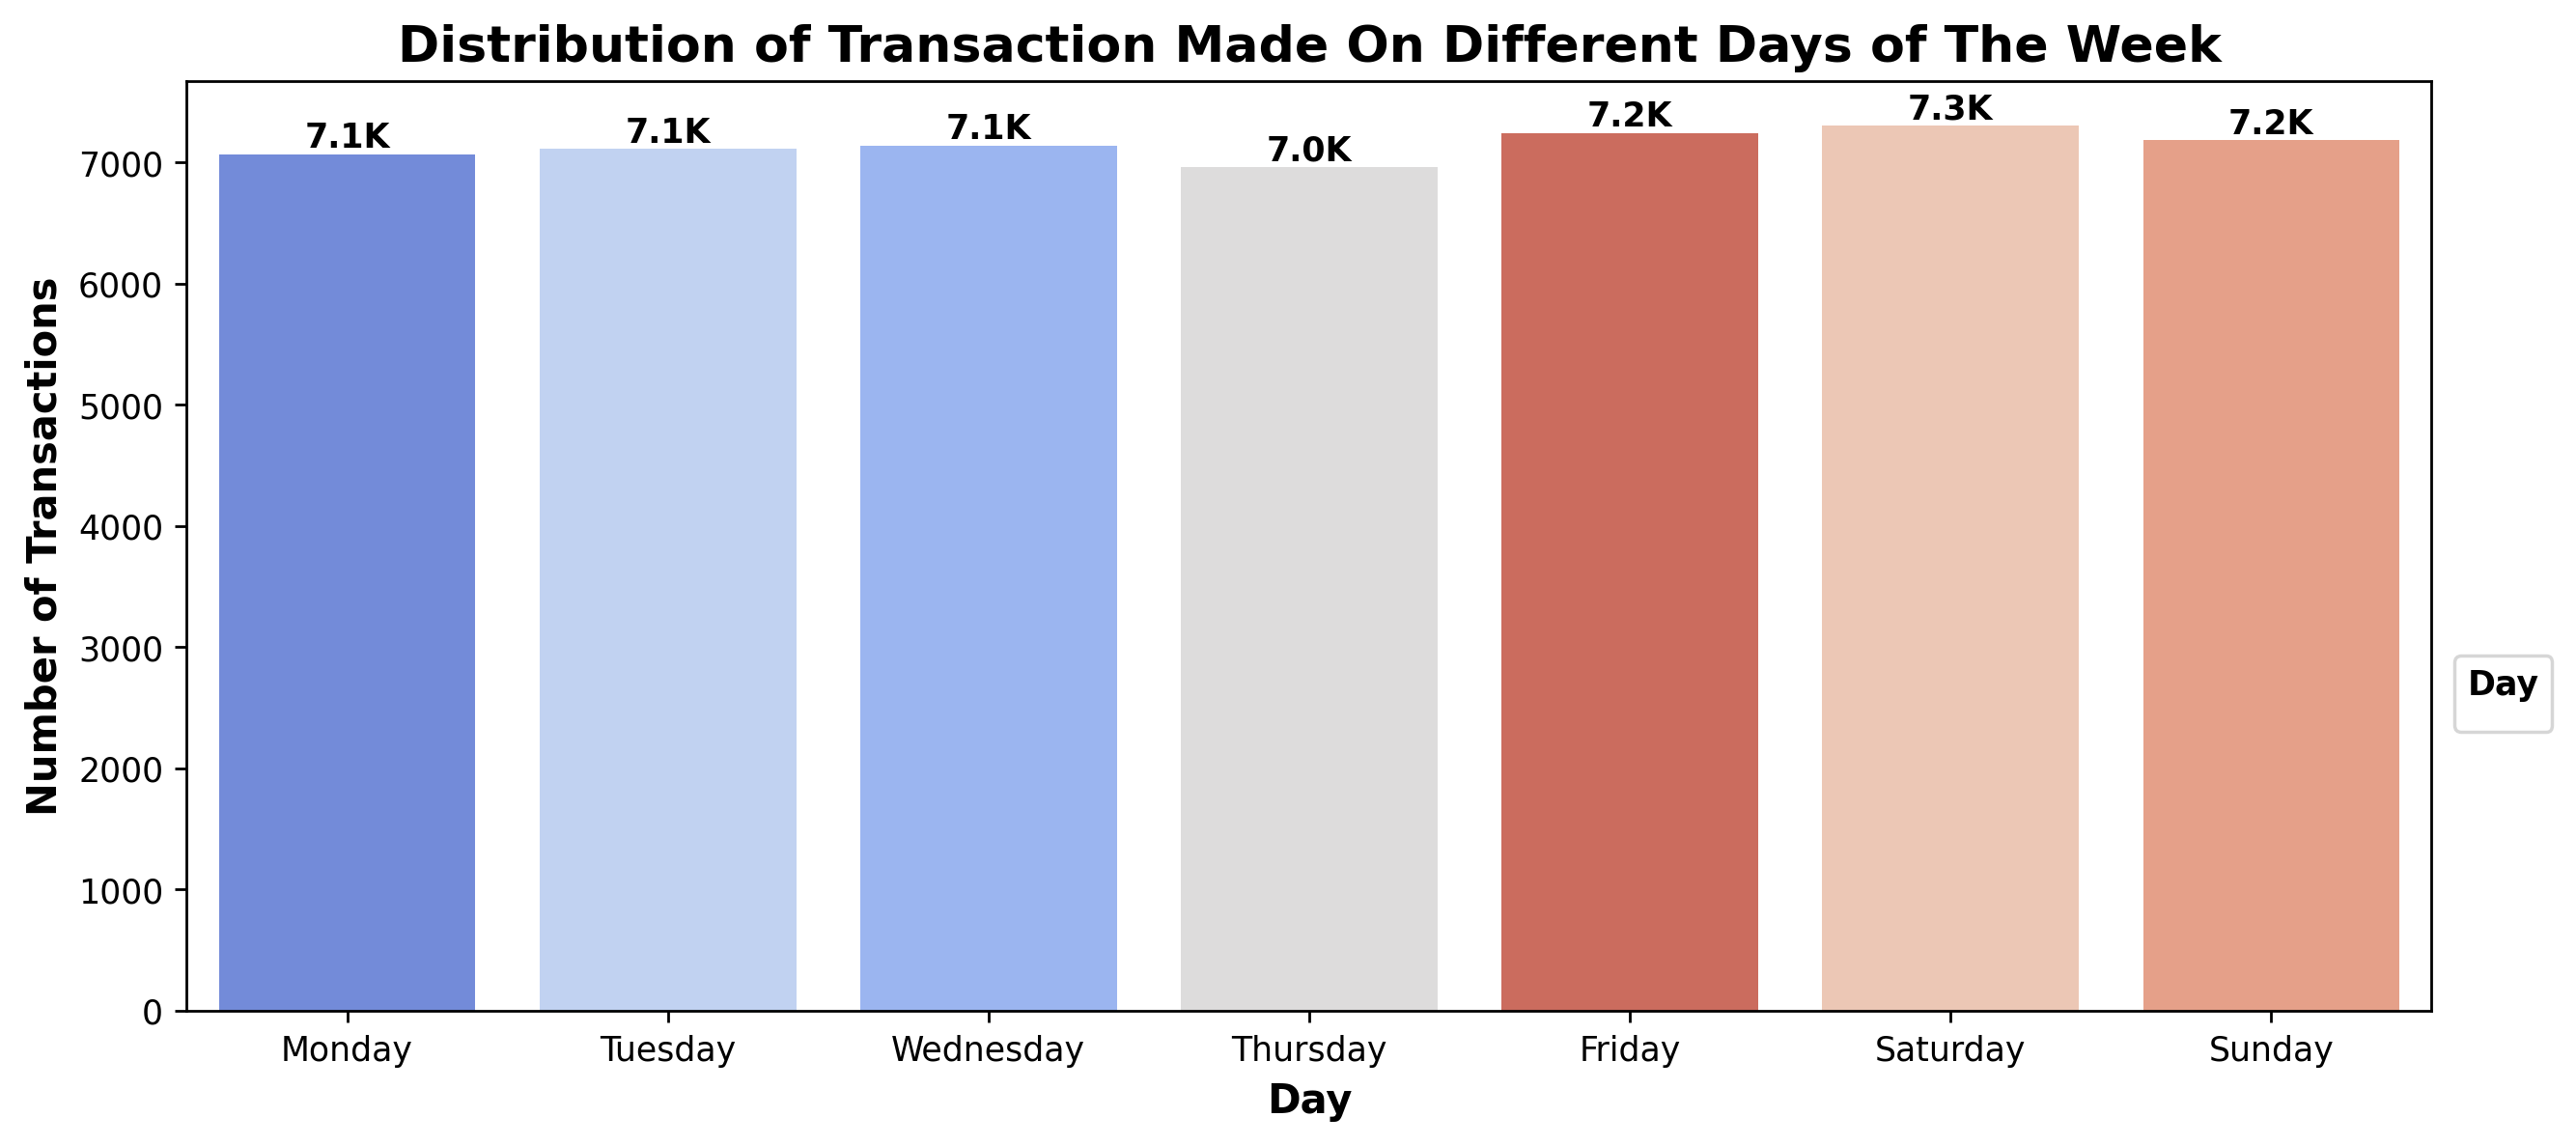

In [149]:
# Check the distribution of transactions made on different days of the week
ax = sns.countplot(
    data = df,
    x = "day_of_week",
    hue = "day_of_week",
    palette = 'coolwarm',
    order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    dodge = False
)

annotate_bars(ax)

plt.title("Distribution of Transaction Made On Different Days of The Week")
plt.xlabel("Day")
plt.ylabel("Number of Transactions")

plt.legend(title = "Day", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.3))

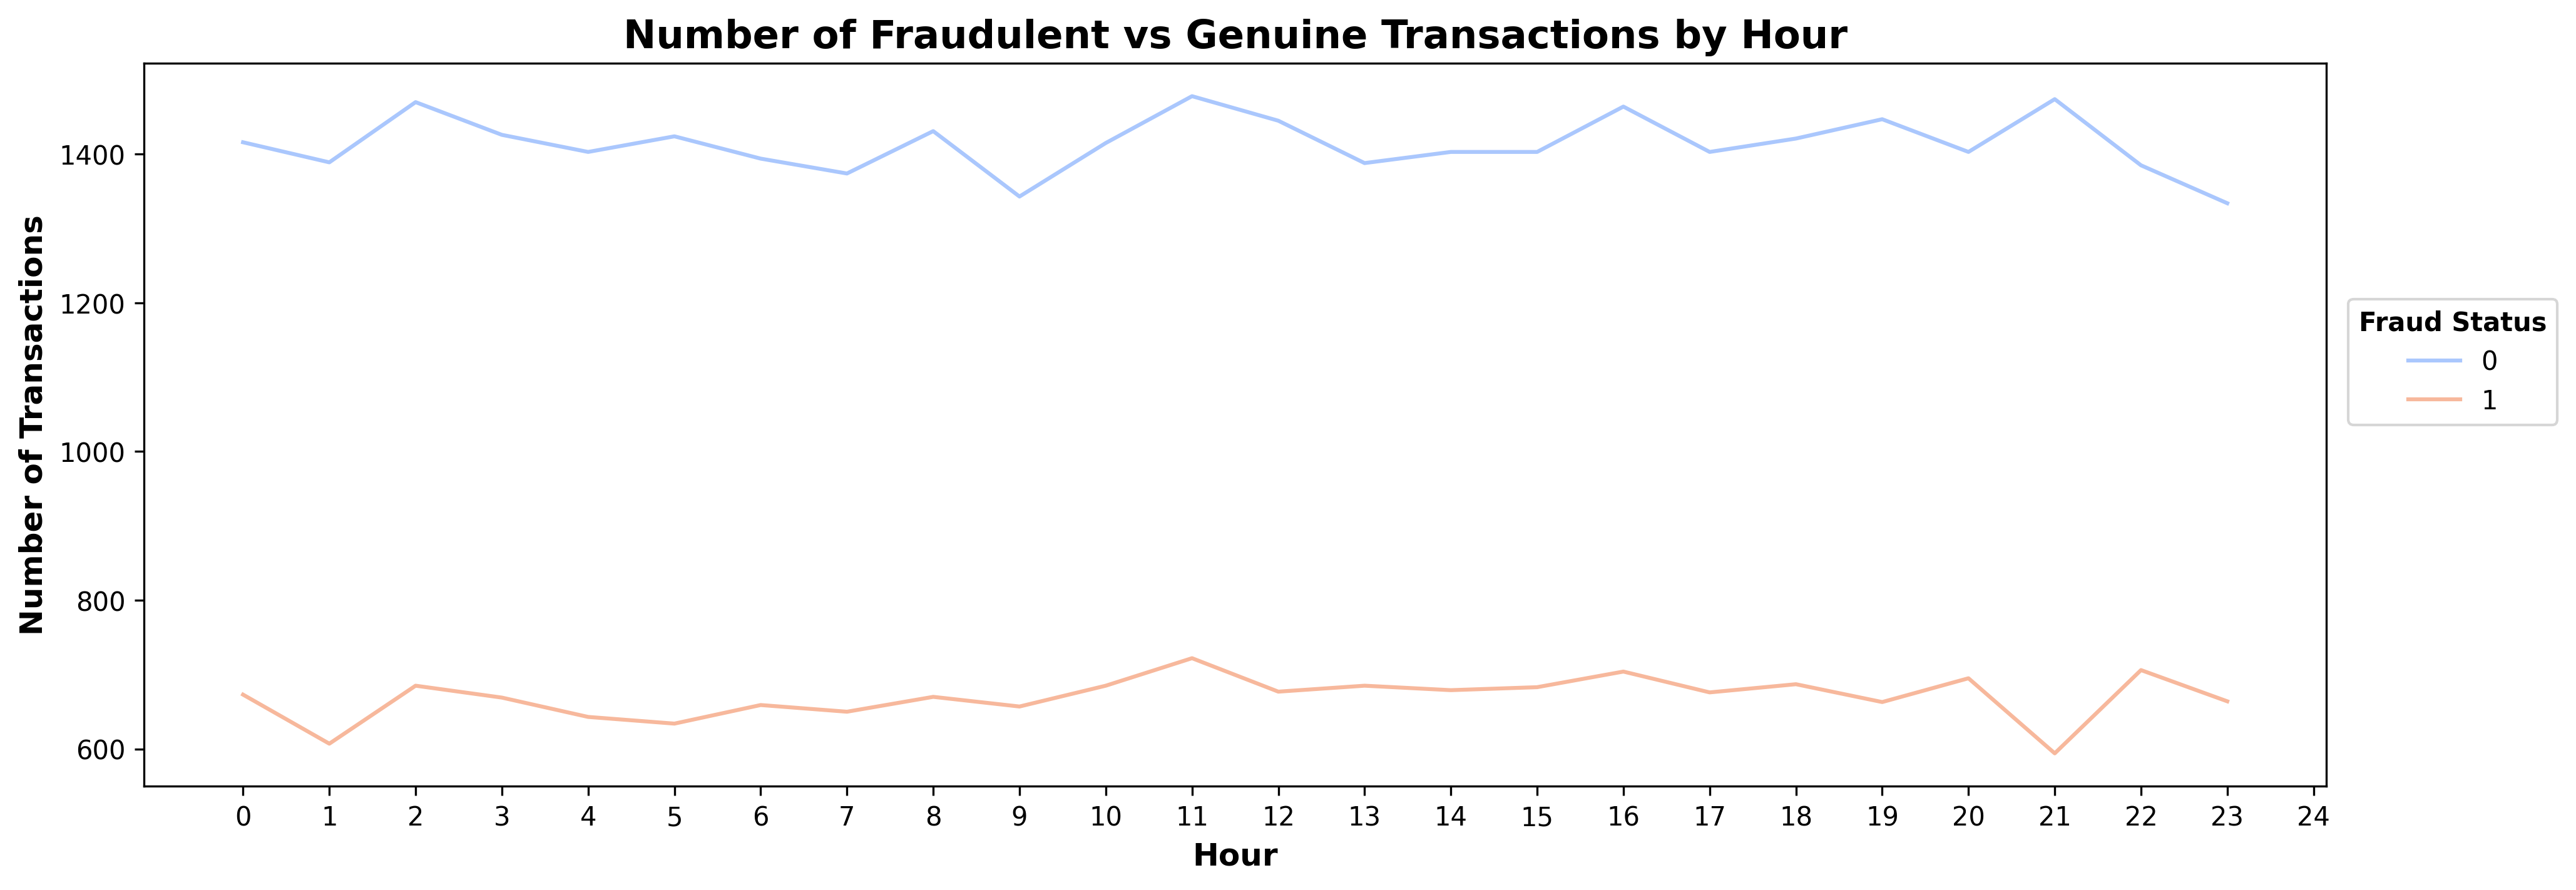

In [150]:
plt.figure(figsize = (15, 5), dpi = 300)

# Check how many fraudulent vs genuine transactions were made each hour
sns.lineplot(
    data = df.groupby(["transaction_hour", "fraud_label"], as_index = False)["transaction_id"].count(),
    x = "transaction_hour",
    y = "transaction_id",
    hue = "fraud_label",
    palette = "coolwarm"
)

plt.title("Number of Fraudulent vs Genuine Transactions by Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Transactions")

plt.xticks(range(0, 25))

plt.legend(title = "Fraud Status", title_fontproperties = {'weight':'bold'}, loc = (1.01, 0.5))

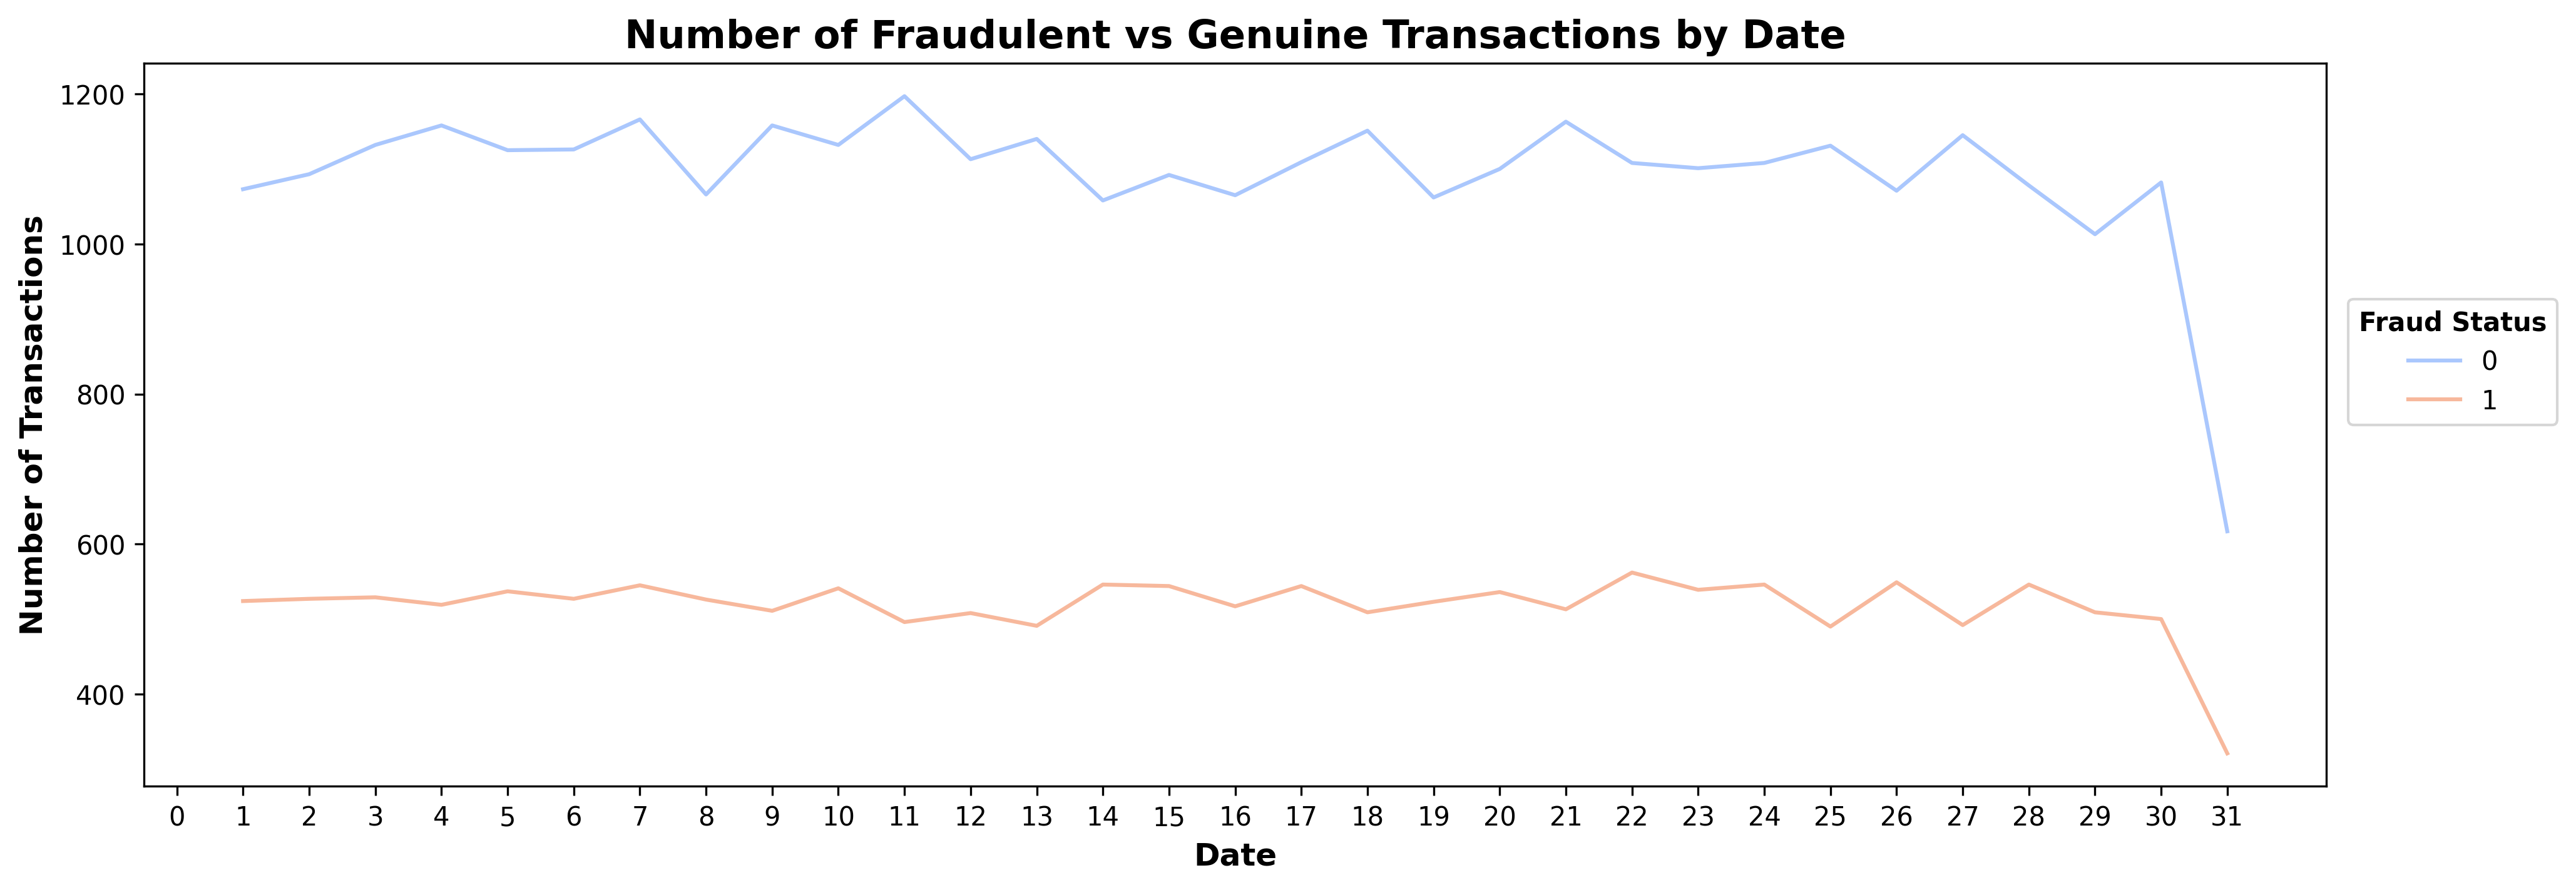

In [151]:
plt.figure(figsize = (15, 5), dpi = 300)

# Check how many fraudulent vs genuine transactions were made each date
sns.lineplot(
    data = df.groupby(["transaction_date", "fraud_label"], as_index = False)["transaction_id"].count(),
    x = "transaction_date",
    y = "transaction_id",
    hue = "fraud_label",
    palette = "coolwarm"
)

plt.title("Number of Fraudulent vs Genuine Transactions by Date")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")

plt.xticks(range(0, 32))

plt.legend(title = "Fraud Status", title_fontproperties = {'weight':'bold'}, loc = (1.01, 0.5))

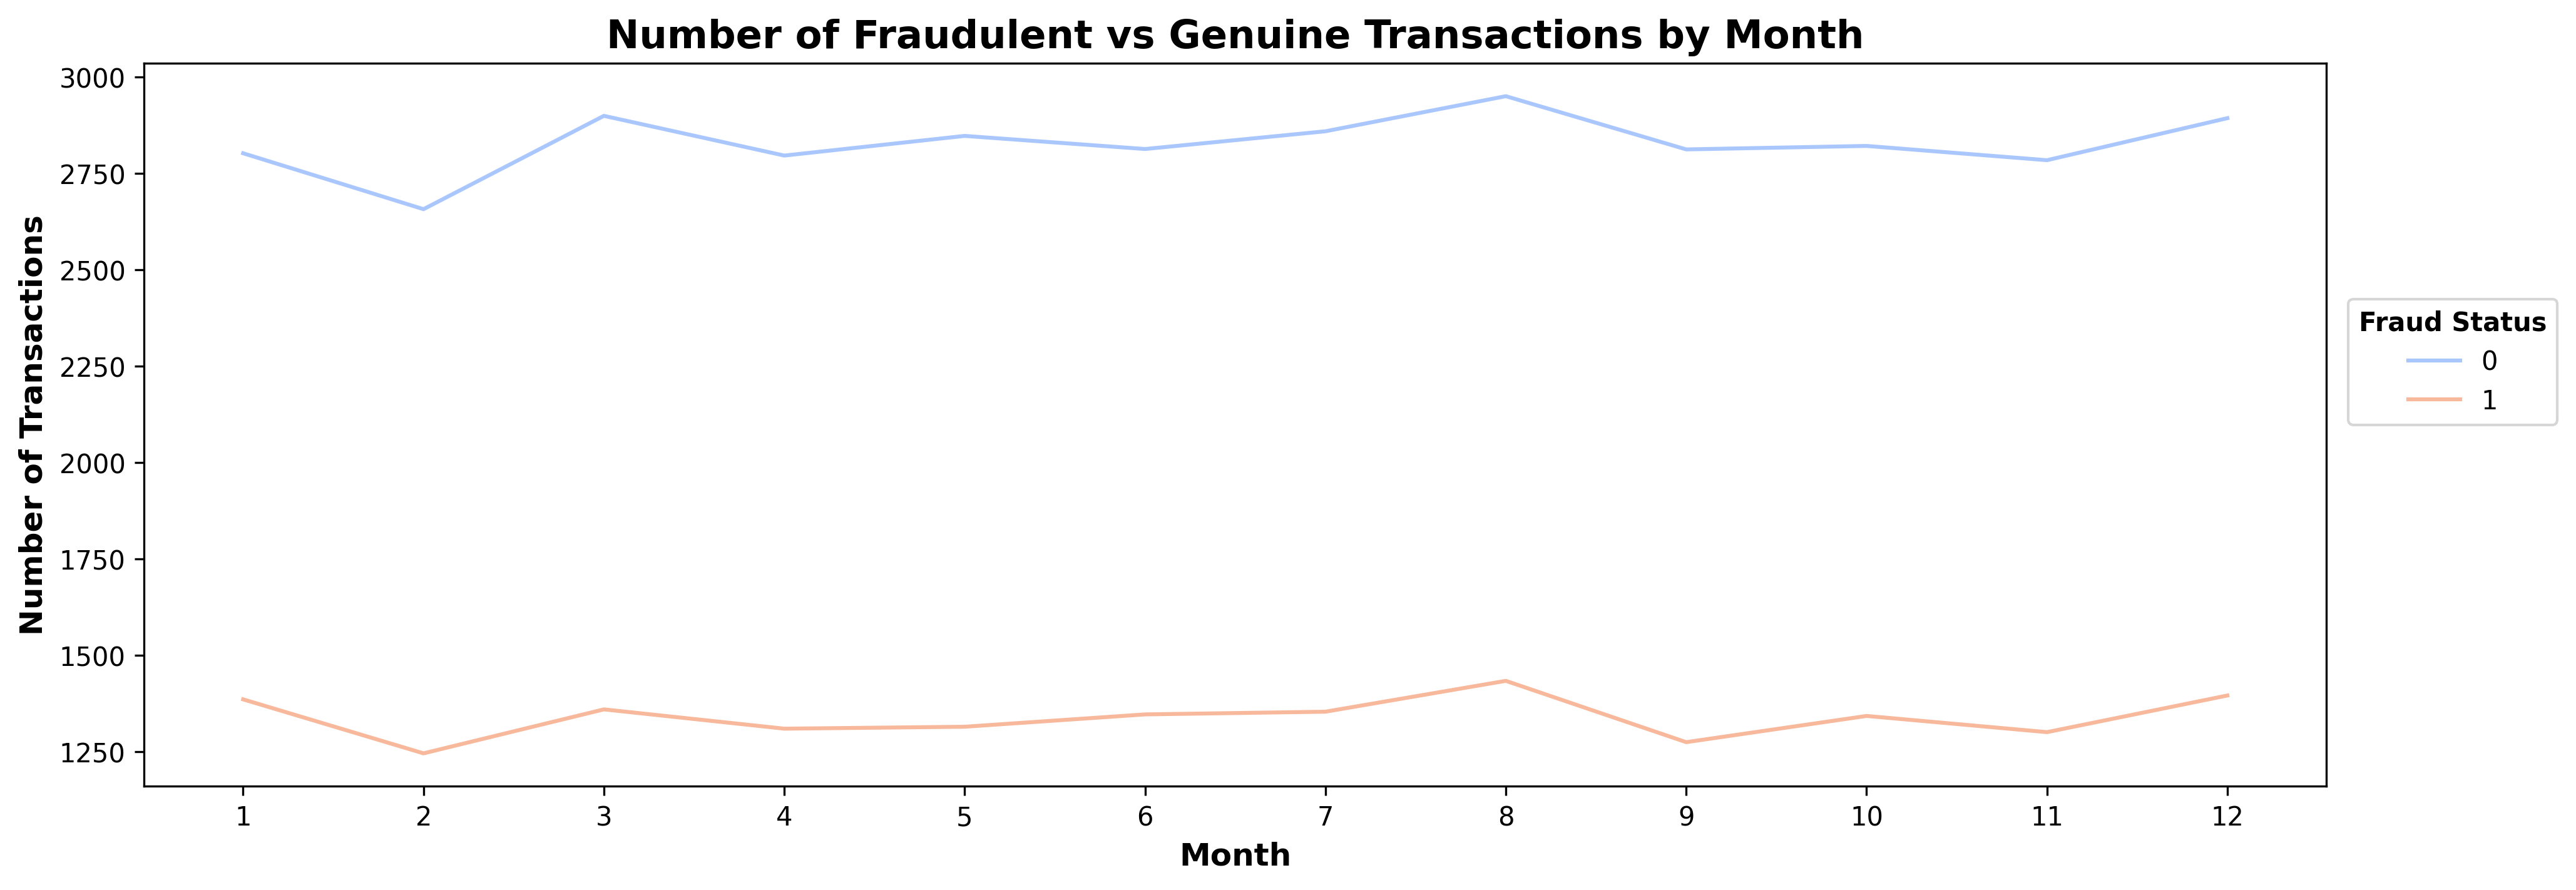

In [152]:
plt.figure(figsize = (15, 5), dpi = 300)

# Check how many fraudulent vs genuine transactions were made each month
sns.lineplot(
    data = df.groupby(["transaction_month", "fraud_label"], as_index = False)["transaction_id"].count(),
    x = "transaction_month",
    y = "transaction_id",
    hue = "fraud_label",
    palette = "coolwarm"
)

plt.title("Number of Fraudulent vs Genuine Transactions by Month")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")

plt.xticks(range(1, 13))

plt.legend(title = "Fraud Status", title_fontproperties = {'weight':'bold'}, loc = (1.01, 0.5))

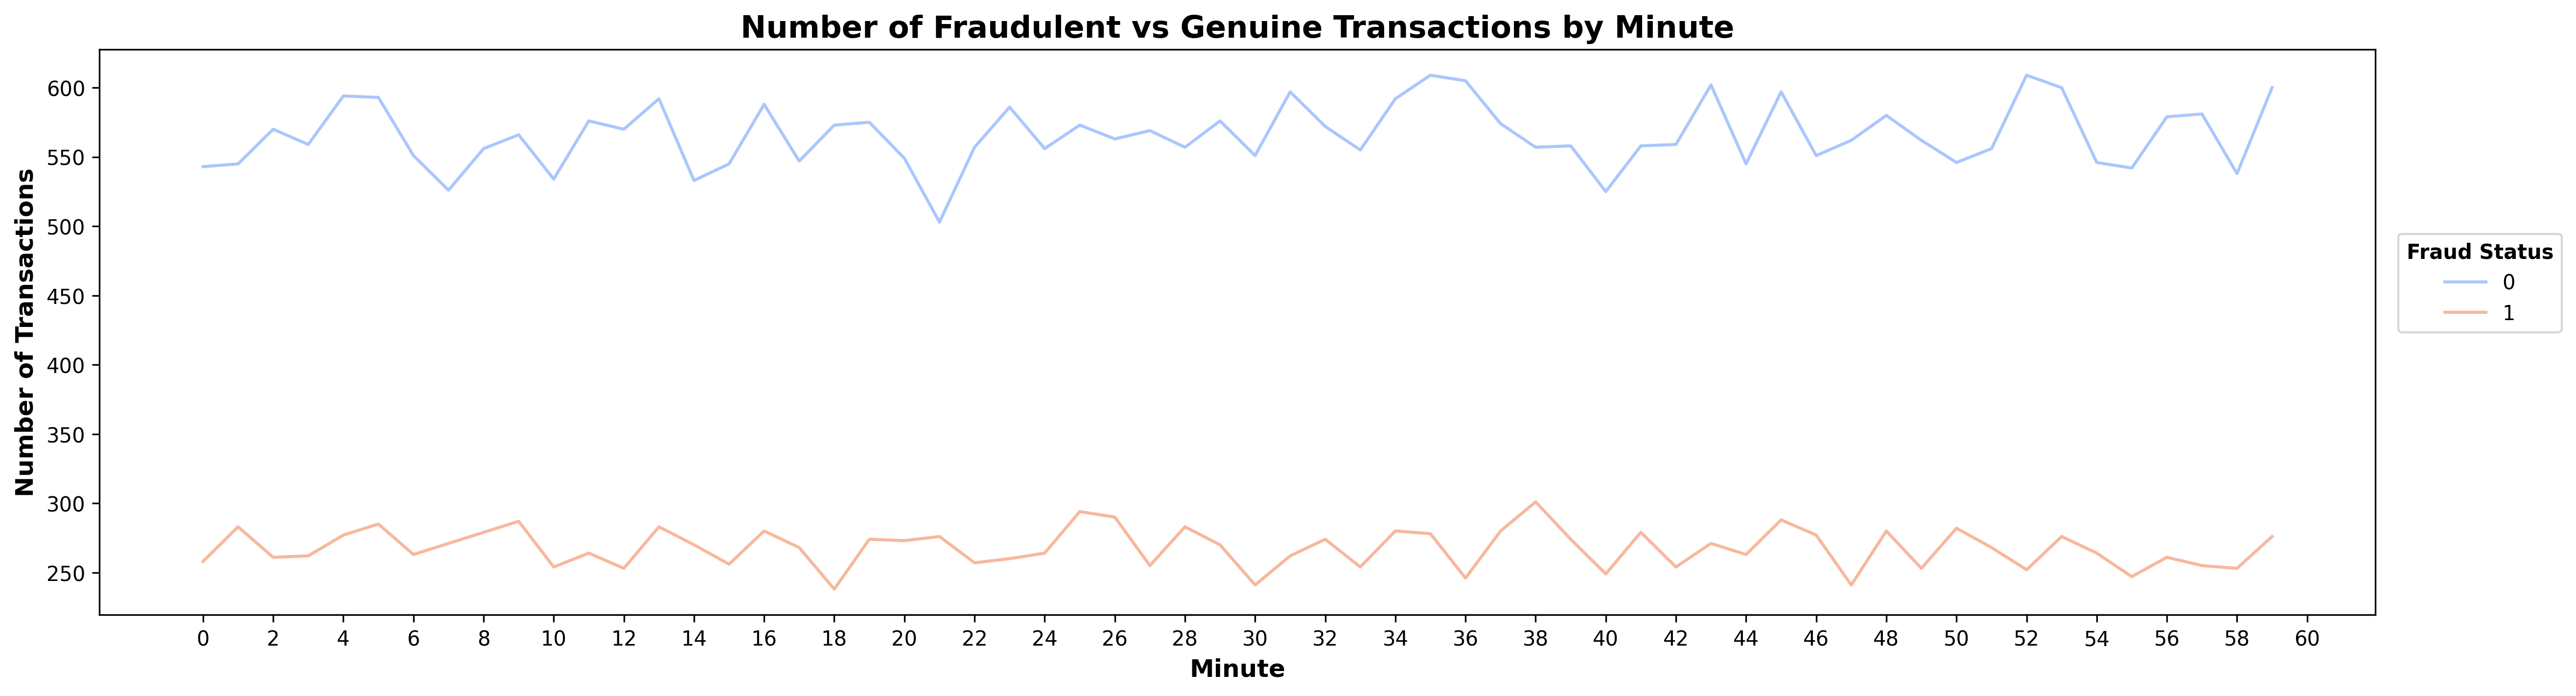

In [153]:
plt.figure(figsize = (20, 5), dpi = 300)

# Check how many transactions were made each min
sns.lineplot(
    data = df.groupby(["transaction_min", "fraud_label"], as_index = False)["transaction_id"].count(),
    x = "transaction_min",
    y = "transaction_id",
    hue = "fraud_label",
    palette = "coolwarm"
)

plt.title("Number of Fraudulent vs Genuine Transactions by Minute")
plt.xlabel("Minute")
plt.ylabel("Number of Transactions")

plt.xticks(range(0, 61, 2))

plt.legend(title = "Fraud Status", title_fontproperties = {'weight':'bold'}, loc = (1.01, 0.5))

Given this, what do we want to do next? Given what have been doing so far, looking at month, hour,date, minute, we want to filter fraud transactions and group them by day of the month.

In [154]:
fraud_df_month = df.groupby("transaction_date", as_index=False)["fraud_label"].agg(
    fraudulent_transaction_count = "sum",
    total_transaction_count = "count"
)

# Calculate the fraud rate
fraud_df_month["fraud_rate"] = fraud_df_month["fraudulent_transaction_count"] / fraud_df_month["total_transaction_count"]
fraud_df_month

transaction_date  fraudulent_transaction_count  total_transaction_count  \
0                  1                           524                     1597   
1                  2                           527                     1620   
2                  3                           529                     1661   
3                  4                           519                     1677   
4                  5                           537                     1662   
5                  6                           527                     1653   
6                  7                           545                     1711   
7                  8                           526                     1592   
8                  9                           511                     1669   
9                 10                           541                     1673   
10                11                           496                     1693   
11                12                           508                     1621   
12                13                           491                     1631   
13                14                           546                     1604   
14                15                           544                     1636   
15                16                           517                     1582   
16                17                           544                     1653   
17                18                           509                     1660   
18                19                           523                     1585   
19                20                           536                     1636   
20                21                           513                     1676   
21                22                           562                     1670   
22                23                           539                     1640   
23                24                           546                     1654   
24                25                           490                     1621   
25                26                           549                     1620   
26                27                           492                     1637   
27                28                           546                     1624   
28                29                           509                     1522   
29                30                           500                     1582   
30                31                           321                      938   

    fraud_rate  
0     0.328115  
1     0.325309  
2     0.318483  
3     0.309481  
4     0.323105  
5     0.318814  
6     0.318527  
7     0.330402  
8     0.306171  
9     0.323371  
10    0.292971  
11    0.313387  
12    0.301042  
13    0.340399  
14    0.332518  
15    0.326802  
16    0.329099  
17    0.306627  
18    0.329968  
19    0.327628  
20    0.306086  
21    0.336527  
22    0.328659  
23    0.330109  
24    0.302283  
25    0.338889  
26    0.300550  
27    0.336207  
28    0.334428  
29    0.316056  
30    0.342217

([<matplotlib.axis.XTick at 0x18919848550>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31')])

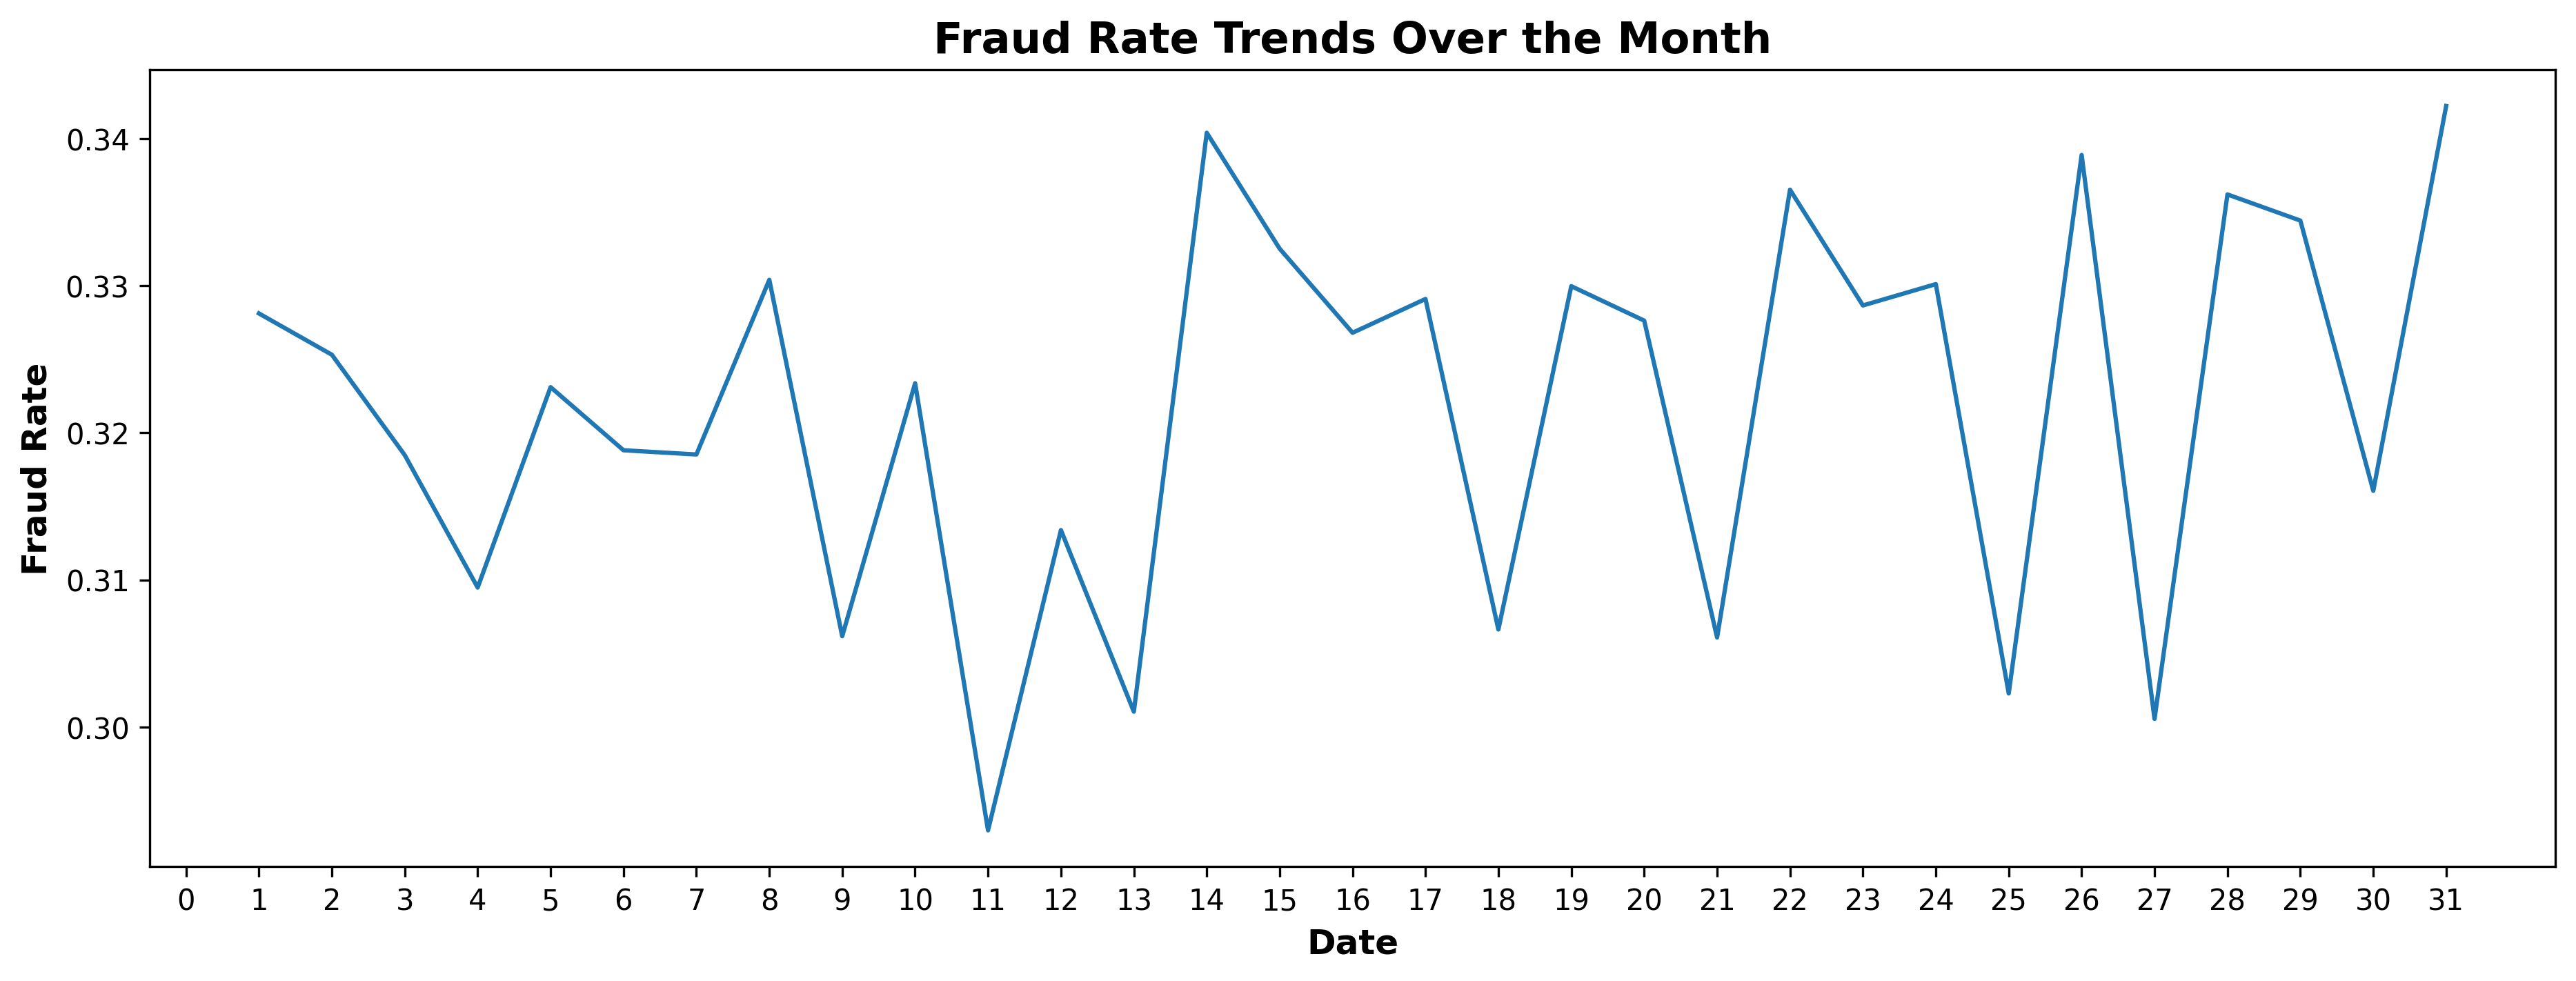

In [155]:
plt.figure(figsize = (15, 5), dpi = 300)

# Check how the fraud rate changes throughout the month
sns.lineplot(
    data = fraud_df_month,
    x = "transaction_date",
    y = "fraud_rate",
)

plt.title("Fraud Rate Trends Over the Month")
plt.xlabel("Date")
plt.ylabel("Fraud Rate")

plt.xticks(range(0, 32))

In [156]:
# Filtering out the fradulent transactions and groupping them by hour of the day
fraud_df_hour = df.groupby("transaction_hour", as_index=False)["fraud_label"].agg(
    fraudulent_transaction_count = "sum",
    total_transaction_count = "count"
)

# Calculate the fraud rate
fraud_df_hour["fraud_rate"] = fraud_df_hour["fraudulent_transaction_count"] / fraud_df_hour["total_transaction_count"]
fraud_df_hour

transaction_hour  fraudulent_transaction_count  total_transaction_count  \
0                  0                           673                     2089   
1                  1                           607                     1996   
2                  2                           685                     2155   
3                  3                           669                     2095   
4                  4                           643                     2046   
5                  5                           634                     2058   
6                  6                           659                     2053   
7                  7                           650                     2024   
8                  8                           670                     2101   
9                  9                           657                     2000   
10                10                           685                     2100   
11                11                           722                     2200   
12                12                           677                     2122   
13                13                           685                     2073   
14                14                           679                     2082   
15                15                           683                     2086   
16                16                           704                     2168   
17                17                           676                     2079   
18                18                           687                     2108   
19                19                           663                     2110   
20                20                           695                     2098   
21                21                           594                     2068   
22                22                           706                     2091   
23                23                           664                     1998   

    fraud_rate  
0     0.322164  
1     0.304108  
2     0.317865  
3     0.319332  
4     0.314272  
5     0.308066  
6     0.320994  
7     0.321146  
8     0.318896  
9     0.328500  
10    0.326190  
11    0.328182  
12    0.319039  
13    0.330439  
14    0.326129  
15    0.327421  
16    0.324723  
17    0.325156  
18    0.325901  
19    0.314218  
20    0.331268  
21    0.287234  
22    0.337637  
23    0.332332

([<matplotlib.axis.XTick at 0x1891d5611d0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24')])

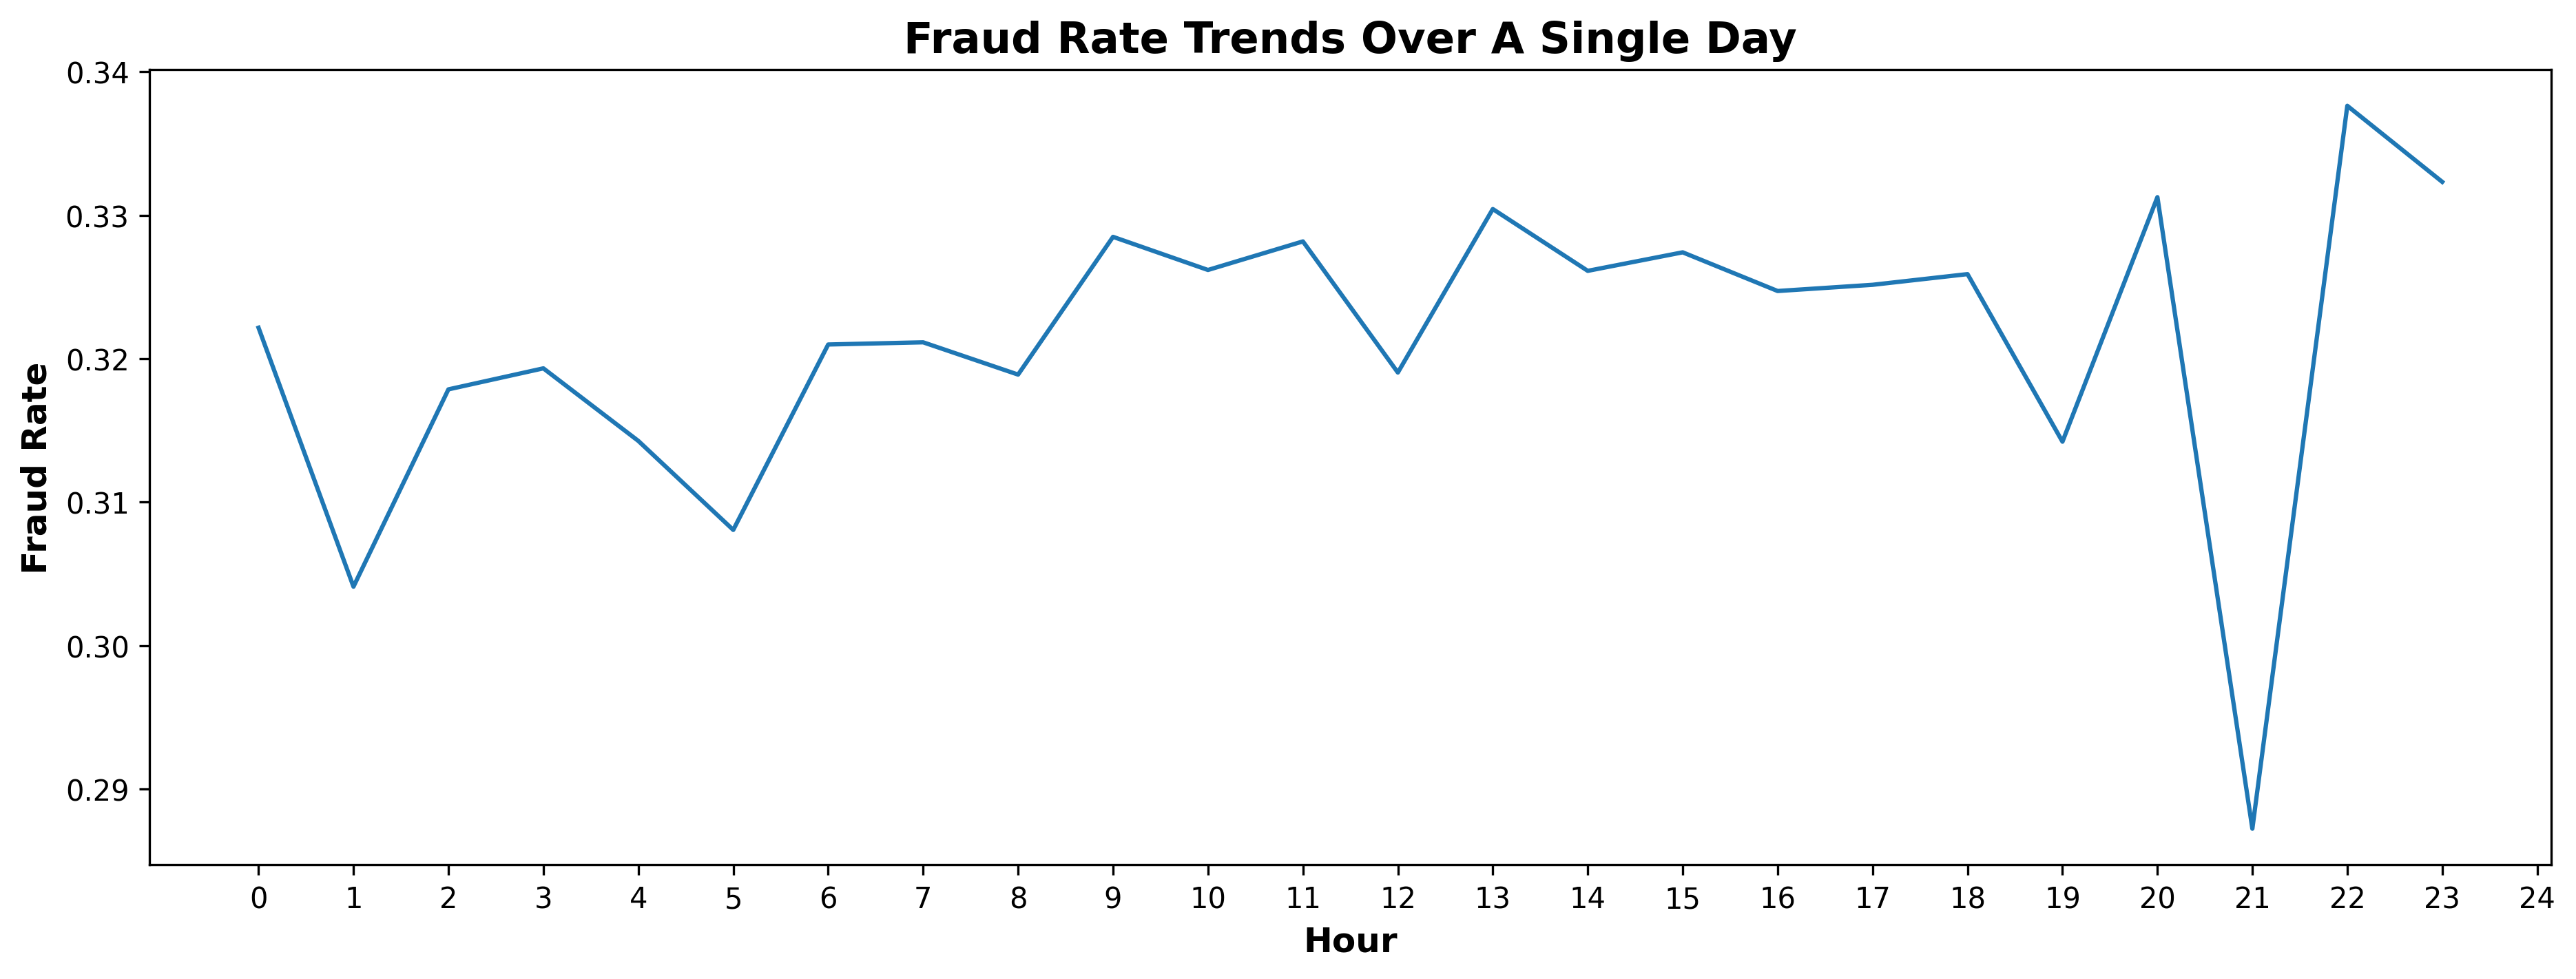

In [157]:
plt.figure(figsize = (15, 5), dpi = 300)

# Check how the fraud rate changes throughout the day
sns.lineplot(
    data = fraud_df_hour,
    x = "transaction_hour",
    y = "fraud_rate",
)

plt.title("Fraud Rate Trends Over A Single Day")
plt.xlabel("Hour")
plt.ylabel("Fraud Rate")

plt.xticks(range(0, 25))

In [158]:
# Filtering out the fradulent transactions and groupping them by hour of the day
fraud_df_min = df.groupby("transaction_min", as_index=False)["fraud_label"].agg(
    fraudulent_transaction_count = "sum",
    total_transaction_count = "count"
)

# Calculate the fraud rate
fraud_df_min["fraud_rate"] = fraud_df_min["fraudulent_transaction_count"] / fraud_df_min["total_transaction_count"]
fraud_df_min

transaction_min  fraudulent_transaction_count  total_transaction_count  \
0                 0                           258                      801   
1                 1                           283                      828   
2                 2                           261                      831   
3                 3                           262                      821   
4                 4                           277                      871   
5                 5                           285                      878   
6                 6                           263                      814   
7                 7                           271                      797   
8                 8                           279                      835   
9                 9                           287                      853   
10               10                           254                      788   
11               11                           264                      840   
12               12                           253                      823   
13               13                           283                      875   
14               14                           270                      803   
15               15                           256                      801   
16               16                           280                      868   
17               17                           268                      815   
18               18                           238                      811   
19               19                           274                      849   
20               20                           273                      822   
21               21                           276                      779   
22               22                           257                      814   
23               23                           260                      846   
24               24                           264                      820   
25               25                           294                      867   
26               26                           290                      853   
27               27                           255                      824   
28               28                           283                      840   
29               29                           270                      846   
30               30                           241                      792   
31               31                           262                      859   
32               32                           274                      846   
33               33                           254                      809   
34               34                           280                      872   
35               35                           278                      887   
36               36                           246                      851   
37               37                           280                      854   
38               38                           301                      858   
39               39                           274                      832   
40               40                           249                      774   
41               41                           279                      837   
42               42                           254                      813   
43               43                           271                      873   
44               44                           263                      808   
45               45                           288                      885   
46               46                           277                      828   
47               47                           241                      803   
48               48                           280                      860   
49               49                           253                      815   
50               50       

([<matplotlib.axis.XTick at 0x1891d5f3110>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22'),
  Text(24, 0, '24'),
  Text(26, 0, '26'),
  Text(28, 0, '28'),
  Text(30, 0, '30'),
  Text(32, 0, '32'),
  Text(34, 0, '34'),
  Text(36, 0, '36'),
  Text(38, 0, '38'),
  Text(40, 0, '40'),
  Text(42, 0, '42'),
  Text(44, 0, '44'),
  Text(46, 0, '46'),
  Text(48, 0, '48'),
  Text(50, 0, '50'),
  Text(52, 0, '52'),
  Text(54, 0, '54'),
  Text(56, 0, '56'),
  Text(58, 0, '58'),
  Text(60, 0, '60')])

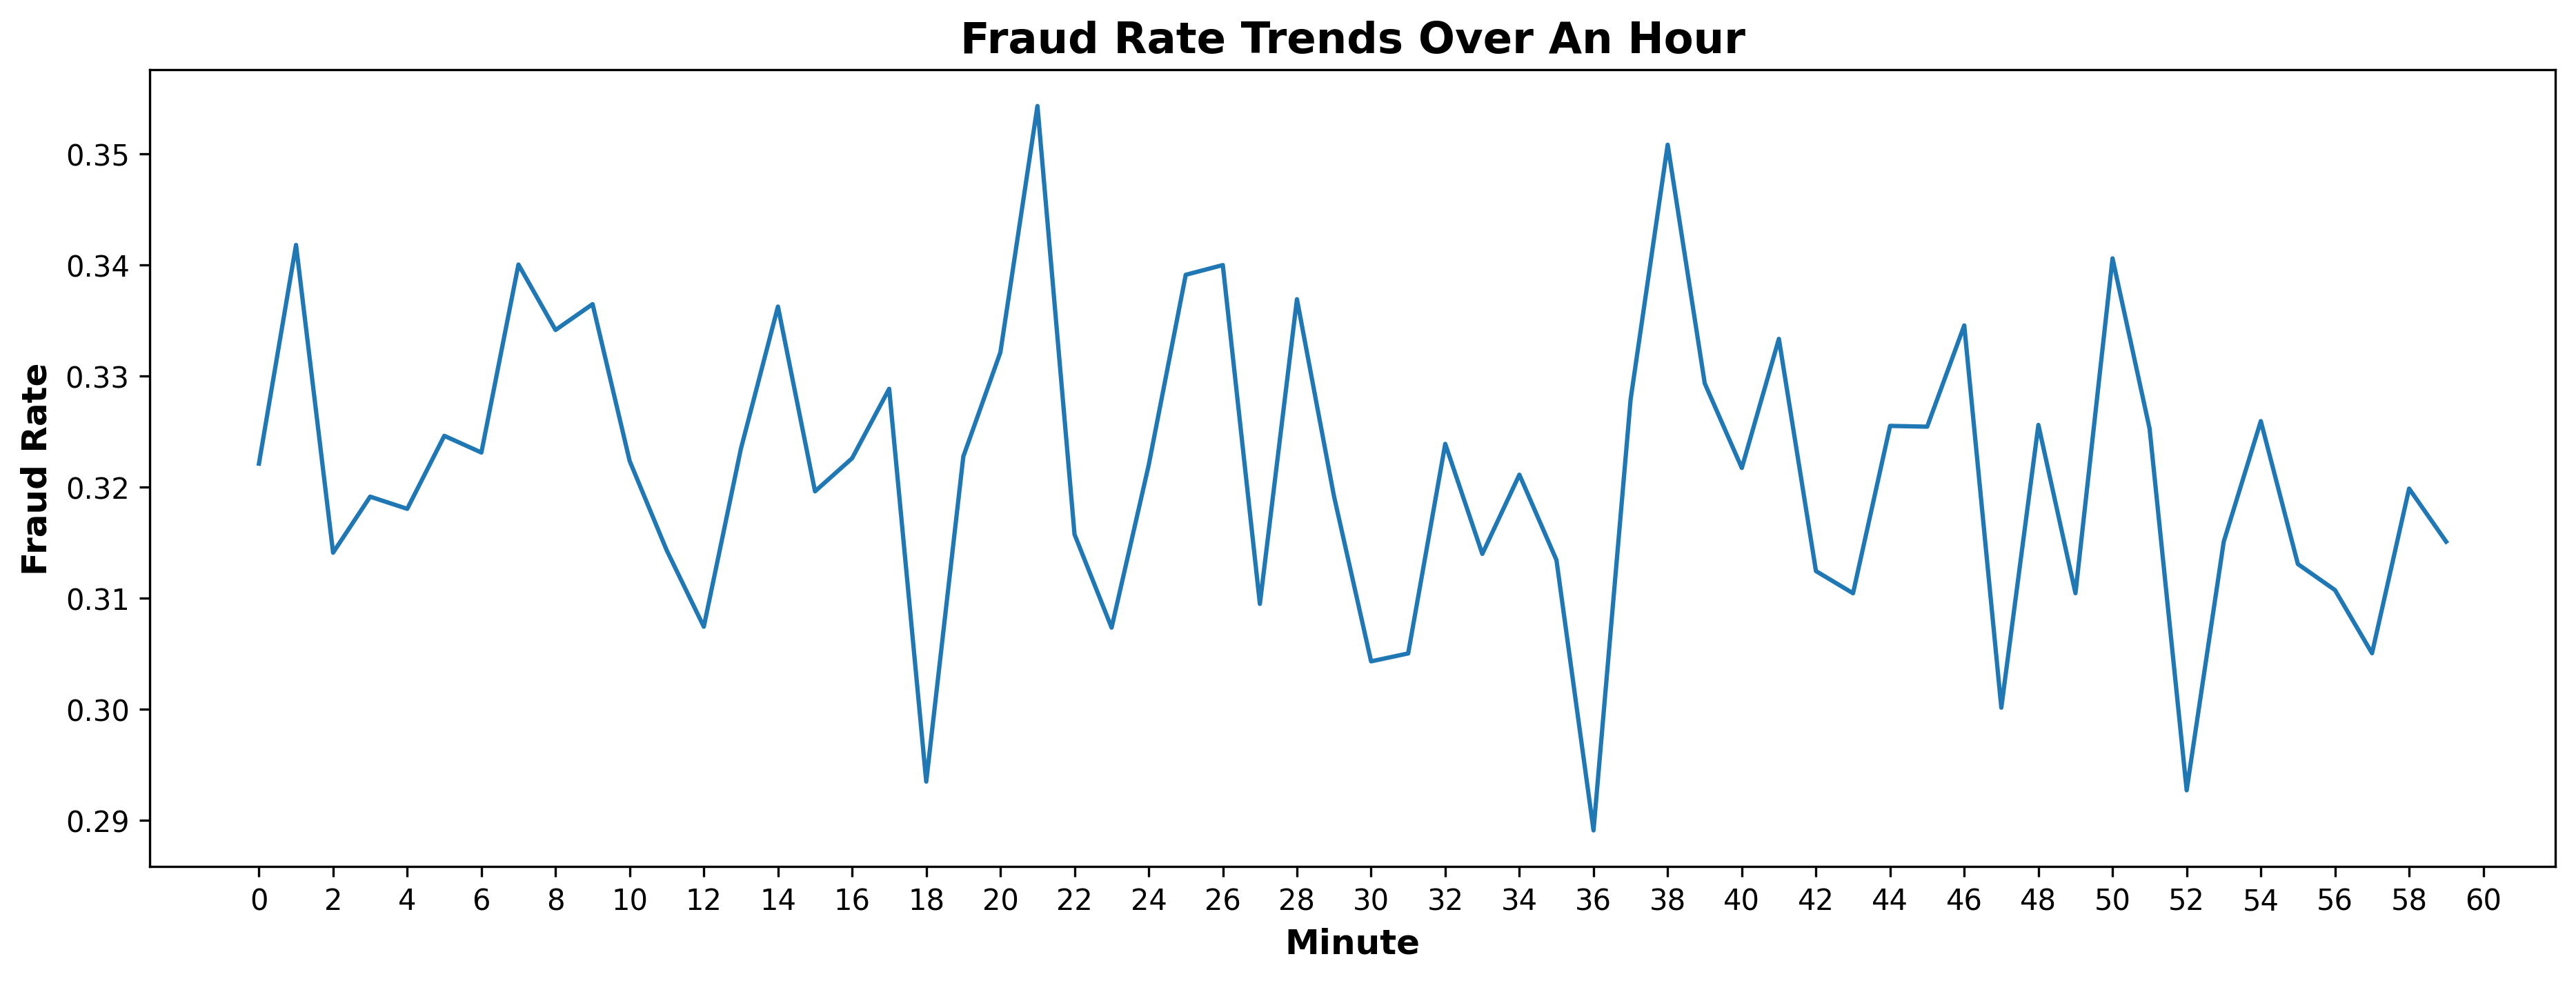

In [159]:
plt.figure(figsize = (15, 5), dpi = 300)

# Check how the fraud rate changes throughout an hour
sns.lineplot(
    data = fraud_df_min,
    x = "transaction_min",
    y = "fraud_rate",
)

plt.title("Fraud Rate Trends Over An Hour")
plt.xlabel("Minute")
plt.ylabel("Fraud Rate")

plt.xticks(range(0, 61, 2))

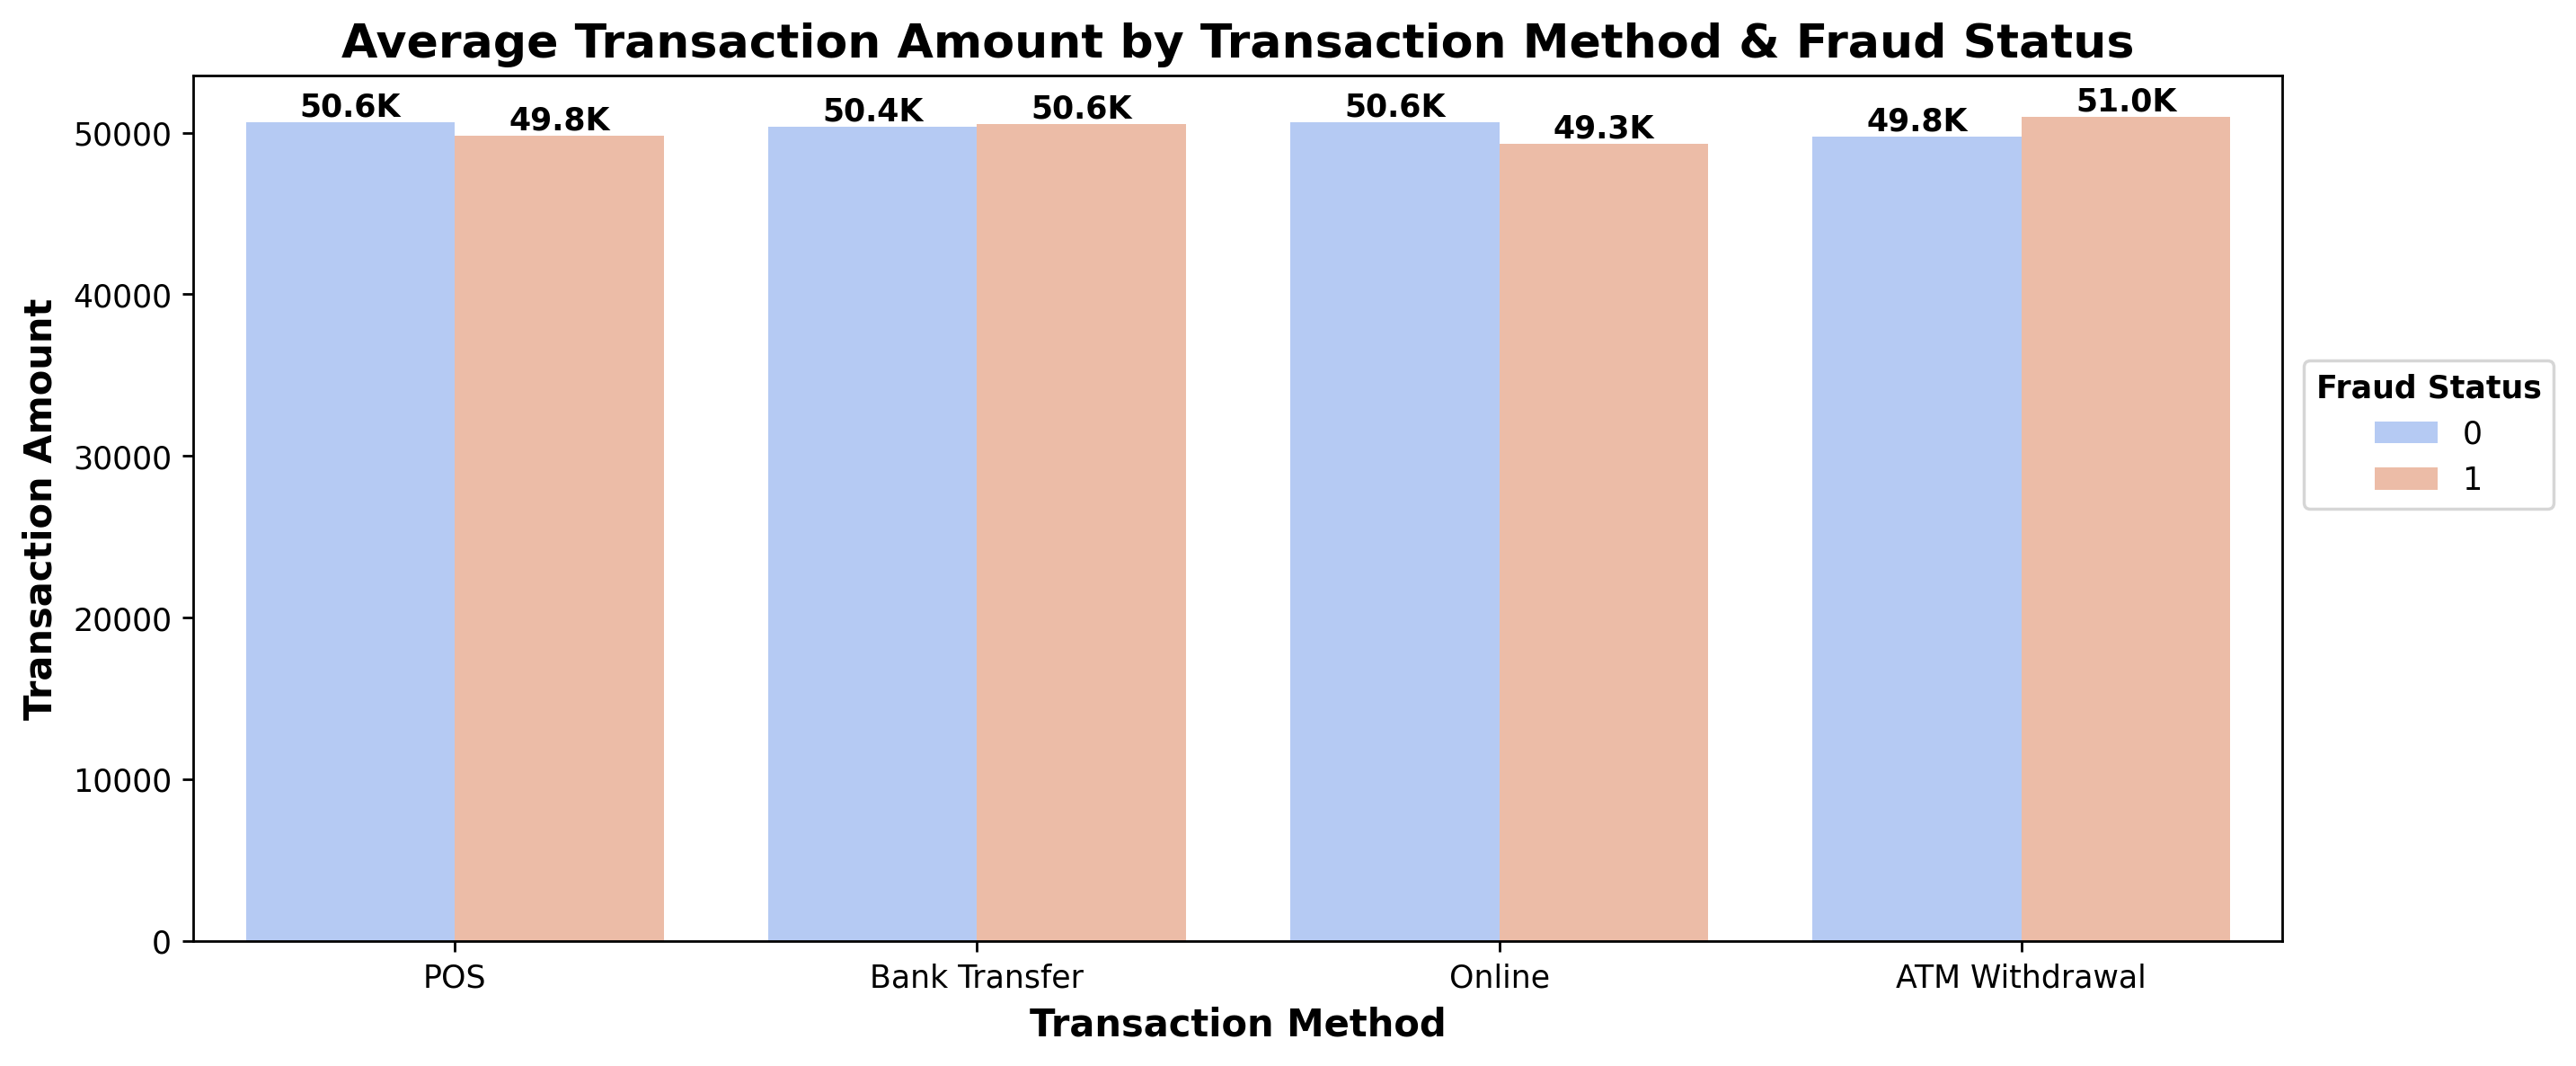

In [160]:
# Check the average account balance for each transaction method separated by fraud status
ax = sns.barplot(
    data = df,
    x = "transaction_method",
    y = "account_balance",
    hue = "fraud_label",
    palette = "coolwarm",
    errorbar = None
)

annotate_bars(ax)

plt.title("Average Transaction Amount by Transaction Method & Fraud Status")
plt.xlabel("Transaction Method")
plt.ylabel("Transaction Amount")

plt.legend(title = "Fraud Status", title_fontproperties = {'weight':'bold'}, loc = (1.01, 0.5))

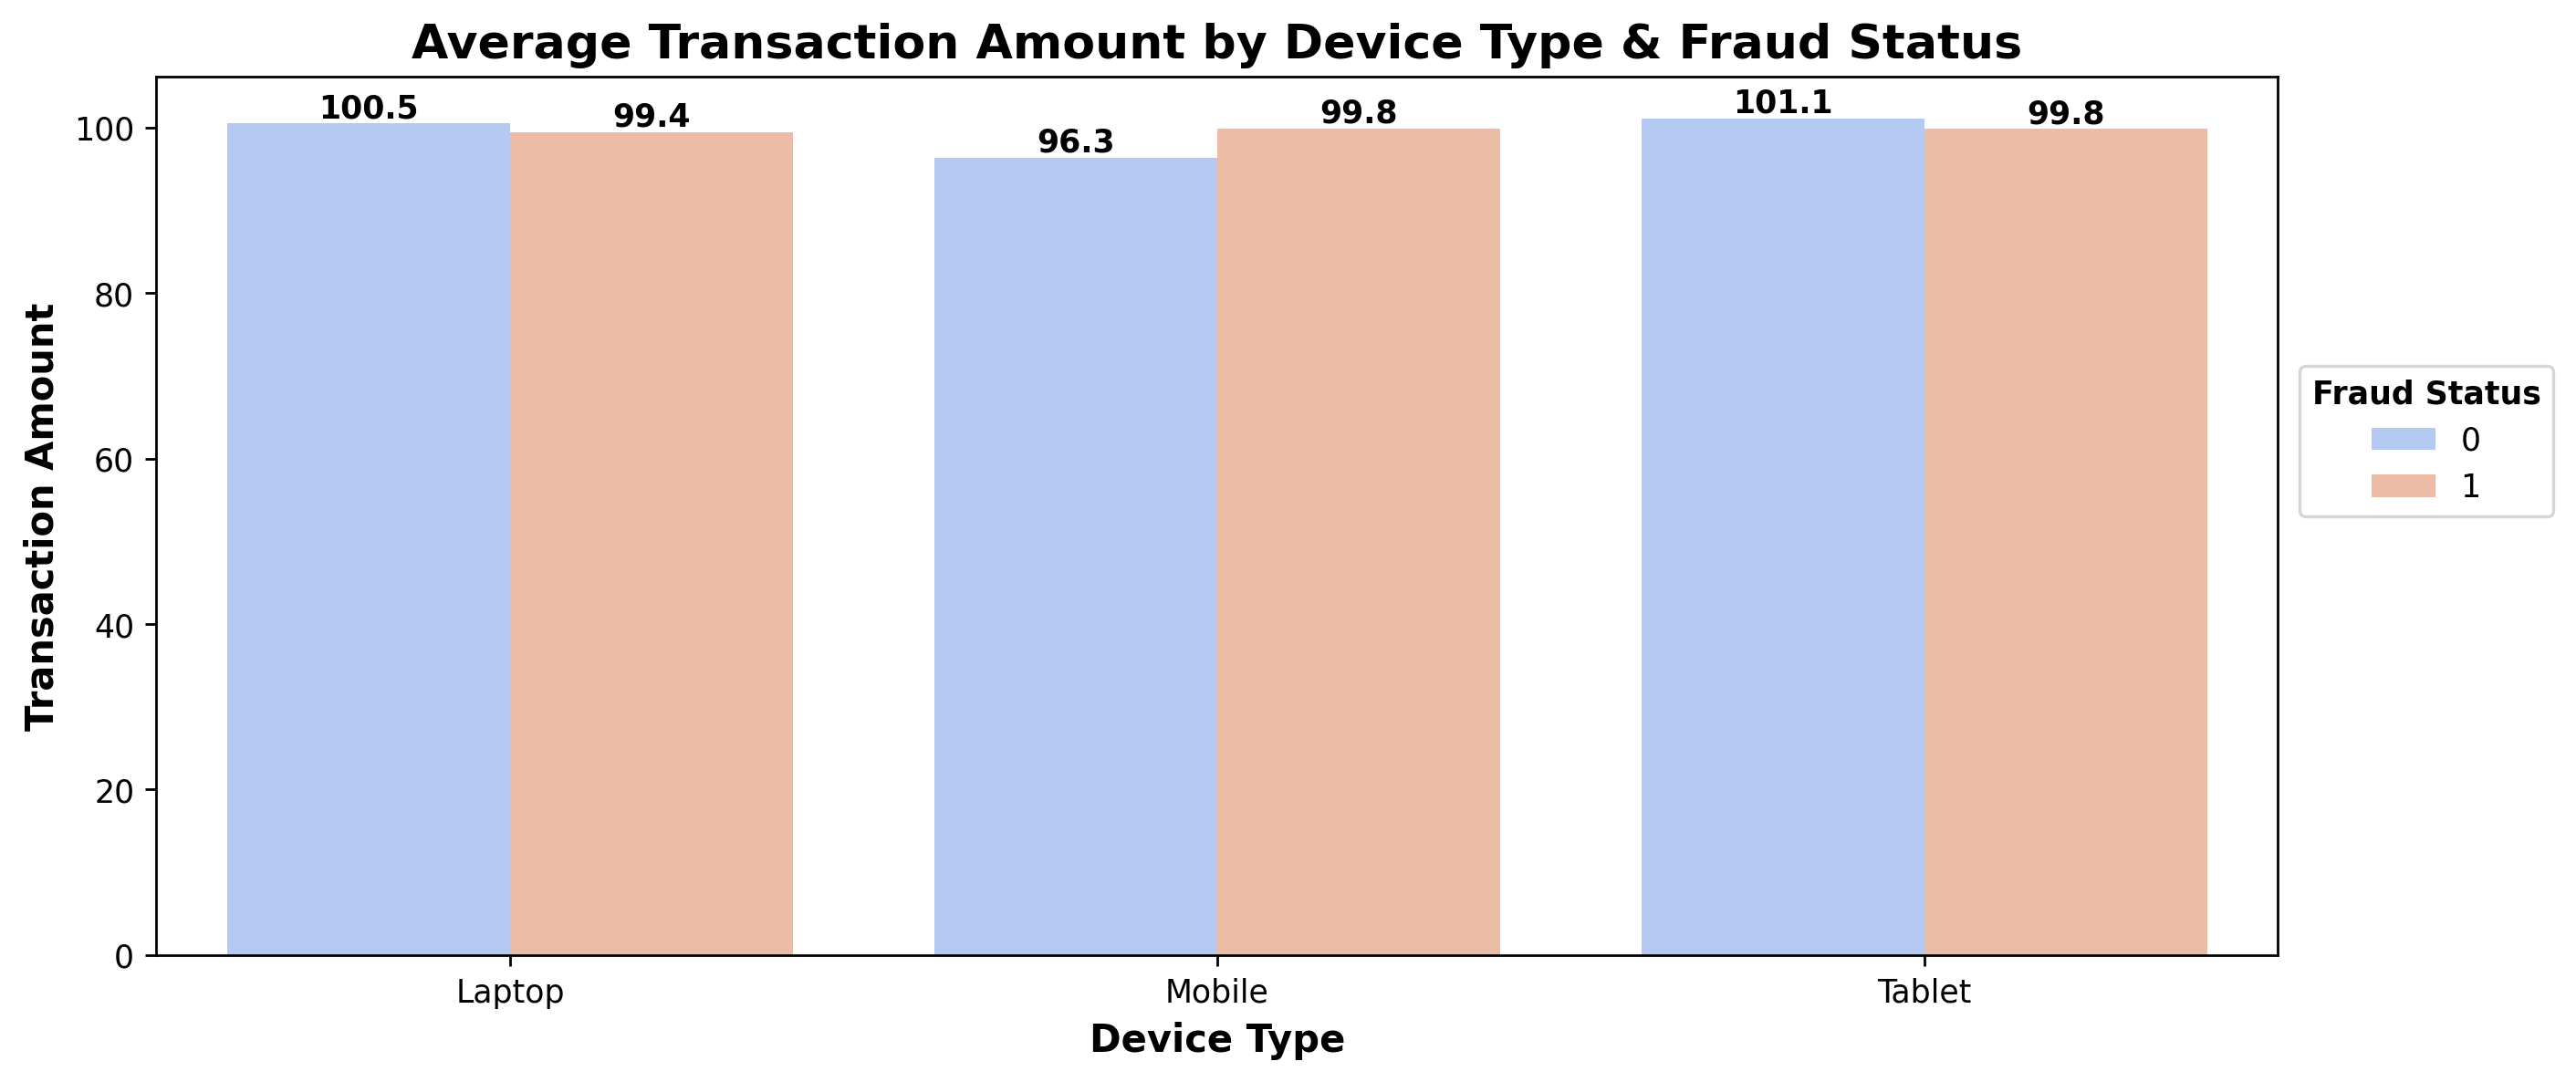

In [161]:
# Check the average transaction amount for each device type separated by fraud status
ax = sns.barplot(
    data = df,
    x = "device_type",
    y = "transaction_amount",
    hue = "fraud_label",
    palette = "coolwarm",
    errorbar = None
)

annotate_bars(ax)

plt.title("Average Transaction Amount by Device Type & Fraud Status")
plt.xlabel("Device Type")
plt.ylabel("Transaction Amount")

plt.legend(title = "Fraud Status", title_fontproperties = {'weight':'bold'}, loc = (1.01, 0.5))

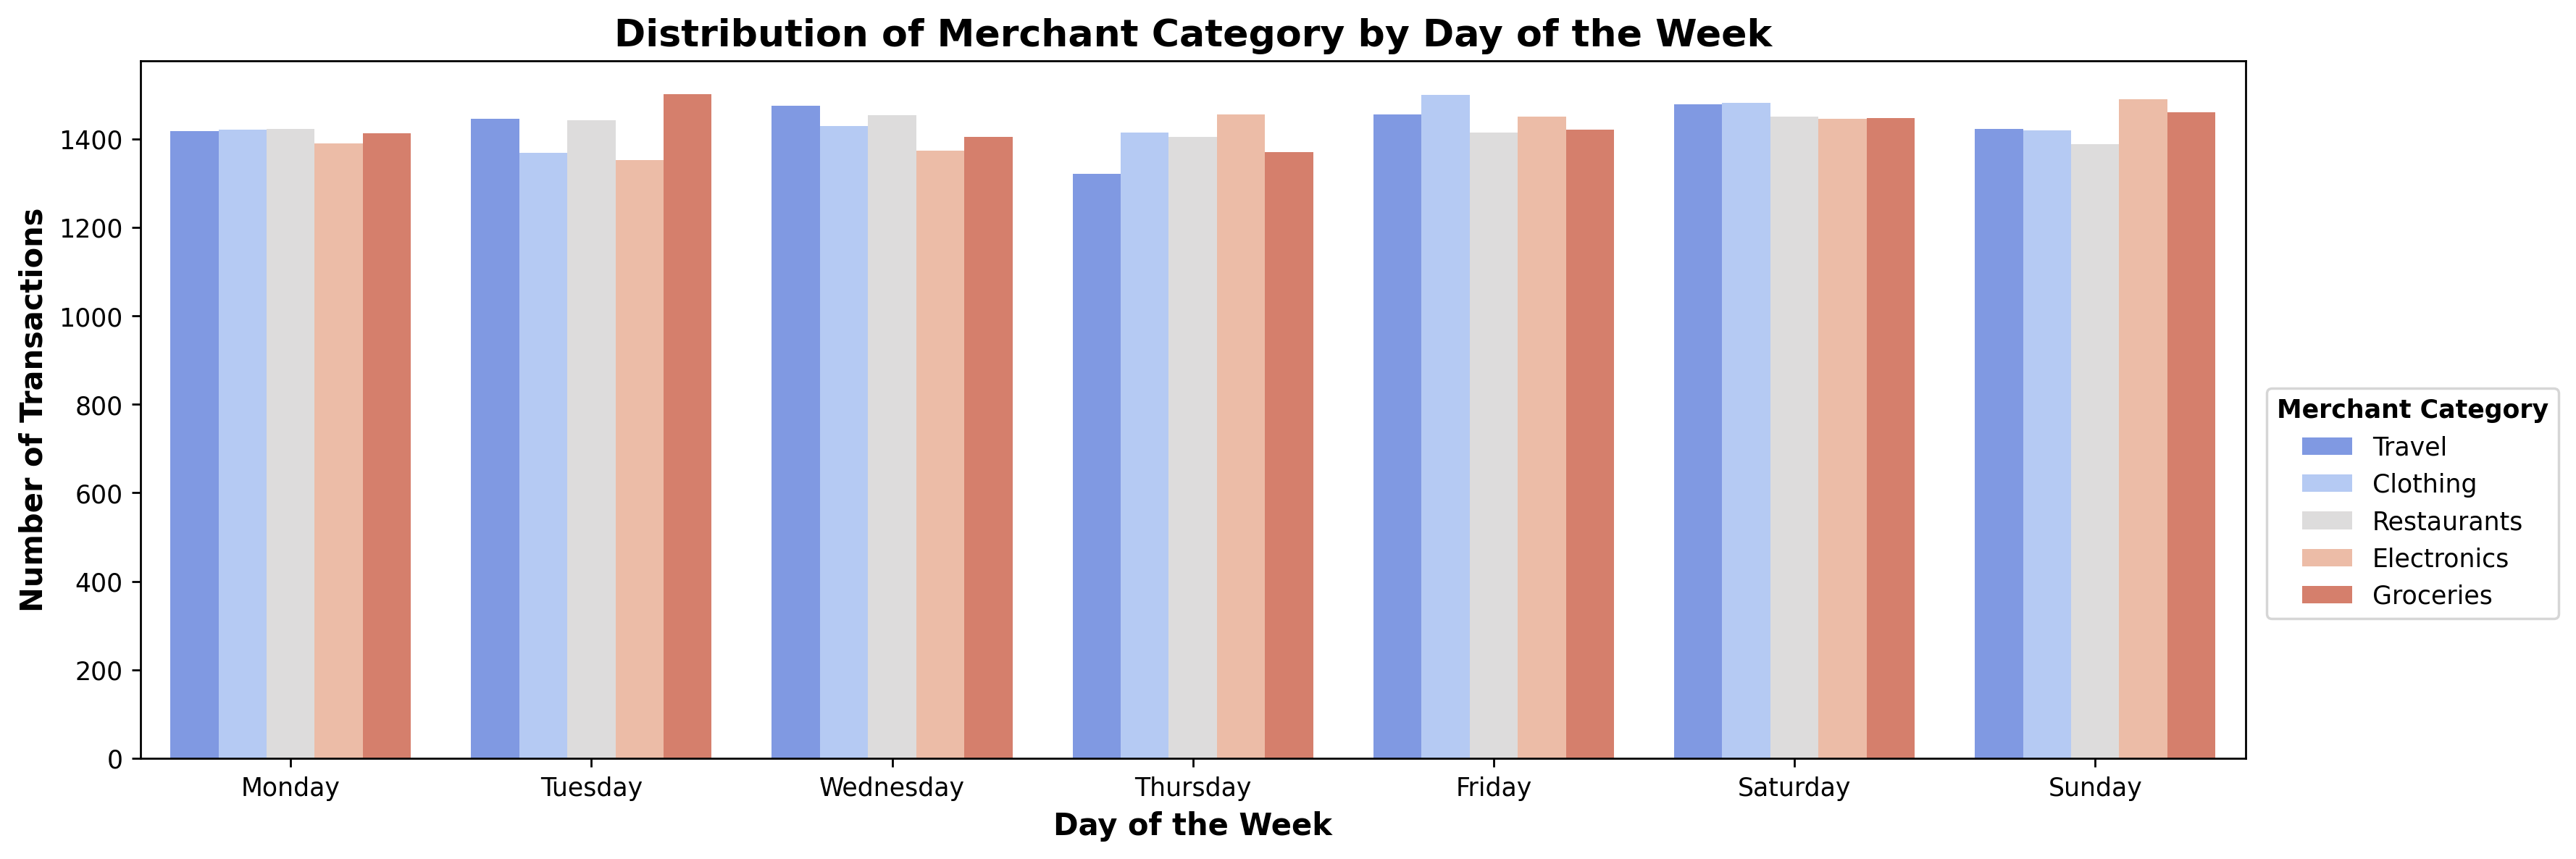

In [162]:
plt.figure(figsize = (15, 5))

# Check how does the merchant category vary across different days of the week
ax = sns.countplot(
    data = df,
    x = "day_of_week",
    hue = "merchant_category",
    palette = "coolwarm",
    order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

plt.title("Distribution of Merchant Category by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Transactions")

plt.legend(title = "Merchant Category", title_fontproperties = {'weight':'bold'}, loc = (1.01, 0.2))

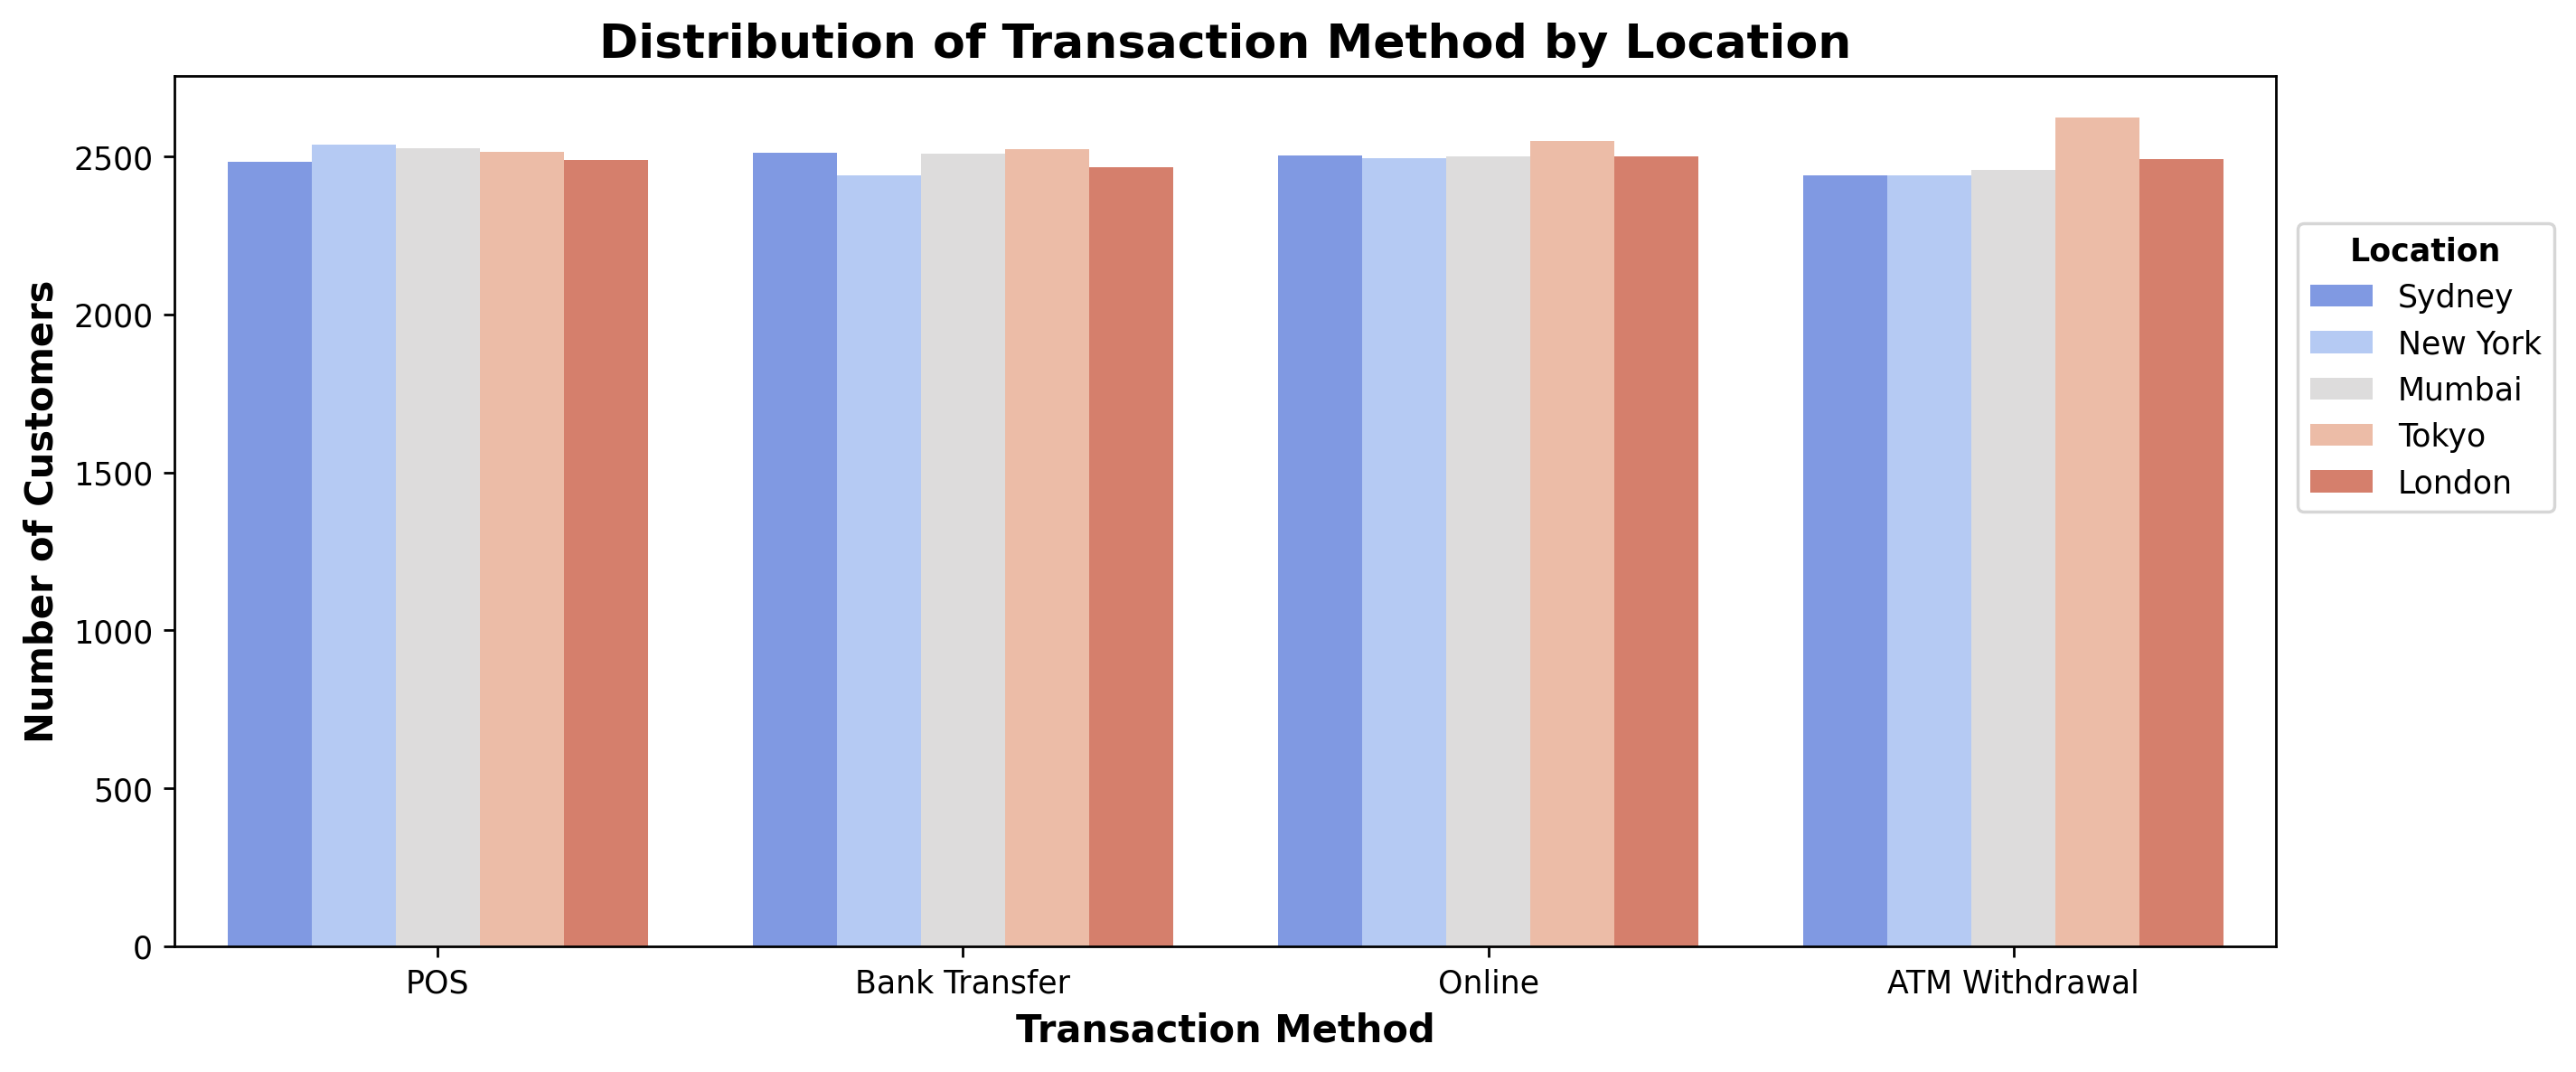

In [163]:
# Check which transaction method is used most frequently across different locations
ax = sns.countplot(
    data = df,
    x = "transaction_method",
    hue = "transaction_location",
    palette = "coolwarm"
)

plt.title("Distribution of Transaction Method by Location")
plt.xlabel("Transaction Method")
plt.ylabel("Number of Customers")

plt.legend(title = "Location", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5))

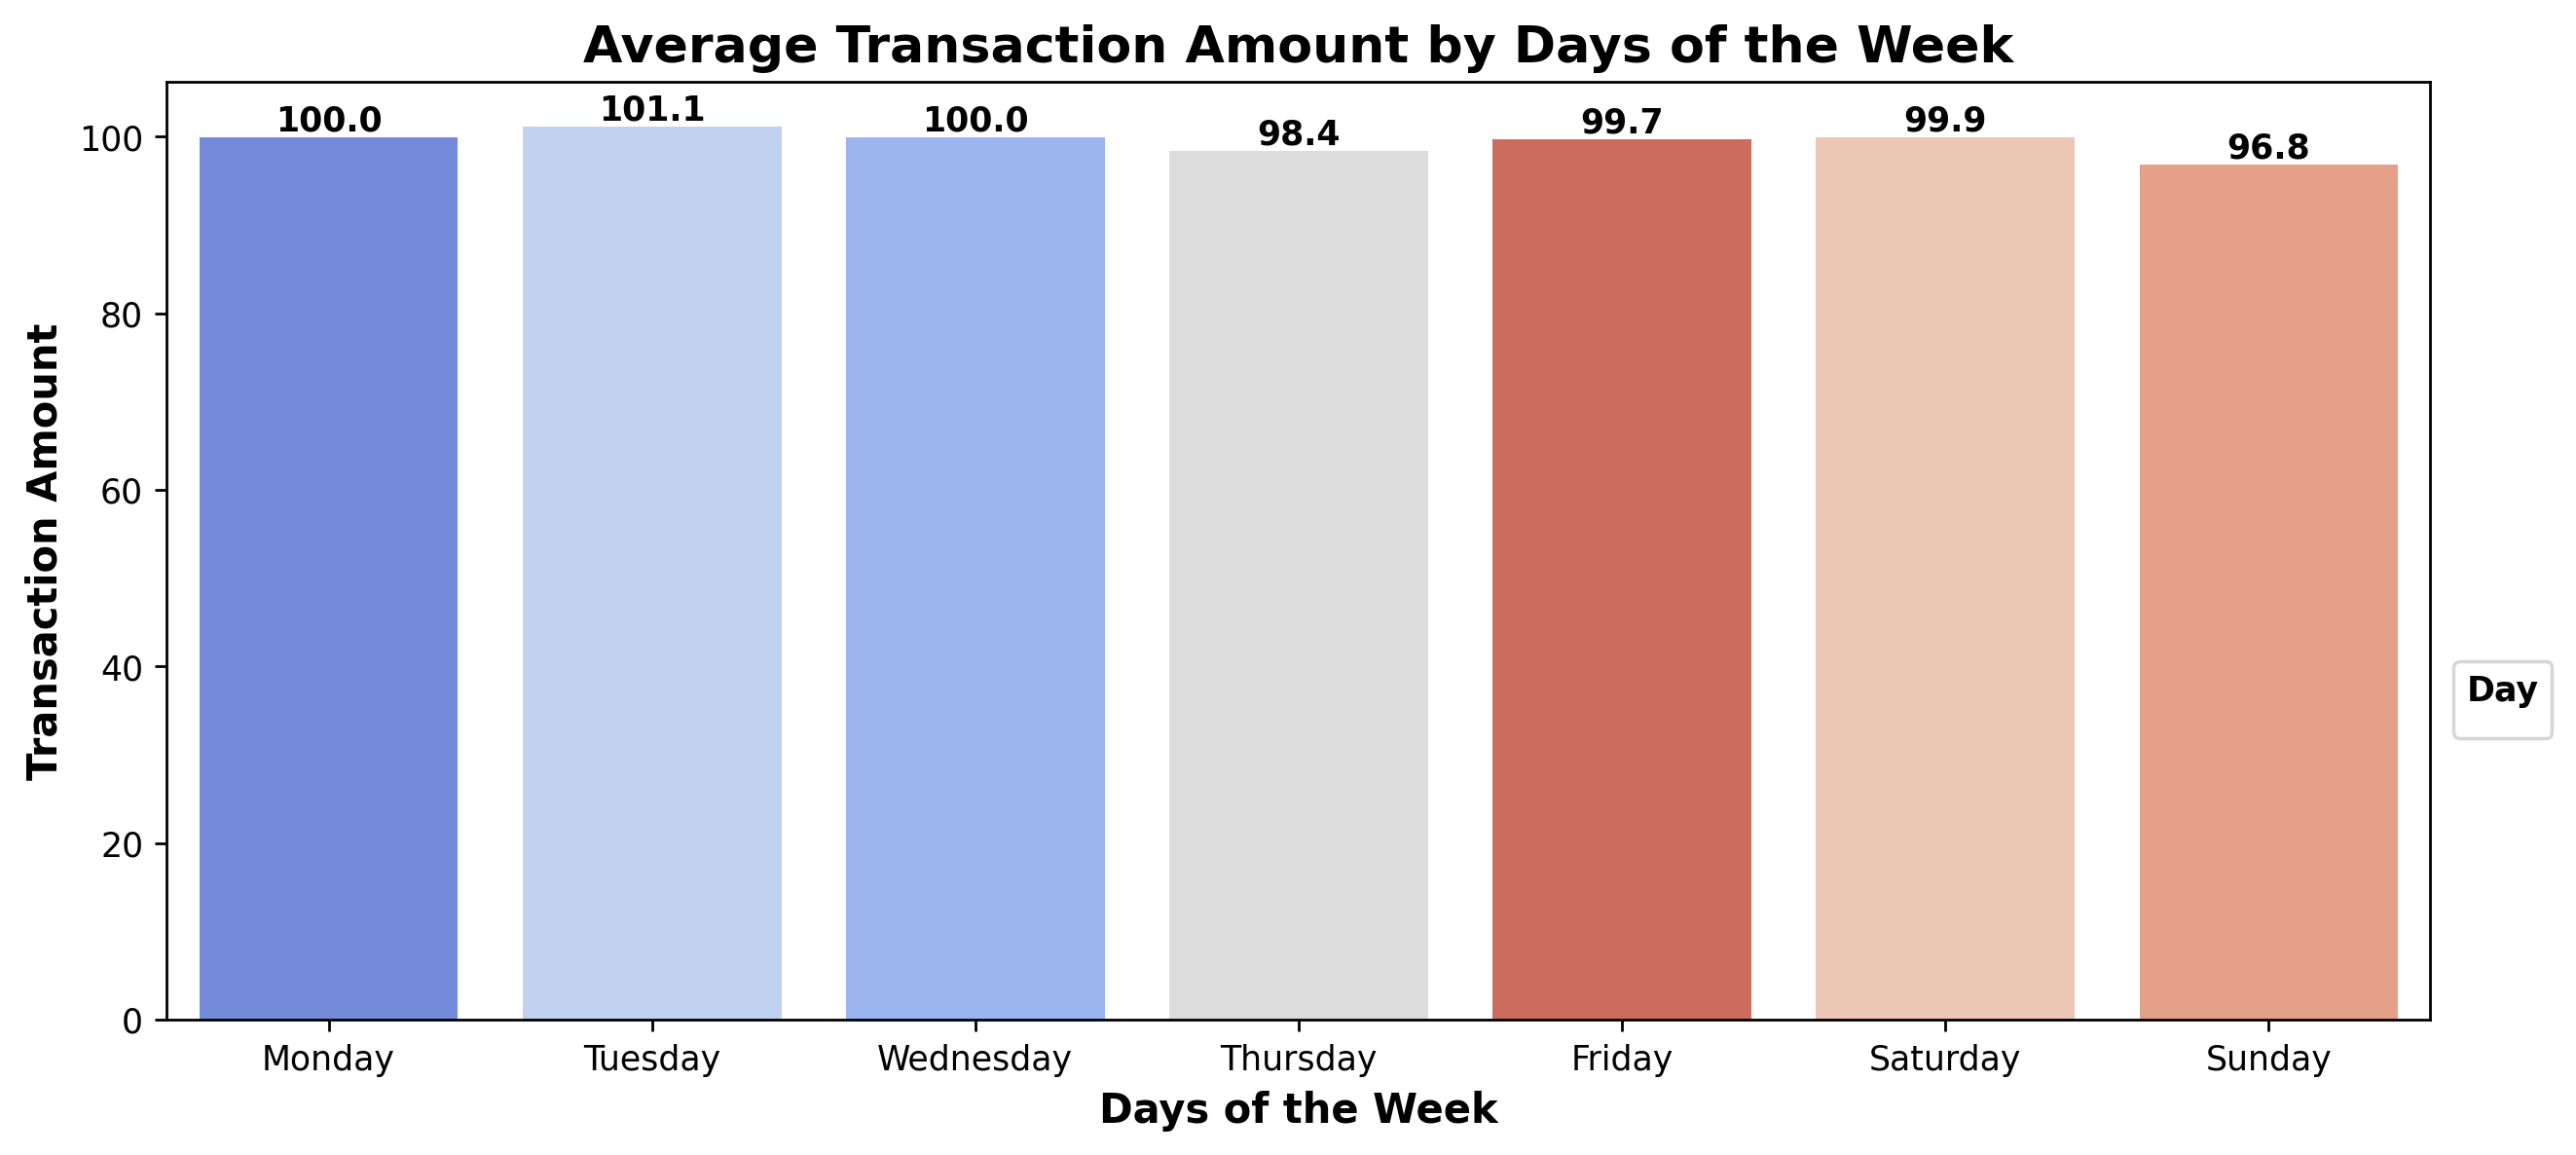

In [164]:
# Check how does average transaction amount varies across different days of the week
ax = sns.barplot(
    data = df,
    x = "day_of_week",
    y = "transaction_amount",
    hue = "day_of_week",
    palette = "coolwarm",
    order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    dodge = False,
    errorbar = None
)

annotate_bars(ax)

plt.title("Average Transaction Amount by Days of the Week")
plt.xlabel("Days of the Week")
plt.ylabel("Transaction Amount")

plt.legend(title = "Day", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.3))

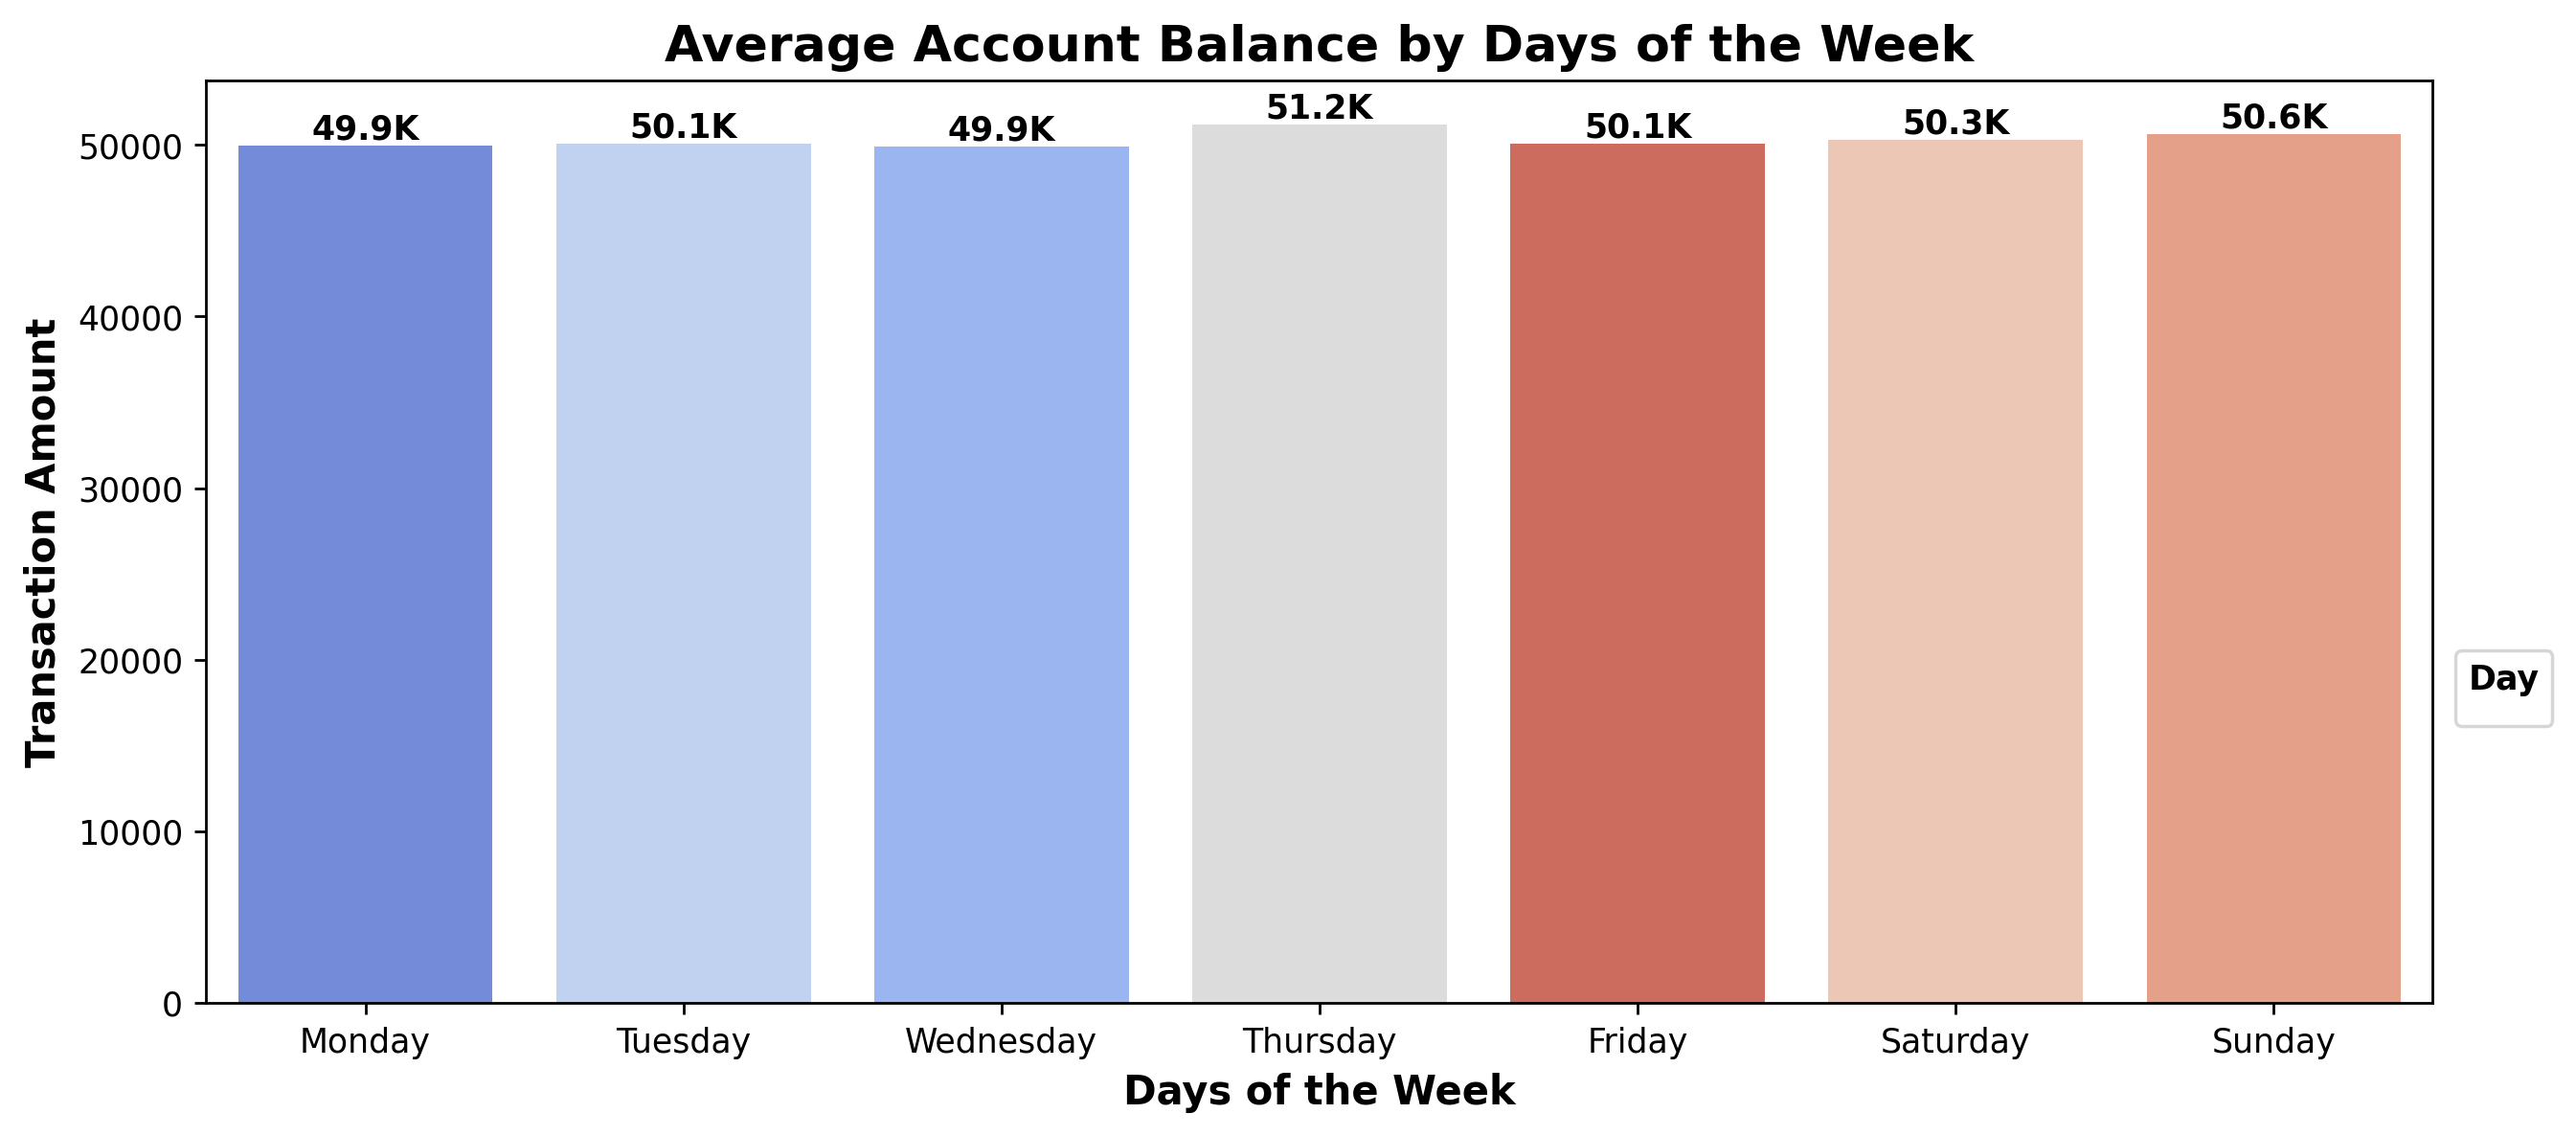

In [165]:
# Check how does average account balance varies across different days of the week
ax = sns.barplot(
    data = df,
    x = "day_of_week",
    y = "account_balance",
    hue = "day_of_week",
    palette = "coolwarm",
    order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    dodge = False,
    errorbar = None
)

annotate_bars(ax)

plt.title("Average Account Balance by Days of the Week")
plt.xlabel("Days of the Week")
plt.ylabel("Transaction Amount")

plt.legend(title = "Day", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.3))

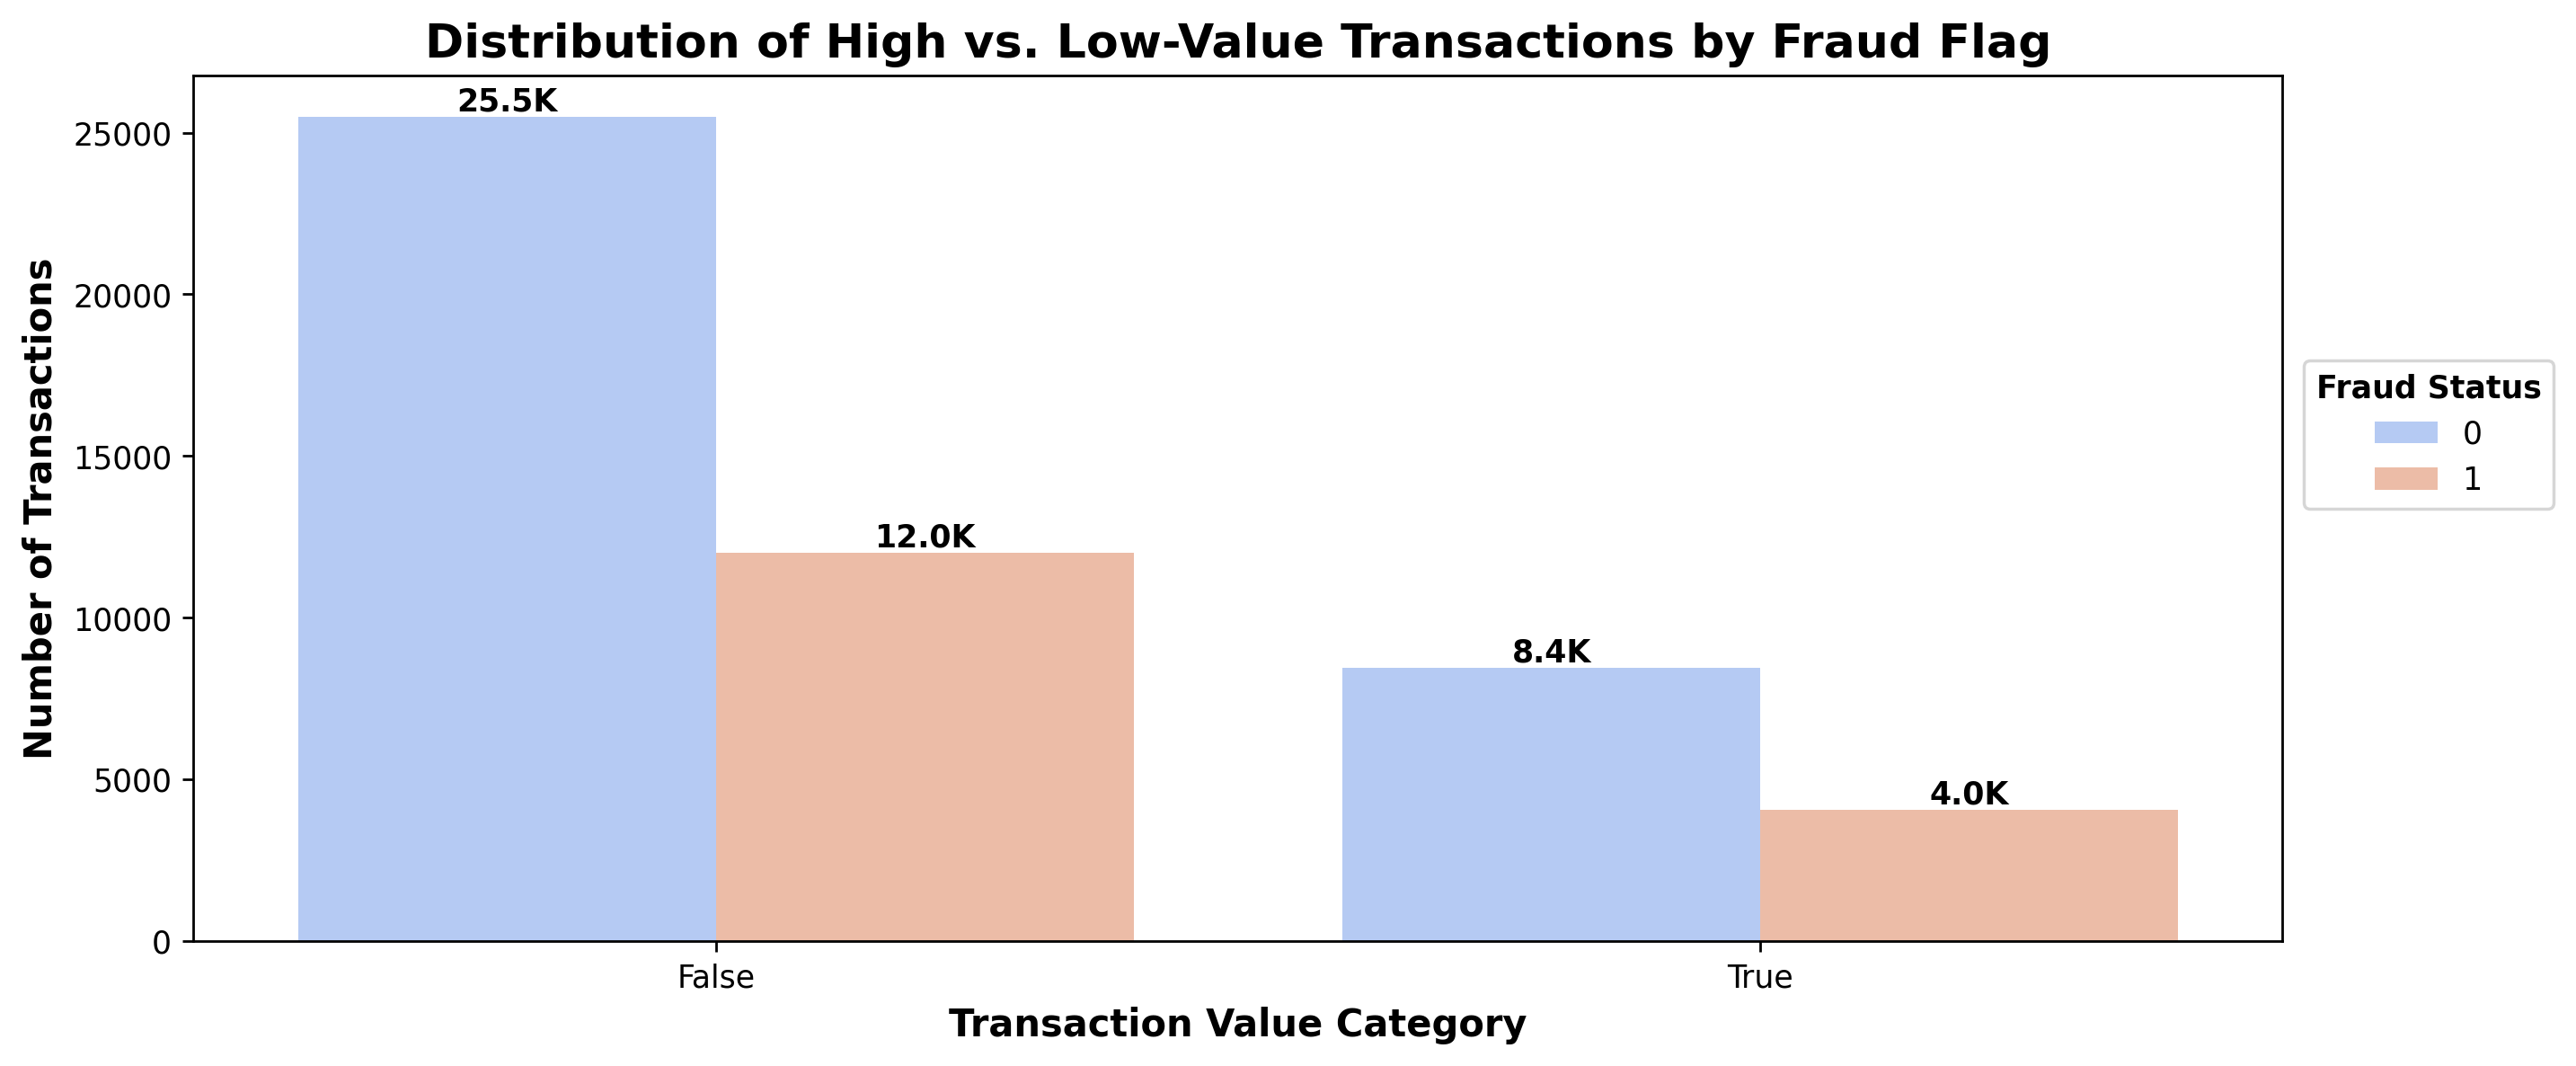

In [166]:
# Check the number of high value vs low value transactions by fraud flag
ax = sns.countplot(
    data = df,
    x = "is_high_value_transaction",
    hue = "fraud_label",
    palette = "coolwarm"
)

annotate_bars(ax)

plt.title("Distribution of High vs. Low-Value Transactions by Fraud Flag")
plt.xlabel("Transaction Value Category")
plt.ylabel("Number of Transactions")

plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5))

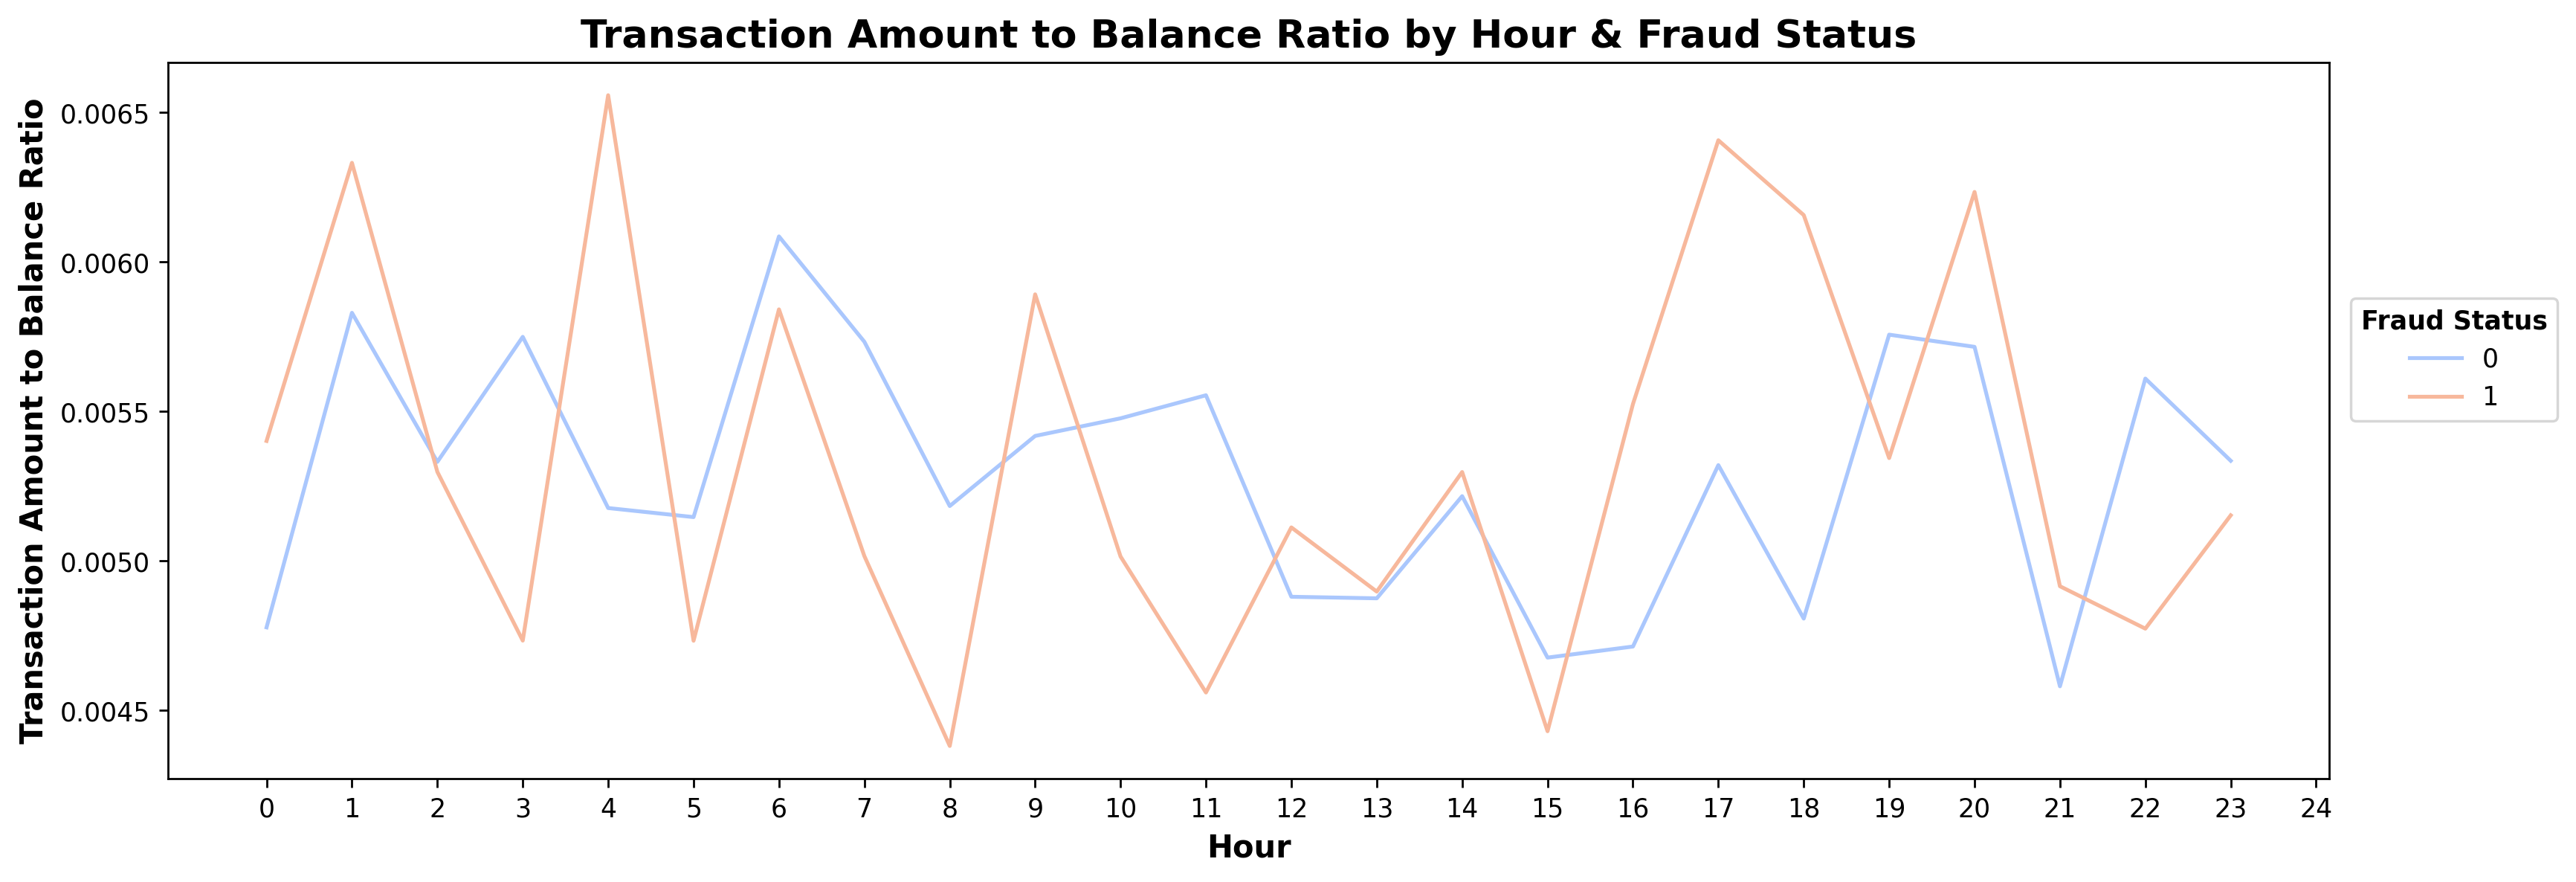

In [167]:
plt.figure(figsize = (15, 5))

# Check how the transaction amount to balance ratio varies across different hours of the day by fraud status
sns.lineplot(
    data = df,
    x = "transaction_hour",
    y = "transaction_amount_to_balance_ratio",
    hue = "fraud_label",
    palette = "coolwarm",
    errorbar = None
)

plt.title("Transaction Amount to Balance Ratio by Hour & Fraud Status")
plt.xlabel("Hour")
plt.ylabel("Transaction Amount to Balance Ratio")

plt.xticks(range(0, 25))

plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5))

Now, what we want to do is to see the correlation of each column with fraud status. What better way to do this by using a heatmap.

<Axes: >

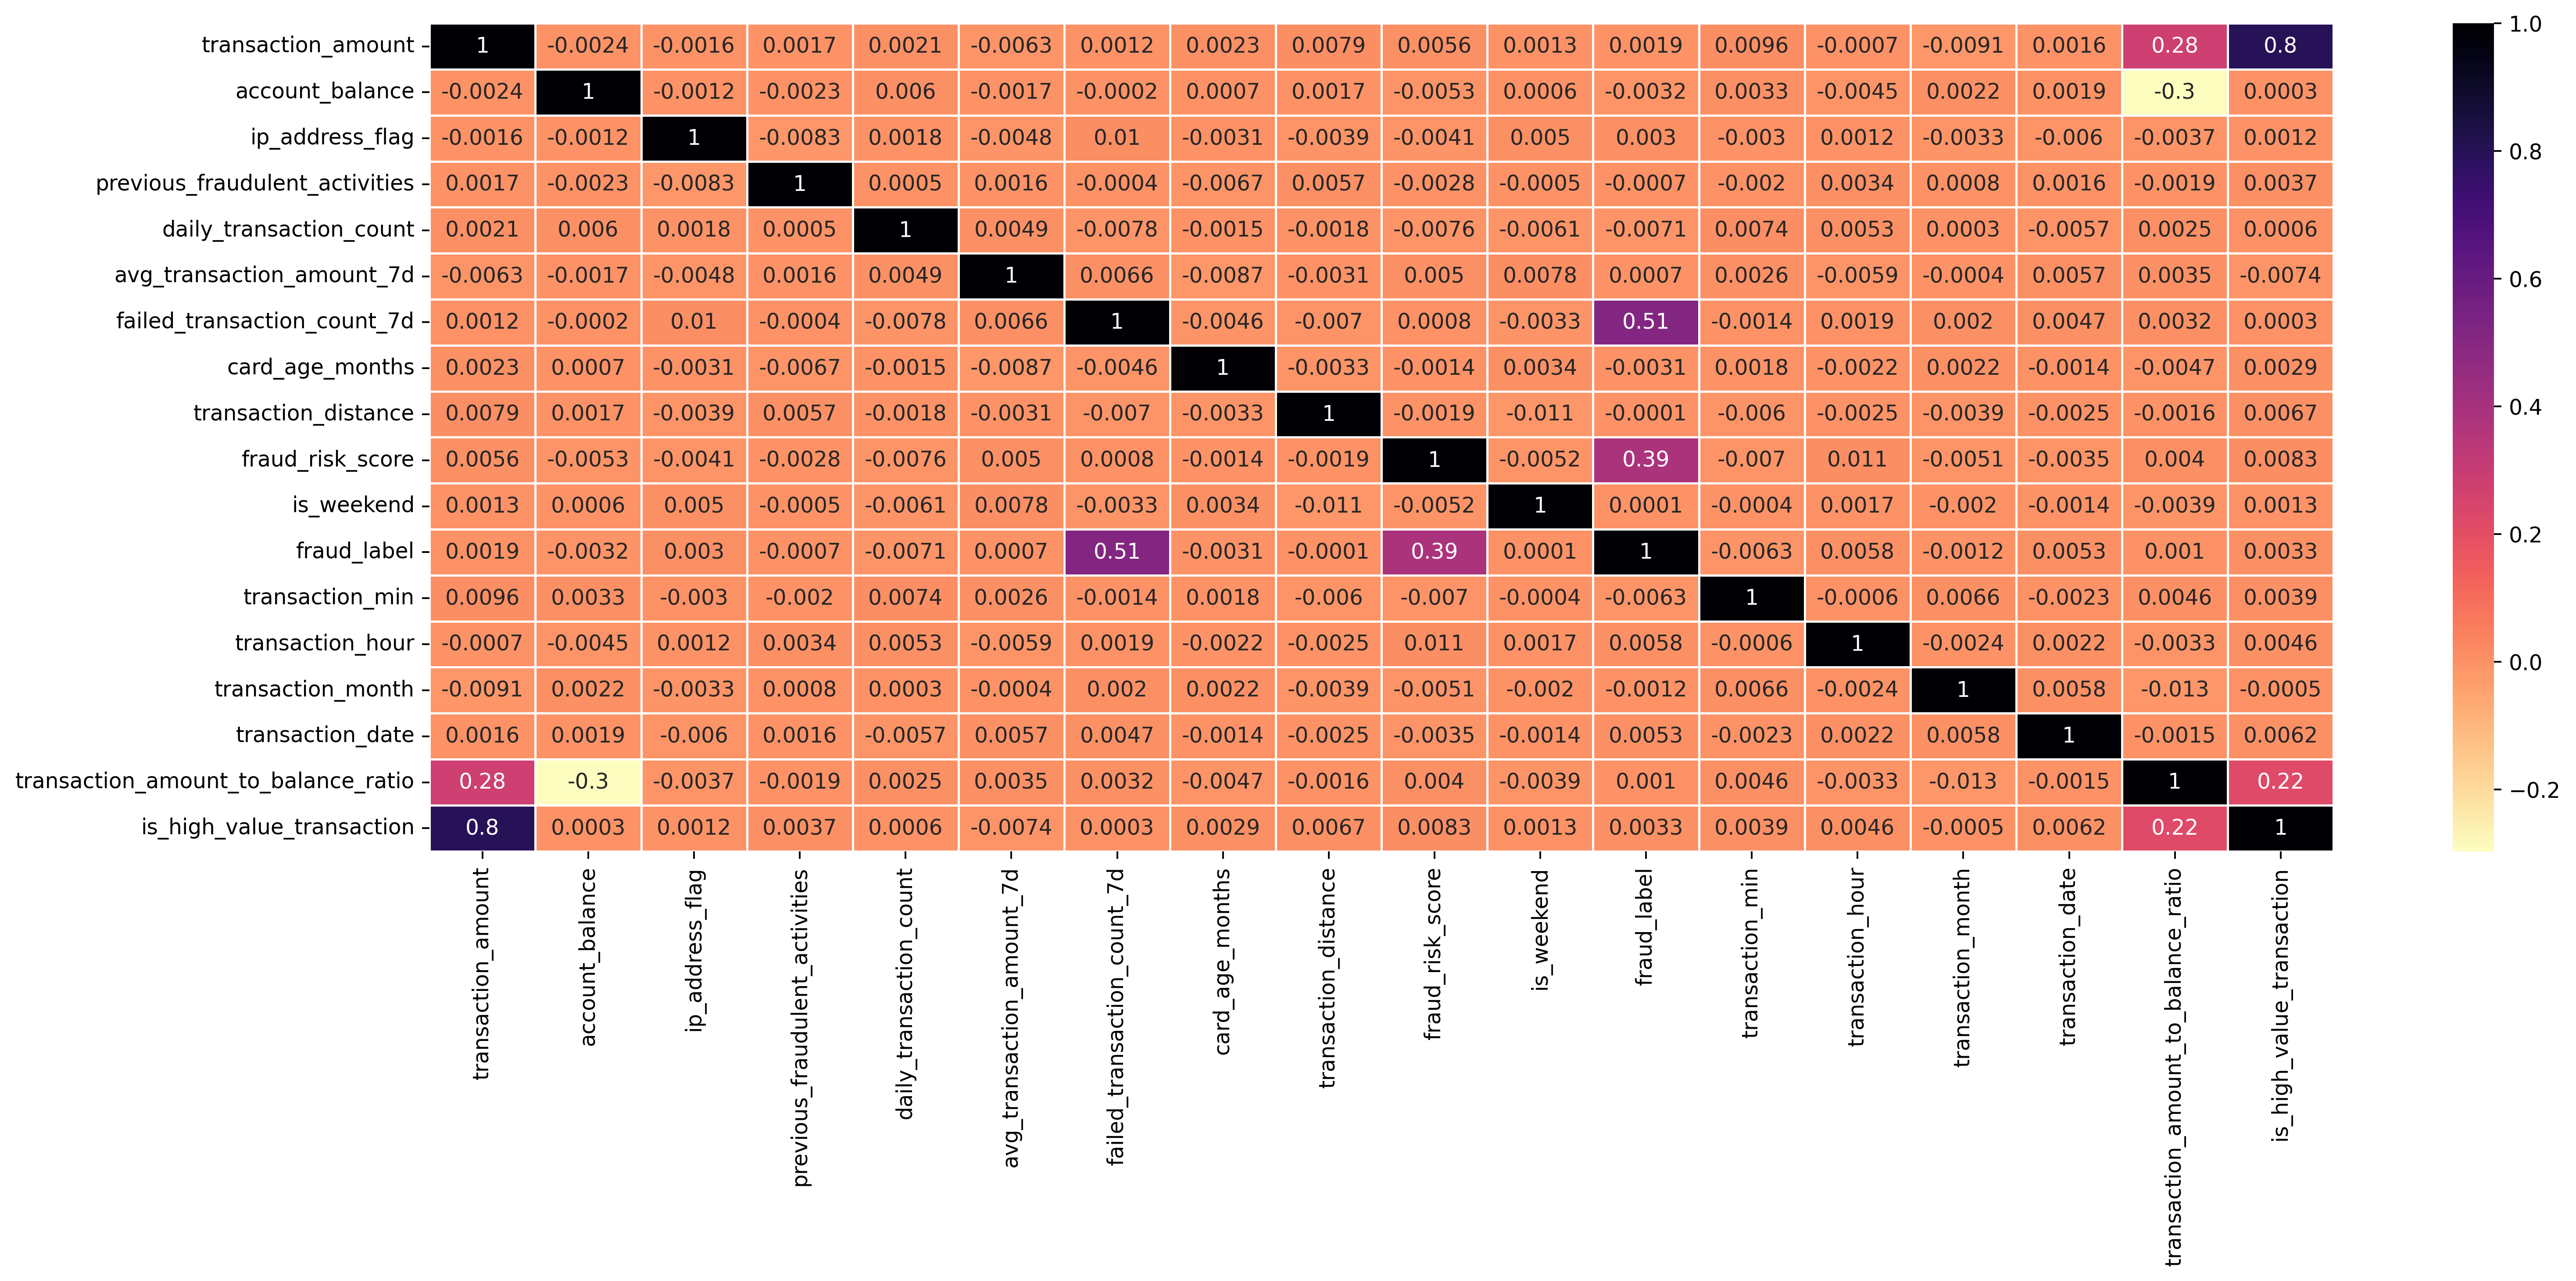

In [168]:
plt.figure(figsize = (20, 7), dpi = 350)

# Checking the correlation of each column with the fraud status
sns.heatmap(np.round(df.corr(numeric_only=True), 4), annot=True, linecolor='white', linewidths=1, cmap="magma_r")